In [1]:
import numpy as np
import os
from oe_acute import trial_utils as tu
from oe_acute import MNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
import tqdm
import glob

import sys
from oe_acute import pyMNE

In [2]:
os.nice(1)

2

### Load dsets

In [3]:
stim_spec = np.load('/mnt/cube/srrudrar/temporal_model/stim_resp_320/enc_train_320.npy')
stim_resp = np.load('/mnt/cube/srrudrar/temporal_model/stim_resp_320/resp_train_320.npy')

In [4]:
np.shape(stim_spec), np.shape(stim_resp)

((48855, 320), (48855, 214, 16))

In [5]:
def prepare_MNE_dset(stim_spec, stim_resp, nsegbins=16, concat=True):
    '''
    Create the dataset for fitting MNE model
    '''
    stim_mne = []
    resp_mne = []
    for s, r in zip(stim_spec, stim_resp):
        #nfreq, ntime = s.shape
        #s_segs = np.stack([s[:, n:(n+nsegbins)] for n in range(ntime - nsegbins)], axis=0)
        s_segs = s
        r_segs = np.sum(r, axis=1)
        stim_mne.append(s_segs)
        resp_mne.append(r_segs)
    if concat:
        return np.vstack(stim_mne), np.vstack(resp_mne)
    else:
        return stim_mne, resp_mne

In [6]:
nsegbins = 16

In [7]:
stim_mne = []
resp_mne = []
stim_mne, resp_mne = prepare_MNE_dset(stim_spec, stim_resp, nsegbins=nsegbins)

In [8]:
np.shape(stim_mne), np.shape(resp_mne)

((48855, 320), (48855, 214))

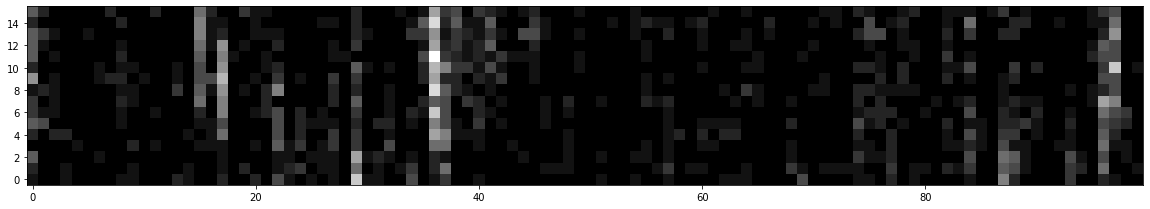

In [9]:
ax = plt.subplots(figsize=(20,8))
plt.imshow(np.transpose(stim_resp[:100, 100, :]), origin='lower', cmap='gray')

### Split into train test sets

In [10]:
len_units = np.shape(resp_mne)[1]

In [11]:
units_to_process = list(np.load('/mnt/cube/srrudrar/temporal_model/units_to_process.npy'))

In [12]:
exp_path = '/mnt/cube/srrudrar/temporal_model/stim_resp_320/'

In [13]:
# obtain all preprocessed datas

%matplotlib inline
sdim = 320
n_jackknives = 4

test_output_path = os.path.join(exp_path, 'MNE_test_dset')
os.makedirs(test_output_path, exist_ok=True)
n_eigvec_to_display = 6 # Number of most positive and most negative eigenvectors to display

pfinals = {}
for unit in units_to_process:
    i = units_to_process.index(unit)
    stims_train, resps_train, stims_test, resps_test = MNE.prepare_MNE_train_test_set(stim_mne, resp_mne[:,i][:,np.newaxis], train_pct=0.8, zscore=True, kz_norm_resp=True)
    
    # Save test dataset
    test_dict = {'stims_test':stims_test, 'resps_test':resps_test}
    out_fname = 'unit-{}_MNE.pkl'.format(unit)
    out_f = os.path.join(test_output_path, out_fname)
    with open(out_f, 'wb') as f:
        pickle.dump(test_dict, f)

    # Run MNE
    pfinal = MNE.fit_MNE(stims_train, resps_train, order=2)
    #MNE.plot_MNE(pfinal, unit, figure_output_path)
    pfinals[unit] = pfinal

Iters   tally   ll(test) 
    1       0    0.078123
    2       0    0.075539
    3       0    0.073185
    4       0    0.070667
    5       0    0.069451
    6       0    0.068788
    7       0    0.067532
    8       0    0.066936
    9       0    0.065774
   10       0    0.065415
   11       0    0.065147
   12       0    0.064462
   13       0    0.064362
   14       0    0.064144
   15       0    0.064123
   16       0    0.064030
   17       0    0.063781
   18       0    0.063513
   19       0    0.063520
   20       1    0.063385
   21       0    0.063246
   22       0    0.063205
   23       0    0.063005
   24       0    0.062651
   25       0    0.062678
   26       1    0.062345
   27       0    0.062194
   28       0    0.062207
   29       1    0.062237
   30       2    0.062118
   31       0    0.062046
   32       0    0.061945
   33       0    0.061964
   34       1    0.061969
   35       2    0.061896
   36       0    0.061768
   37       0    0.061751
   38       

    4       0    0.089089
    5       0    0.087393
    6       0    0.086936
    7       0    0.085734
    8       0    0.084754
    9       0    0.083999
   10       0    0.082898
   11       0    0.082302
   12       0    0.081288
   13       0    0.080391
   14       0    0.080050
   15       0    0.079436
   16       0    0.079097
   17       0    0.078855
   18       0    0.078553
   19       0    0.078231
   20       0    0.078078
   21       0    0.078046
   22       0    0.077666
   23       0    0.077506
   24       0    0.077434
   25       0    0.077270
   26       0    0.076913
   27       0    0.076416
   28       0    0.075924
   29       0    0.075900
   30       0    0.075360
   31       0    0.075090
   32       0    0.075054
   33       0    0.075083
   34       1    0.074768
   35       0    0.074606
   36       0    0.074544
   37       0    0.074585
   38       1    0.074449
   39       0    0.074312
   40       0    0.074298
   41       0    0.074397
   42       

    3       0    0.066203
    4       0    0.065439
    5       0    0.064447
    6       0    0.063764
    7       0    0.063003
    8       0    0.062398
    9       0    0.061987
   10       0    0.061436
   11       0    0.061140
   12       0    0.060955
   13       0    0.060739
   14       0    0.060594
   15       0    0.060432
   16       0    0.060207
   17       0    0.059830
   18       0    0.059584
   19       0    0.059483
   20       0    0.059432
   21       0    0.059286
   22       0    0.059118
   23       0    0.059085
   24       0    0.058984
   25       0    0.058893
   26       0    0.058910
   27       1    0.058734
   28       0    0.058628
   29       0    0.058613
   30       0    0.058442
   31       0    0.058404
   32       0    0.058362
   33       0    0.058297
   34       0    0.058318
   35       1    0.058277
   36       0    0.058250
   37       0    0.058160
   38       0    0.058171
   39       1    0.058143
   40       0    0.058126
   41       

   80       5    0.058110
   81       6    0.058087
   82       7    0.058107
   83       8    0.058105
   84       9    0.058069
   85       0    0.058046
   86       0    0.058026
   87       0    0.058041
   88       1    0.058022
   89       0    0.058037
   90       1    0.058033
   91       2    0.058021
   92       0    0.058021
   93       1    0.058013
   94       0    0.058004
   95       0    0.058017
   96       1    0.058018
   97       2    0.058009
   98       3    0.058023
   99       4    0.058027
  100       5    0.057990
  101       0    0.057983
  102       0    0.058004
  103       1    0.058003
  104       2    0.057986
  105       3    0.057990
  106       4    0.057992
  107       5    0.057977
  108       0    0.057978
  109       1    0.058000
  110       2    0.058009
  111       3    0.057971
  112       0    0.058006
  113       1    0.057975
  114       2    0.057934
  115       0    0.057952
  116       1    0.057953
  117       2    0.057940
  118       

   78       2    0.074223
   79       3    0.074174
   80       0    0.074152
   81       0    0.074176
   82       1    0.074179
   83       2    0.074139
   84       0    0.074140
   85       1    0.074149
   86       2    0.074151
   87       3    0.074152
   88       4    0.074119
   89       0    0.074144
   90       1    0.074167
   91       2    0.074204
   92       3    0.074194
   93       4    0.074146
   94       5    0.074114
   95       0    0.074142
   96       1    0.074168
   97       2    0.074177
   98       3    0.074140
   99       4    0.074137
  100       5    0.074147
  101       6    0.074156
  102       7    0.074165
  103       8    0.074155
  104       9    0.074141
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.093128
    2       0    0.090090
    3       0    0.088062
    4       0    0.086726
    5       0    0.085068
    6       0    0.084200
    7       0    0.083640
    8       0    0.083158
    9       0    0.082359
   10       

   50       1    0.121522
   51       0    0.121370
   52       0    0.121251
   53       0    0.121236
   54       0    0.121137
   55       0    0.121173
   56       1    0.121117
   57       0    0.121059
   58       0    0.121056
   59       0    0.121058
   60       1    0.120995
   61       0    0.120974
   62       0    0.120968
   63       0    0.120948
   64       0    0.120917
   65       0    0.120953
   66       1    0.121076
   67       2    0.121089
   68       3    0.121092
   69       4    0.121050
   70       5    0.120988
   71       6    0.120823
   72       0    0.120892
   73       1    0.120881
   74       2    0.120789
   75       0    0.120722
   76       0    0.120800
   77       1    0.120945
   78       2    0.120836
   79       3    0.120729
   80       4    0.120682
   81       0    0.120674
   82       0    0.120729
   83       1    0.120738
   84       2    0.120708
   85       3    0.120774
   86       4    0.120844
   87       5    0.120803
   88       

   27       0    0.034522
   28       0    0.034446
   29       0    0.034306
   30       0    0.034332
   31       1    0.034315
   32       2    0.034139
   33       0    0.034129
   34       0    0.034070
   35       0    0.033996
   36       0    0.033915
   37       0    0.033860
   38       0    0.033894
   39       1    0.033899
   40       2    0.033902
   41       3    0.033793
   42       0    0.033664
   43       0    0.033784
   44       1    0.033749
   45       2    0.033803
   46       3    0.033739
   47       4    0.033790
   48       5    0.033772
   49       6    0.033717
   50       7    0.033709
   51       8    0.033679
   52       9    0.033644
   53       0    0.033660
   54       1    0.033636
   55       0    0.033546
   56       0    0.033512
   57       0    0.033459
   58       0    0.033482
   59       1    0.033488
   60       2    0.033492
   61       3    0.033512
   62       4    0.033501
   63       5    0.033535
   64       6    0.033512
   65       

   45       0    0.050746
   46       0    0.050714
   47       0    0.050692
   48       0    0.050631
   49       0    0.050563
   50       0    0.050521
   51       0    0.050462
   52       0    0.050460
   53       0    0.050455
   54       0    0.050412
   55       0    0.050407
   56       0    0.050416
   57       1    0.050418
   58       2    0.050417
   59       3    0.050378
   60       0    0.050373
   61       0    0.050383
   62       1    0.050379
   63       2    0.050340
   64       0    0.050255
   65       0    0.050206
   66       0    0.050343
   67       1    0.050358
   68       2    0.050226
   69       3    0.050083
   70       0    0.050043
   71       0    0.050069
   72       1    0.050062
   73       2    0.050056
   74       3    0.050051
   75       4    0.050050
   76       5    0.049999
   77       0    0.049975
   78       0    0.049935
   79       0    0.049933
   80       0    0.049933
   81       1    0.049919
   82       0    0.049916
   83       

   36       0    0.071454
   37       0    0.071437
   38       0    0.071405
   39       0    0.071339
   40       0    0.071346
   41       1    0.071313
   42       0    0.071278
   43       0    0.071185
   44       0    0.071248
   45       1    0.071323
   46       2    0.071291
   47       3    0.071309
   48       4    0.071325
   49       5    0.071266
   50       6    0.070946
   51       0    0.070910
   52       0    0.070824
   53       0    0.070817
   54       0    0.070703
   55       0    0.070710
   56       1    0.070684
   57       0    0.070497
   58       0    0.070502
   59       1    0.070538
   60       2    0.070601
   61       3    0.070474
   62       0    0.070460
   63       0    0.070436
   64       0    0.070395
   65       0    0.070404
   66       1    0.070498
   67       2    0.070487
   68       3    0.070339
   69       0    0.070359
   70       1    0.070342
   71       2    0.070292
   72       0    0.070186
   73       0    0.070174
   74       

   42       0    0.071669
   43       0    0.071538
   44       0    0.071568
   45       1    0.071516
   46       0    0.071229
   47       0    0.071215
   48       0    0.071216
   49       1    0.071192
   50       0    0.071145
   51       0    0.071126
   52       0    0.071059
   53       0    0.071062
   54       1    0.071043
   55       0    0.070803
   56       0    0.070749
   57       0    0.070618
   58       0    0.070407
   59       0    0.070127
   60       0    0.070107
   61       0    0.070035
   62       0    0.069904
   63       0    0.069877
   64       0    0.069826
   65       0    0.069819
   66       0    0.069791
   67       0    0.069794
   68       1    0.069744
   69       0    0.069753
   70       1    0.069744
   71       2    0.069730
   72       0    0.069733
   73       1    0.069733
   74       2    0.069717
   75       0    0.069681
   76       0    0.069715
   77       1    0.069706
   78       2    0.069692
   79       3    0.069788
   80       

   17       0    0.094354
   18       0    0.094066
   19       0    0.093277
   20       0    0.093262
   21       0    0.092834
   22       0    0.092507
   23       0    0.092340
   24       0    0.092239
   25       0    0.091939
   26       0    0.091821
   27       0    0.091669
   28       0    0.091416
   29       0    0.091283
   30       0    0.091224
   31       0    0.091264
   32       1    0.091241
   33       2    0.091183
   34       0    0.091091
   35       0    0.091017
   36       0    0.090963
   37       0    0.091007
   38       1    0.090986
   39       2    0.090862
   40       0    0.090862
   41       0    0.090866
   42       1    0.090842
   43       0    0.090791
   44       0    0.090796
   45       1    0.090783
   46       0    0.090747
   47       0    0.090726
   48       0    0.090755
   49       1    0.090870
   50       2    0.090889
   51       3    0.091061
   52       4    0.090954
   53       5    0.090623
   54       0    0.090523
   55       

   23       0    0.084599
   24       0    0.084597
   25       0    0.084456
   26       0    0.084227
   27       0    0.084060
   28       0    0.083906
   29       0    0.083747
   30       0    0.083568
   31       0    0.083575
   32       1    0.083586
   33       2    0.083481
   34       0    0.083333
   35       0    0.083261
   36       0    0.083197
   37       0    0.083173
   38       0    0.083243
   39       1    0.083034
   40       0    0.082855
   41       0    0.082611
   42       0    0.082497
   43       0    0.082498
   44       1    0.082258
   45       0    0.082170
   46       0    0.082146
   47       0    0.082121
   48       0    0.082063
   49       0    0.082030
   50       0    0.082010
   51       0    0.081950
   52       0    0.081950
   53       0    0.081930
   54       0    0.081862
   55       0    0.081820
   56       0    0.081829
   57       1    0.081822
   58       2    0.081785
   59       0    0.081806
   60       1    0.081802
   61       

   47       0    0.216138
   48       0    0.216009
   49       0    0.215676
   50       0    0.215516
   51       0    0.215222
   52       0    0.215209
   53       0    0.215195
   54       0    0.215127
   55       0    0.214973
   56       0    0.214879
   57       0    0.214863
   58       0    0.214774
   59       0    0.214714
   60       0    0.214701
   61       0    0.214663
   62       0    0.214685
   63       1    0.214633
   64       0    0.214563
   65       0    0.214449
   66       0    0.214468
   67       1    0.214419
   68       0    0.214074
   69       0    0.213779
   70       0    0.213776
   71       0    0.213984
   72       1    0.213794
   73       2    0.213463
   74       0    0.213367
   75       0    0.213358
   76       0    0.213292
   77       0    0.213203
   78       0    0.213271
   79       1    0.213222
   80       2    0.213258
   81       3    0.213298
   82       4    0.213227
   83       5    0.212956
   84       0    0.213010
   85       

   61       0    0.215422
   62       0    0.215327
   63       0    0.215524
   64       1    0.215471
   65       2    0.214886
   66       0    0.214744
   67       0    0.214544
   68       0    0.214363
   69       0    0.214341
   70       0    0.214193
   71       0    0.214135
   72       0    0.214040
   73       0    0.214156
   74       1    0.214219
   75       2    0.214070
   76       3    0.214037
   77       0    0.213983
   78       0    0.214000
   79       1    0.213981
   80       0    0.213893
   81       0    0.213900
   82       1    0.213928
   83       2    0.213898
   84       3    0.213877
   85       0    0.213892
   86       1    0.213777
   87       0    0.213744
   88       0    0.213513
   89       0    0.213299
   90       0    0.213339
   91       1    0.213373
   92       2    0.213374
   93       3    0.213292
   94       0    0.213323
   95       1    0.213325
   96       2    0.213380
   97       3    0.213346
   98       4    0.213303
   99       

    5       0    0.081173
    6       0    0.080794
    7       0    0.080050
    8       0    0.079905
    9       0    0.078743
   10       0    0.078293
   11       0    0.077998
   12       0    0.077506
   13       0    0.077277
   14       0    0.076857
   15       0    0.076236
   16       0    0.076093
   17       0    0.075979
   18       0    0.075723
   19       0    0.075561
   20       0    0.075379
   21       0    0.075194
   22       0    0.075112
   23       0    0.074960
   24       0    0.074849
   25       0    0.074553
   26       0    0.074492
   27       0    0.074428
   28       0    0.074405
   29       0    0.074058
   30       0    0.074011
   31       0    0.074018
   32       1    0.074008
   33       0    0.073967
   34       0    0.073911
   35       0    0.073870
   36       0    0.073763
   37       0    0.073710
   38       0    0.073500
   39       0    0.073428
   40       0    0.073262
   41       0    0.073206
   42       0    0.073016
   43       

   34       4    0.019207
   35       5    0.019165
   36       6    0.019129
   37       7    0.019131
   38       8    0.019100
   39       0    0.019101
   40       1    0.019099
   41       0    0.019039
   42       0    0.019030
   43       0    0.019032
   44       1    0.019034
   45       2    0.019062
   46       3    0.019069
   47       4    0.019049
   48       5    0.019043
   49       6    0.019026
   50       0    0.019018
   51       0    0.019016
   52       0    0.019021
   53       1    0.019034
   54       2    0.019028
   55       3    0.019012
   56       0    0.019005
   57       0    0.019005
   58       0    0.019012
   59       1    0.019017
   60       2    0.019039
   61       3    0.019058
   62       4    0.019087
   63       5    0.019100
   64       6    0.019116
   65       7    0.019075
   66       8    0.019060
   67       9    0.019063
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.022271
    2       0    0.021591
    3       

   66       1    0.103013
   67       2    0.103029
   68       3    0.103014
   69       4    0.102966
   70       0    0.102943
   71       0    0.102932
   72       0    0.102860
   73       0    0.102873
   74       1    0.102857
   75       0    0.102847
   76       0    0.102841
   77       0    0.102770
   78       0    0.102824
   79       1    0.102844
   80       2    0.102754
   81       0    0.102750
   82       0    0.102766
   83       1    0.102757
   84       2    0.102722
   85       0    0.102747
   86       1    0.102742
   87       2    0.102717
   88       0    0.102737
   89       1    0.102756
   90       2    0.102746
   91       3    0.102715
   92       0    0.102723
   93       1    0.102705
   94       0    0.102691
   95       0    0.102685
   96       0    0.102685
   97       1    0.102669
   98       0    0.102637
   99       0    0.102614
  100       0    0.102625
  101       1    0.102628
  102       2    0.102613
  103       0    0.102621
  104       

   56       1    0.520266
   57       2    0.520261
   58       0    0.520190
   59       0    0.520184
   60       0    0.520151
   61       0    0.520047
   62       0    0.520036
   63       0    0.519909
   64       0    0.519897
   65       0    0.519883
   66       0    0.519861
   67       0    0.519821
   68       0    0.519790
   69       0    0.519825
   70       1    0.519828
   71       2    0.519720
   72       0    0.519686
   73       0    0.519663
   74       0    0.519659
   75       0    0.519674
   76       1    0.519605
   77       0    0.519497
   78       0    0.519442
   79       0    0.519443
   80       1    0.519405
   81       0    0.519350
   82       0    0.519329
   83       0    0.519293
   84       0    0.519279
   85       0    0.519311
   86       1    0.519336
   87       2    0.519309
   88       3    0.519283
   89       4    0.519285
   90       5    0.519287
   91       6    0.519257
   92       0    0.519240
   93       0    0.519175
   94       

   17       0    0.523949
   18       0    0.523519
   19       0    0.522598
   20       0    0.522217
   21       0    0.521782
   22       0    0.521483
   23       0    0.521388
   24       0    0.521361
   25       0    0.521180
   26       0    0.521104
   27       0    0.521126
   28       1    0.521101
   29       0    0.520757
   30       0    0.520533
   31       0    0.520360
   32       0    0.520212
   33       0    0.520157
   34       0    0.520002
   35       0    0.519995
   36       0    0.520005
   37       1    0.519860
   38       0    0.519800
   39       0    0.519752
   40       0    0.519700
   41       0    0.519777
   42       1    0.519746
   43       2    0.519358
   44       0    0.519128
   45       0    0.518916
   46       0    0.518817
   47       0    0.518795
   48       0    0.518756
   49       0    0.518721
   50       0    0.518675
   51       0    0.518620
   52       0    0.518599
   53       0    0.518604
   54       1    0.518564
   55       

   36       0    0.497907
   37       0    0.497758
   38       0    0.497653
   39       0    0.497705
   40       1    0.497584
   41       0    0.497444
   42       0    0.497192
   43       0    0.497069
   44       0    0.497080
   45       1    0.496861
   46       0    0.496710
   47       0    0.496759
   48       1    0.496273
   49       0    0.495568
   50       0    0.495400
   51       0    0.495340
   52       0    0.495126
   53       0    0.495055
   54       0    0.495080
   55       1    0.495064
   56       2    0.495002
   57       0    0.494978
   58       0    0.494981
   59       1    0.494941
   60       0    0.494988
   61       1    0.494898
   62       0    0.494644
   63       0    0.494380
   64       0    0.494257
   65       0    0.494086
   66       0    0.493930
   67       0    0.494028
   68       1    0.494244
   69       2    0.494003
   70       3    0.494121
   71       4    0.494126
   72       5    0.493921
   73       0    0.493902
   74       

   84       1    0.493486
   85       2    0.493520
   86       3    0.493546
   87       4    0.493491
   88       5    0.493439
   89       6    0.493382
   90       0    0.493375
   91       0    0.493364
   92       0    0.493339
   93       0    0.493308
   94       0    0.493296
   95       0    0.493286
   96       0    0.493326
   97       1    0.493333
   98       2    0.493332
   99       3    0.493318
  100       4    0.493306
  101       5    0.493293
  102       6    0.493244
  103       0    0.493240
  104       0    0.493242
  105       1    0.493248
  106       2    0.493225
  107       0    0.493173
  108       0    0.493148
  109       0    0.493173
  110       1    0.493225
  111       2    0.493216
  112       3    0.493139
  113       0    0.493129
  114       0    0.493142
  115       1    0.493160
  116       2    0.493128
  117       0    0.493116
  118       0    0.493122
  119       1    0.493131
  120       2    0.493123
  121       3    0.493102
  122       

   43       0    0.100457
   44       0    0.100442
   45       0    0.100466
   46       1    0.100386
   47       0    0.100304
   48       0    0.100241
   49       0    0.100271
   50       1    0.100180
   51       0    0.100037
   52       0    0.100034
   53       0    0.100136
   54       1    0.100075
   55       2    0.099924
   56       0    0.100022
   57       1    0.100099
   58       2    0.100171
   59       3    0.099991
   60       4    0.100052
   61       5    0.099869
   62       0    0.099531
   63       0    0.099538
   64       1    0.099524
   65       0    0.099437
   66       0    0.099437
   67       0    0.099557
   68       1    0.099546
   69       2    0.099383
   70       0    0.099394
   71       1    0.099473
   72       2    0.099429
   73       3    0.099463
   74       4    0.099595
   75       5    0.099446
   76       6    0.099375
   77       0    0.099472
   78       1    0.099388
   79       2    0.099405
   80       3    0.099467
   81       

  144       1    0.163749
  145       2    0.163753
  146       3    0.163745
  147       4    0.163751
  148       5    0.163751
  149       6    0.163713
  150       0    0.163722
  151       1    0.163766
  152       2    0.163762
  153       3    0.163774
  154       4    0.163777
  155       5    0.163767
  156       6    0.163746
  157       7    0.163730
  158       8    0.163739
  159       9    0.163737
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.182928
    2       0    0.180156
    3       0    0.178710
    4       0    0.176659
    5       0    0.176146
    6       0    0.175303
    7       0    0.173936
    8       0    0.172669
    9       0    0.171635
   10       0    0.171020
   11       0    0.170379
   12       0    0.169826
   13       0    0.169228
   14       0    0.169189
   15       0    0.168805
   16       0    0.168219
   17       0    0.167922
   18       0    0.167461
   19       0    0.167286
   20       0    0.166797
   21       

   90       0    0.163360
   91       0    0.163262
   92       0    0.163238
   93       0    0.163223
   94       0    0.163207
   95       0    0.163252
   96       1    0.163202
   97       0    0.163150
   98       0    0.163064
   99       0    0.163070
  100       1    0.163071
  101       2    0.163044
  102       0    0.163019
  103       0    0.163032
  104       1    0.163121
  105       2    0.163070
  106       3    0.163100
  107       4    0.163026
  108       5    0.163082
  109       6    0.163359
  110       7    0.163284
  111       8    0.163219
  112       9    0.163227
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.382492
    2       0    0.379654
    3       0    0.376035
    4       0    0.374354
    5       0    0.373435
    6       0    0.370263
    7       0    0.369452
    8       0    0.368251
    9       0    0.367722
   10       0    0.366916
   11       0    0.365018
   12       0    0.364338
   13       0    0.363403
   14       

  103       7    0.353017
  104       8    0.352751
  105       9    0.352614
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.384628
    2       0    0.381825
    3       0    0.378499
    4       0    0.376277
    5       0    0.374784
    6       0    0.372817
    7       0    0.371138
    8       0    0.369798
    9       0    0.368420
   10       0    0.367445
   11       0    0.367229
   12       0    0.366524
   13       0    0.366228
   14       0    0.365891
   15       0    0.365606
   16       0    0.365266
   17       0    0.363928
   18       0    0.361498
   19       0    0.360589
   20       0    0.360141
   21       0    0.359900
   22       0    0.359157
   23       0    0.358357
   24       0    0.358208
   25       0    0.358171
   26       0    0.357986
   27       0    0.357872
   28       0    0.357305
   29       0    0.356964
   30       0    0.356867
   31       0    0.356756
   32       0    0.356355
   33       0    0.356232
   34       

   70       0    0.161991
   71       0    0.161976
   72       0    0.161939
   73       0    0.161914
   74       0    0.161928
   75       1    0.161859
   76       0    0.161812
   77       0    0.161796
   78       0    0.161798
   79       1    0.161765
   80       0    0.161770
   81       1    0.161809
   82       2    0.161771
   83       3    0.161746
   84       0    0.161660
   85       0    0.161628
   86       0    0.161618
   87       0    0.161534
   88       0    0.161505
   89       0    0.161458
   90       0    0.161633
   91       1    0.161659
   92       2    0.161640
   93       3    0.161522
   94       4    0.161472
   95       5    0.161540
   96       6    0.161550
   97       7    0.161528
   98       8    0.161438
   99       0    0.161441
  100       1    0.161491
  101       2    0.161479
  102       3    0.161466
  103       4    0.161446
  104       5    0.161459
  105       6    0.161533
  106       7    0.161545
  107       8    0.161482
  108       

   60       0    0.088923
   61       0    0.088896
   62       0    0.088870
   63       0    0.088886
   64       1    0.088880
   65       2    0.088868
   66       0    0.088859
   67       0    0.088827
   68       0    0.088794
   69       0    0.088716
   70       0    0.088716
   71       0    0.088632
   72       0    0.088680
   73       1    0.088665
   74       2    0.088631
   75       0    0.088640
   76       1    0.088623
   77       0    0.088550
   78       0    0.088564
   79       1    0.088554
   80       2    0.088481
   81       0    0.088484
   82       1    0.088476
   83       0    0.088474
   84       0    0.088506
   85       1    0.088529
   86       2    0.088536
   87       3    0.088593
   88       4    0.088617
   89       5    0.088789
   90       6    0.088943
   91       7    0.089093
   92       8    0.089099
   93       9    0.089137
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.100346
    2       0    0.098416
    3       

   10       3    0.038619
   11       0    0.037797
   12       0    0.036747
   13       0    0.037962
   14       1    0.037615
   15       2    0.036864
   16       3    0.037306
   17       4    0.037188
   18       5    0.036666
   19       0    0.036897
   20       1    0.037111
   21       2    0.036766
   22       3    0.037415
   23       4    0.038519
   24       5    0.038869
   25       6    0.037978
   26       7    0.038558
   27       8    0.038863
   28       9    0.038633
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.037762
    2       0    0.038178
    3       0    0.037682
    4       0    0.034934
    5       0    0.034202
    6       0    0.033335
    7       0    0.033862
    8       1    0.033907
    9       2    0.032838
   10       0    0.032051
   11       0    0.032112
   12       1    0.031963
   13       0    0.031680
   14       0    0.031993
   15       1    0.032105
   16       2    0.031717
   17       3    0.031389
   18       

   20       0    0.054157
   21       0    0.053502
   22       0    0.053320
   23       0    0.053034
   24       0    0.052907
   25       0    0.052870
   26       0    0.052857
   27       0    0.052791
   28       0    0.052724
   29       0    0.052705
   30       0    0.052709
   31       1    0.052713
   32       2    0.052675
   33       0    0.052584
   34       0    0.052414
   35       0    0.052435
   36       1    0.052411
   37       0    0.052285
   38       0    0.052162
   39       0    0.052160
   40       0    0.052003
   41       0    0.051857
   42       0    0.051818
   43       0    0.051883
   44       1    0.051953
   45       2    0.051686
   46       0    0.051561
   47       0    0.051554
   48       0    0.051543
   49       0    0.051511
   50       0    0.051430
   51       0    0.051420
   52       0    0.051452
   53       1    0.051492
   54       2    0.051466
   55       3    0.051372
   56       0    0.051349
   57       0    0.051334
   58       

   12       0    0.510494
   13       0    0.509890
   14       0    0.509192
   15       0    0.508773
   16       0    0.508064
   17       0    0.507515
   18       0    0.507145
   19       0    0.507037
   20       0    0.506833
   21       0    0.505588
   22       0    0.505345
   23       0    0.504401
   24       0    0.503478
   25       0    0.503006
   26       0    0.502211
   27       0    0.501650
   28       0    0.501489
   29       0    0.501368
   30       0    0.501013
   31       0    0.500974
   32       0    0.500704
   33       0    0.500306
   34       0    0.499933
   35       0    0.499660
   36       0    0.499398
   37       0    0.499246
   38       0    0.499243
   39       0    0.499068
   40       0    0.499071
   41       1    0.499027
   42       0    0.498972
   43       0    0.498805
   44       0    0.498702
   45       0    0.498670
   46       0    0.498545
   47       0    0.498532
   48       0    0.498484
   49       0    0.498370
   50       

  105       0    0.490146
  106       0    0.490222
  107       1    0.490520
  108       2    0.490154
  109       3    0.490189
  110       4    0.490191
  111       5    0.490055
  112       0    0.489931
  113       0    0.489823
  114       0    0.489816
  115       0    0.489819
  116       1    0.489736
  117       0    0.489691
  118       0    0.489682
  119       0    0.489671
  120       0    0.489645
  121       0    0.489642
  122       0    0.489675
  123       1    0.489676
  124       2    0.489658
  125       3    0.489645
  126       4    0.489635
  127       0    0.489640
  128       1    0.489670
  129       2    0.489632
  130       0    0.489593
  131       0    0.489570
  132       0    0.489572
  133       1    0.489570
  134       2    0.489556
  135       0    0.489549
  136       0    0.489531
  137       0    0.489523
  138       0    0.489541
  139       1    0.489575
  140       2    0.489518
  141       0    0.489490
  142       0    0.489458
  143       

   21       0    0.088100
   22       0    0.087900
   23       0    0.087822
   24       0    0.087829
   25       1    0.087689
   26       0    0.087542
   27       0    0.087523
   28       0    0.087455
   29       0    0.087372
   30       0    0.087510
   31       1    0.087397
   32       2    0.087068
   33       0    0.086776
   34       0    0.086672
   35       0    0.086622
   36       0    0.086582
   37       0    0.086563
   38       0    0.086532
   39       0    0.086469
   40       0    0.086465
   41       0    0.086391
   42       0    0.086345
   43       0    0.086394
   44       1    0.086310
   45       0    0.086239
   46       0    0.086208
   47       0    0.086173
   48       0    0.086159
   49       0    0.086152
   50       0    0.086069
   51       0    0.085955
   52       0    0.085887
   53       0    0.085816
   54       0    0.085668
   55       0    0.085678
   56       1    0.085675
   57       2    0.085640
   58       0    0.085605
   59       

  108       1    0.024082
  109       2    0.024012
  110       3    0.023977
  111       4    0.023929
  112       0    0.023939
  113       1    0.023940
  114       2    0.023952
  115       3    0.023959
  116       4    0.023964
  117       5    0.023970
  118       6    0.023966
  119       7    0.023970
  120       8    0.023956
  121       9    0.023947
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.027592
    2       0    0.026876
    3       0    0.026033
    4       0    0.025836
    5       0    0.025022
    6       0    0.024664
    7       0    0.024449
    8       0    0.024149
    9       0    0.024026
   10       0    0.023968
   11       0    0.023845
   12       0    0.023628
   13       0    0.023570
   14       0    0.023473
   15       0    0.023400
   16       0    0.023182
   17       0    0.023126
   18       0    0.023056
   19       0    0.023038
   20       0    0.022915
   21       0    0.022894
   22       0    0.022834
   23       

   66       3    0.023722
   67       4    0.023726
   68       5    0.023752
   69       6    0.023773
   70       7    0.023788
   71       8    0.023774
   72       9    0.023720
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.224500
    2       0    0.220749
    3       0    0.216752
    4       0    0.215388
    5       0    0.212296
    6       0    0.209558
    7       0    0.208463
    8       0    0.207418
    9       0    0.206708
   10       0    0.205910
   11       0    0.205211
   12       0    0.204325
   13       0    0.203781
   14       0    0.203596
   15       0    0.203009
   16       0    0.202732
   17       0    0.202494
   18       0    0.202322
   19       0    0.201978
   20       0    0.201375
   21       0    0.200951
   22       0    0.200879
   23       0    0.200758
   24       0    0.200604
   25       0    0.200414
   26       0    0.200194
   27       0    0.199947
   28       0    0.199557
   29       0    0.199436
   30       

   19       0    0.198149
   20       0    0.197602
   21       0    0.196608
   22       0    0.196174
   23       0    0.195978
   24       0    0.195825
   25       0    0.195699
   26       0    0.195601
   27       0    0.195504
   28       0    0.195318
   29       0    0.195010
   30       0    0.194934
   31       0    0.194839
   32       0    0.194628
   33       0    0.194355
   34       0    0.194092
   35       0    0.193948
   36       0    0.193745
   37       0    0.193666
   38       0    0.193573
   39       0    0.193393
   40       0    0.193342
   41       0    0.193326
   42       0    0.193308
   43       0    0.193291
   44       0    0.193349
   45       1    0.193191
   46       0    0.193007
   47       0    0.192805
   48       0    0.192668
   49       0    0.192409
   50       0    0.192443
   51       1    0.192255
   52       0    0.192038
   53       0    0.191991
   54       0    0.191819
   55       0    0.191741
   56       0    0.191749
   57       

   63       2    0.036313
   64       3    0.036299
   65       0    0.036335
   66       1    0.036429
   67       2    0.036442
   68       3    0.036520
   69       4    0.036376
   70       5    0.036349
   71       6    0.036266
   72       0    0.036266
   73       1    0.036309
   74       2    0.036292
   75       3    0.036281
   76       4    0.036302
   77       5    0.036397
   78       6    0.036449
   79       7    0.036403
   80       8    0.036412
   81       9    0.036374
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.192078
    2       0    0.190314
    3       0    0.189490
    4       0    0.185347
    5       0    0.184276
    6       0    0.183212
    7       0    0.182718
    8       0    0.181462
    9       0    0.180828
   10       0    0.179840
   11       0    0.179253
   12       0    0.179190
   13       0    0.178465
   14       0    0.177892
   15       0    0.177578
   16       0    0.177533
   17       0    0.177112
   18       

   31       0    0.175888
   32       0    0.175818
   33       0    0.175827
   34       1    0.175730
   35       0    0.175477
   36       0    0.175317
   37       0    0.175229
   38       0    0.175179
   39       0    0.174885
   40       0    0.174739
   41       0    0.174591
   42       0    0.174543
   43       0    0.174381
   44       0    0.174306
   45       0    0.174241
   46       0    0.174141
   47       0    0.174101
   48       0    0.174038
   49       0    0.173945
   50       0    0.173883
   51       0    0.173880
   52       0    0.173859
   53       0    0.173818
   54       0    0.173817
   55       0    0.173796
   56       0    0.173693
   57       0    0.173734
   58       1    0.173606
   59       0    0.173524
   60       0    0.173438
   61       0    0.173412
   62       0    0.173378
   63       0    0.173296
   64       0    0.173278
   65       0    0.173281
   66       1    0.173261
   67       0    0.173231
   68       0    0.173232
   69       

   87       0    0.283455
   88       0    0.283447
   89       0    0.283434
   90       0    0.283435
   91       1    0.283455
   92       2    0.283417
   93       0    0.283368
   94       0    0.283358
   95       0    0.283369
   96       1    0.283347
   97       0    0.283267
   98       0    0.283356
   99       1    0.283309
  100       2    0.283323
  101       3    0.283263
  102       0    0.283067
  103       0    0.283076
  104       1    0.283094
  105       2    0.283091
  106       3    0.283054
  107       0    0.283053
  108       0    0.283096
  109       1    0.283147
  110       2    0.283029
  111       0    0.283042
  112       1    0.283112
  113       2    0.283105
  114       3    0.283091
  115       4    0.283092
  116       5    0.283077
  117       6    0.283043
  118       7    0.283037
  119       8    0.283049
  120       9    0.283052
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.320647
    2       0    0.315358
    3       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.321327
    2       0    0.317531
    3       0    0.309783
    4       0    0.307428
    5       0    0.305547
    6       0    0.303415
    7       0    0.302189
    8       0    0.301055
    9       0    0.299413
   10       0    0.298119
   11       0    0.297729
   12       0    0.296805
   13       0    0.296354
   14       0    0.295905
   15       0    0.295436
   16       0    0.295093
   17       0    0.294582
   18       0    0.294260
   19       0    0.293835
   20       0    0.293589
   21       0    0.293402
   22       0    0.292901
   23       0    0.292286
   24       0    0.292160
   25       0    0.291767
   26       0    0.291508
   27       0    0.291348
   28       0    0.291295
   29       0    0.291235
   30       0    0.291006
   31       0    0.290841
   32       0    0.290686
   33       0    0.290596
   34       0    0.290591
   35       0    0.290420
   36       0    0.290271
   37       0    0.290232
   38       0    0.290155
   39       

   70       0    0.039176
   71       1    0.039231
   72       2    0.039176
   73       3    0.039138
   74       4    0.039138
   75       5    0.039138
   76       6    0.039157
   77       7    0.039181
   78       8    0.039175
   79       9    0.039138
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.049358
    2       0    0.047814
    3       0    0.046756
    4       0    0.046143
    5       0    0.044757
    6       0    0.043730
    7       0    0.043484
    8       0    0.043216
    9       0    0.042517
   10       0    0.042293
   11       0    0.042209
   12       0    0.042065
   13       0    0.041770
   14       0    0.041461
   15       0    0.041256
   16       0    0.041245
   17       0    0.041386
   18       1    0.041013
   19       0    0.040777
   20       0    0.040752
   21       0    0.040782
   22       1    0.040636
   23       0    0.040524
   24       0    0.040502
   25       0    0.040471
   26       0    0.040493
   27       

   16       0    0.084463
   17       1    0.084369
   18       0    0.083516
   19       0    0.083435
   20       0    0.083182
   21       0    0.083077
   22       0    0.083084
   23       1    0.082921
   24       0    0.082782
   25       0    0.082736
   26       0    0.082775
   27       1    0.082671
   28       0    0.082586
   29       0    0.082515
   30       0    0.082354
   31       0    0.082326
   32       0    0.082134
   33       0    0.081956
   34       0    0.081953
   35       0    0.081955
   36       1    0.081762
   37       0    0.081672
   38       0    0.081698
   39       1    0.081676
   40       2    0.081625
   41       0    0.081662
   42       1    0.081660
   43       2    0.081618
   44       0    0.081614
   45       0    0.081461
   46       0    0.081810
   47       1    0.081863
   48       2    0.081604
   49       3    0.081348
   50       0    0.081389
   51       1    0.081349
   52       2    0.081303
   53       0    0.081194
   54       

   19       0    0.077279
   20       1    0.077172
   21       2    0.076669
   22       0    0.076812
   23       1    0.076787
   24       2    0.076529
   25       0    0.076341
   26       0    0.076308
   27       0    0.076349
   28       1    0.076269
   29       0    0.076331
   30       1    0.076264
   31       0    0.076155
   32       0    0.076024
   33       0    0.076117
   34       1    0.076145
   35       2    0.075969
   36       0    0.076026
   37       1    0.076357
   38       2    0.076345
   39       3    0.076394
   40       4    0.076319
   41       5    0.076237
   42       6    0.076082
   43       7    0.076074
   44       8    0.075905
   45       0    0.075967
   46       1    0.075927
   47       2    0.075913
   48       3    0.075945
   49       4    0.075964
   50       5    0.075838
   51       0    0.075855
   52       1    0.075926
   53       2    0.076000
   54       3    0.076058
   55       4    0.076041
   56       5    0.076079
   57       

    6       0    0.088696
    7       0    0.087970
    8       0    0.087785
    9       0    0.086954
   10       0    0.085965
   11       0    0.085219
   12       0    0.084977
   13       0    0.084353
   14       0    0.083957
   15       0    0.083731
   16       0    0.083904
   17       1    0.083612
   18       0    0.082795
   19       0    0.082582
   20       0    0.082337
   21       0    0.082262
   22       0    0.082123
   23       0    0.082051
   24       0    0.082086
   25       1    0.082044
   26       0    0.081933
   27       0    0.081628
   28       0    0.082089
   29       1    0.082388
   30       2    0.082109
   31       3    0.081828
   32       4    0.081829
   33       5    0.081801
   34       6    0.081827
   35       7    0.081685
   36       8    0.081584
   37       0    0.081430
   38       0    0.081476
   39       1    0.081233
   40       0    0.081168
   41       0    0.081103
   42       0    0.081047
   43       0    0.080887
   44       

   83       0    0.139956
   84       1    0.139989
   85       2    0.139967
   86       3    0.139889
   87       0    0.139916
   88       1    0.139969
   89       2    0.139825
   90       0    0.139696
   91       0    0.139710
   92       1    0.139736
   93       2    0.139709
   94       3    0.139634
   95       0    0.139732
   96       1    0.139783
   97       2    0.139644
   98       3    0.139609
   99       0    0.139738
  100       1    0.139838
  101       2    0.140034
  102       3    0.139986
  103       4    0.139853
  104       5    0.139747
  105       6    0.139782
  106       7    0.139818
  107       8    0.139743
  108       9    0.139763
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.175688
    2       0    0.166917
    3       0    0.162273
    4       0    0.160800
    5       0    0.160282
    6       0    0.157055
    7       0    0.156080
    8       0    0.155755
    9       0    0.153928
   10       0    0.153637
   11       

   13       0    0.150827
   14       0    0.150472
   15       0    0.149310
   16       0    0.148483
   17       0    0.147928
   18       0    0.147179
   19       0    0.146825
   20       0    0.146524
   21       0    0.146136
   22       0    0.146034
   23       0    0.145873
   24       0    0.145632
   25       0    0.145426
   26       0    0.145185
   27       0    0.144989
   28       0    0.144936
   29       0    0.144702
   30       0    0.144633
   31       0    0.144575
   32       0    0.144520
   33       0    0.144520
   34       0    0.144257
   35       0    0.144171
   36       0    0.144077
   37       0    0.143869
   38       0    0.143711
   39       0    0.143329
   40       0    0.143180
   41       0    0.142943
   42       0    0.142550
   43       0    0.142535
   44       0    0.142312
   45       0    0.142356
   46       1    0.142253
   47       0    0.142316
   48       1    0.142193
   49       0    0.142264
   50       1    0.142264
   51       

   18       0    0.475955
   19       0    0.475682
   20       0    0.474677
   21       0    0.474255
   22       0    0.473859
   23       0    0.473889
   24       1    0.473694
   25       0    0.473323
   26       0    0.473095
   27       0    0.472777
   28       0    0.472677
   29       0    0.472529
   30       0    0.472375
   31       0    0.472270
   32       0    0.472311
   33       1    0.472361
   34       2    0.471912
   35       0    0.471490
   36       0    0.471457
   37       0    0.471374
   38       0    0.470966
   39       0    0.470840
   40       0    0.470764
   41       0    0.470669
   42       0    0.470559
   43       0    0.470338
   44       0    0.470159
   45       0    0.469730
   46       0    0.468944
   47       0    0.468595
   48       0    0.468796
   49       1    0.468462
   50       0    0.468274
   51       0    0.468107
   52       0    0.468145
   53       1    0.468042
   54       0    0.467795
   55       0    0.467715
   56       

   83       8    0.110791
   84       9    0.110794
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.121873
    2       0    0.121074
    3       0    0.119780
    4       0    0.118347
    5       0    0.117739
    6       0    0.117305
    7       0    0.116524
    8       0    0.116036
    9       0    0.115626
   10       0    0.115518
   11       0    0.115137
   12       0    0.114989
   13       0    0.114715
   14       0    0.114238
   15       0    0.113918
   16       0    0.113565
   17       0    0.113281
   18       0    0.113302
   19       1    0.113180
   20       0    0.113057
   21       0    0.113010
   22       0    0.112779
   23       0    0.112708
   24       0    0.112652
   25       0    0.112506
   26       0    0.112467
   27       0    0.112485
   28       1    0.112404
   29       0    0.112260
   30       0    0.112232
   31       0    0.112161
   32       0    0.112083
   33       0    0.112143
   34       1    0.112094
   35       

   93       0    0.106667
   94       1    0.106638
   95       0    0.106612
   96       0    0.106619
   97       1    0.106637
   98       2    0.106626
   99       3    0.106614
  100       4    0.106618
  101       5    0.106634
  102       6    0.106658
  103       7    0.106640
  104       8    0.106626
  105       9    0.106650
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.082887
    2       0    0.081922
    3       0    0.079768
    4       0    0.078548
    5       0    0.077805
    6       0    0.077125
    7       0    0.076685
    8       0    0.075724
    9       0    0.075461
   10       0    0.075059
   11       0    0.074799
   12       0    0.074744
   13       0    0.074574
   14       0    0.074007
   15       0    0.073947
   16       0    0.073867
   17       0    0.073599
   18       0    0.073496
   19       0    0.073491
   20       0    0.073341
   21       0    0.073278
   22       0    0.073290
   23       1    0.073260
   24       

   61       1    0.074464
   62       2    0.074355
   63       3    0.074250
   64       0    0.074270
   65       1    0.074191
   66       0    0.074161
   67       0    0.074089
   68       0    0.074004
   69       0    0.073989
   70       0    0.073999
   71       1    0.074017
   72       2    0.074012
   73       3    0.074003
   74       4    0.073995
   75       5    0.073971
   76       0    0.074012
   77       1    0.074111
   78       2    0.074151
   79       3    0.074088
   80       4    0.074103
   81       5    0.074172
   82       6    0.074321
   83       7    0.074431
   84       8    0.074266
   85       9    0.074159
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.631063
    2       0    0.628104
    3       0    0.625208
    4       0    0.623761
    5       0    0.623037
    6       0    0.621820
    7       0    0.619975
    8       0    0.619514
    9       0    0.618851
   10       0    0.618217
   11       0    0.617307
   12       0    0.616693
   13       0    0.616062
   14       0    0.615577
   15       0    0.615020
   16       0    0.614594
   17       0    0.614145
   18       0    0.614069
   19       0    0.613993
   20       0    0.613674
   21       0    0.613418
   22       0    0.612815
   23       0    0.611969
   24       0    0.611479
   25       0    0.611280
   26       0    0.611209
   27       0    0.610888
   28       0    0.610755
   29       0    0.610661
   30       0    0.610630
   31       0    0.610545
   32       0    0.610269
   33       0    0.610262
   34       0    0.610281
   35       1    0.610215
   36       0    0.610087
   37       0    0.610092
   38       1    0.609977
   39       

   65       2    0.608980
   66       0    0.608951
   67       0    0.608963
   68       1    0.608980
   69       2    0.608924
   70       0    0.608894
   71       0    0.608911
   72       1    0.608923
   73       2    0.608890
   74       0    0.608865
   75       0    0.608870
   76       1    0.608868
   77       2    0.608819
   78       0    0.608822
   79       1    0.608830
   80       2    0.608789
   81       0    0.608737
   82       0    0.608927
   83       1    0.609636
   84       2    0.609524
   85       3    0.609421
   86       4    0.609393
   87       5    0.609341
   88       6    0.609303
   89       7    0.609291
   90       8    0.609280
   91       9    0.609250
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.630199
    2       0    0.627345
    3       0    0.625285
    4       0    0.623289
    5       0    0.621153
    6       0    0.619770
    7       0    0.619157
    8       0    0.618247
    9       0    0.617748
   10       

   28       0    0.056675
   29       0    0.056650
   30       0    0.056601
   31       0    0.056629
   32       1    0.056582
   33       0    0.056539
   34       0    0.056333
   35       0    0.056294
   36       0    0.056201
   37       0    0.056239
   38       1    0.056103
   39       0    0.055955
   40       0    0.055844
   41       0    0.055853
   42       1    0.055832
   43       0    0.055775
   44       0    0.055754
   45       0    0.055676
   46       0    0.055672
   47       0    0.055681
   48       1    0.055621
   49       0    0.055586
   50       0    0.055542
   51       0    0.055579
   52       1    0.055572
   53       2    0.055490
   54       0    0.055470
   55       0    0.055446
   56       0    0.055411
   57       0    0.055432
   58       1    0.055360
   59       0    0.055298
   60       0    0.055307
   61       1    0.055264
   62       0    0.055229
   63       0    0.055249
   64       1    0.055245
   65       2    0.055203
   66       

   34       0    0.490294
   35       0    0.490226
   36       0    0.490086
   37       0    0.490015
   38       0    0.489946
   39       0    0.489834
   40       0    0.489714
   41       0    0.488980
   42       0    0.488754
   43       0    0.488164
   44       0    0.487525
   45       0    0.487570
   46       1    0.487038
   47       0    0.486722
   48       0    0.486527
   49       0    0.486281
   50       0    0.486191
   51       0    0.486118
   52       0    0.486122
   53       1    0.485932
   54       0    0.485837
   55       0    0.485781
   56       0    0.485709
   57       0    0.485620
   58       0    0.485581
   59       0    0.485619
   60       1    0.485649
   61       2    0.485233
   62       0    0.484956
   63       0    0.484827
   64       0    0.484783
   65       0    0.484553
   66       0    0.484440
   67       0    0.484363
   68       0    0.484313
   69       0    0.484136
   70       0    0.484086
   71       0    0.484078
   72       

   69       0    0.485856
   70       0    0.485888
   71       1    0.485760
   72       0    0.485654
   73       0    0.485577
   74       0    0.485455
   75       0    0.485517
   76       1    0.485473
   77       2    0.485446
   78       0    0.485417
   79       0    0.485567
   80       1    0.485396
   81       0    0.485296
   82       0    0.485365
   83       1    0.485193
   84       0    0.484996
   85       0    0.485031
   86       1    0.485006
   87       2    0.484819
   88       0    0.484821
   89       1    0.484789
   90       0    0.484695
   91       0    0.484688
   92       0    0.484714
   93       1    0.484657
   94       0    0.484696
   95       1    0.484673
   96       2    0.484567
   97       0    0.484593
   98       1    0.484557
   99       0    0.484527
  100       0    0.484569
  101       1    0.484532
  102       2    0.484527
  103       0    0.484393
  104       0    0.484400
  105       1    0.484460
  106       2    0.484385
  107       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.152278
    2       0    0.147790
    3       0    0.145729
    4       0    0.143386
    5       0    0.142534
    6       0    0.141305
    7       0    0.138551
    8       0    0.137773
    9       0    0.135003
   10       0    0.134375
   11       0    0.133569
   12       0    0.133364
   13       0    0.132618
   14       0    0.132005
   15       0    0.131253
   16       0    0.129119
   17       0    0.128761
   18       0    0.127786
   19       0    0.127454
   20       0    0.126563
   21       0    0.126502
   22       0    0.125434
   23       0    0.125161
   24       0    0.124315
   25       0    0.124227
   26       0    0.123885
   27       0    0.123580
   28       0    0.123189
   29       0    0.123199
   30       1    0.123138
   31       0    0.122663
   32       0    0.122478
   33       0    0.122285
   34       0    0.122145
   35       0    0.122053
   36       0    0.122129
   37       1    0.121264
   38       0    0.121174
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.148669
    2       0    0.144593
    3       0    0.142696
    4       0    0.139429
    5       0    0.138458
    6       0    0.135700
    7       0    0.133038
    8       0    0.132051
    9       0    0.131213
   10       0    0.130157
   11       0    0.127735
   12       0    0.126467
   13       0    0.126029
   14       0    0.125648
   15       0    0.125022
   16       0    0.124612
   17       0    0.124168
   18       0    0.123666
   19       0    0.123598
   20       0    0.123526
   21       0    0.122806
   22       0    0.122624
   23       0    0.122400
   24       0    0.122496
   25       1    0.122566
   26       2    0.122051
   27       0    0.121882
   28       0    0.121603
   29       0    0.121527
   30       0    0.121473
   31       0    0.121237
   32       0    0.120950
   33       0    0.120730
   34       0    0.120417
   35       0    0.120048
   36       0    0.119681
   37       0    0.119137
   38       0    0.119058
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.146412
    2       0    0.141748
    3       0    0.140223
    4       0    0.138252
    5       0    0.137220
    6       0    0.135877
    7       0    0.134739
    8       0    0.133531
    9       0    0.131005
   10       0    0.129963
   11       0    0.128100
   12       0    0.127252
   13       0    0.126606
   14       0    0.125620
   15       0    0.125197
   16       0    0.124354
   17       0    0.123893
   18       0    0.123433
   19       0    0.122896
   20       0    0.122691
   21       0    0.122392
   22       0    0.122217
   23       0    0.122003
   24       0    0.121690
   25       0    0.121590
   26       0    0.121252
   27       0    0.120952
   28       0    0.120866
   29       0    0.120412
   30       0    0.119871
   31       0    0.119368
   32       0    0.119260
   33       0    0.118107
   34       0    0.117935
   35       0    0.117575
   36       0    0.117372
   37       0    0.117093
   38       0    0.116944
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.147727
    2       0    0.143131
    3       0    0.141083
    4       0    0.138261
    5       0    0.137075
    6       0    0.135624
    7       0    0.133601
    8       0    0.132820
    9       0    0.129738
   10       0    0.129396
   11       0    0.128559
   12       0    0.127992
   13       0    0.127339
   14       0    0.126086
   15       0    0.124625
   16       0    0.123250
   17       0    0.122771
   18       0    0.121926
   19       0    0.120613
   20       0    0.120216
   21       0    0.120075
   22       0    0.119910
   23       0    0.119861
   24       0    0.119788
   25       0    0.119575
   26       0    0.119373
   27       0    0.119207
   28       0    0.119055
   29       0    0.118989
   30       0    0.118828
   31       0    0.118609
   32       0    0.118539
   33       0    0.118345
   34       0    0.118241
   35       0    0.117986
   36       0    0.117937
   37       0    0.117822
   38       0    0.117476
   39       

   73       0    0.079913
   74       0    0.079936
   75       1    0.079962
   76       2    0.079895
   77       0    0.079901
   78       1    0.079892
   79       0    0.079865
   80       0    0.079880
   81       1    0.079948
   82       2    0.079962
   83       3    0.080013
   84       4    0.079931
   85       5    0.079885
   86       6    0.079975
   87       7    0.079979
   88       8    0.079912
   89       9    0.079840
   90       0    0.079836
   91       0    0.079874
   92       1    0.079805
   93       0    0.079765
   94       0    0.079785
   95       1    0.079790
   96       2    0.079771
   97       3    0.079763
   98       0    0.079820
   99       1    0.079847
  100       2    0.079844
  101       3    0.079825
  102       4    0.079830
  103       5    0.079815
  104       6    0.079789
  105       7    0.079748
  106       0    0.079747
  107       0    0.079734
  108       0    0.079769
  109       1    0.079793
  110       2    0.079805
  111       

   95       4    0.097615
   96       5    0.097563
   97       6    0.097599
   98       7    0.097552
   99       0    0.097540
  100       0    0.097631
  101       1    0.097650
  102       2    0.097611
  103       3    0.097454
  104       0    0.097483
  105       1    0.097600
  106       2    0.097618
  107       3    0.097554
  108       4    0.097397
  109       0    0.097396
  110       0    0.097472
  111       1    0.097555
  112       2    0.097495
  113       3    0.097515
  114       4    0.097452
  115       5    0.097441
  116       6    0.097527
  117       7    0.097538
  118       8    0.097441
  119       9    0.097437
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.113510
    2       0    0.110501
    3       0    0.109505
    4       0    0.108556
    5       0    0.107419
    6       0    0.106811
    7       0    0.106015
    8       0    0.105336
    9       0    0.104926
   10       0    0.104459
   11       0    0.104301
   12       

   44       5    0.096941
   45       0    0.096759
   46       0    0.096695
   47       0    0.096459
   48       0    0.096352
   49       0    0.096463
   50       1    0.096393
   51       2    0.096263
   52       0    0.096211
   53       0    0.096241
   54       1    0.096263
   55       2    0.096223
   56       3    0.096155
   57       0    0.096145
   58       0    0.096172
   59       1    0.096150
   60       2    0.096137
   61       0    0.096202
   62       1    0.096162
   63       2    0.096044
   64       0    0.096027
   65       0    0.096136
   66       1    0.096130
   67       2    0.095964
   68       0    0.095955
   69       0    0.095977
   70       1    0.095979
   71       2    0.095938
   72       0    0.095863
   73       0    0.095868
   74       1    0.095942
   75       2    0.095930
   76       3    0.095875
   77       4    0.095849
   78       0    0.095837
   79       0    0.095808
   80       0    0.095789
   81       0    0.095755
   82       

   19       0    0.082594
   20       0    0.082353
   21       0    0.082367
   22       1    0.082340
   23       0    0.082414
   24       1    0.082059
   25       0    0.081420
   26       0    0.081280
   27       0    0.081351
   28       1    0.081381
   29       2    0.081250
   30       0    0.081202
   31       0    0.081169
   32       0    0.081030
   33       0    0.080981
   34       0    0.080909
   35       0    0.080687
   36       0    0.080506
   37       0    0.080389
   38       0    0.080485
   39       1    0.080498
   40       2    0.080467
   41       3    0.080506
   42       4    0.080326
   43       0    0.080187
   44       0    0.080120
   45       0    0.080116
   46       0    0.079969
   47       0    0.079991
   48       1    0.079922
   49       0    0.079815
   50       0    0.079856
   51       1    0.079774
   52       0    0.079827
   53       1    0.079598
   54       0    0.079558
   55       0    0.079441
   56       0    0.079424
   57       

   89       2    0.341581
   90       3    0.341600
   91       4    0.341605
   92       5    0.341600
   93       6    0.341658
   94       7    0.341669
   95       8    0.341514
   96       0    0.341522
   97       1    0.341446
   98       0    0.341360
   99       0    0.341365
  100       1    0.341365
  101       2    0.341321
  102       0    0.341278
  103       0    0.341278
  104       0    0.341271
  105       0    0.341226
  106       0    0.341211
  107       0    0.341206
  108       0    0.341203
  109       0    0.341204
  110       1    0.341144
  111       0    0.341122
  112       0    0.341154
  113       1    0.341149
  114       2    0.341125
  115       3    0.341121
  116       0    0.341127
  117       1    0.341120
  118       0    0.341119
  119       0    0.341141
  120       1    0.341176
  121       2    0.341164
  122       3    0.341148
  123       4    0.341119
  124       0    0.341047
  125       0    0.341053
  126       1    0.341055
  127       

  107       6    0.338866
  108       7    0.338768
  109       0    0.338781
  110       1    0.338737
  111       0    0.338669
  112       0    0.338673
  113       1    0.338712
  114       2    0.338724
  115       3    0.338678
  116       4    0.338662
  117       0    0.338680
  118       1    0.338678
  119       2    0.338661
  120       0    0.338654
  121       0    0.338722
  122       1    0.338839
  123       2    0.338835
  124       3    0.339044
  125       4    0.339354
  126       5    0.339394
  127       6    0.339462
  128       7    0.339509
  129       8    0.339531
  130       9    0.339367
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.382066
    2       0    0.375072
    3       0    0.372031
    4       0    0.369510
    5       0    0.365986
    6       0    0.363783
    7       0    0.361995
    8       0    0.360735
    9       0    0.359291
   10       0    0.358121
   11       0    0.357274
   12       0    0.356177
   13       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.384684
    2       0    0.378798
    3       0    0.374491
    4       0    0.372646
    5       0    0.367259
    6       0    0.364606
    7       0    0.363534
    8       0    0.362126
    9       0    0.360914
   10       0    0.359913
   11       0    0.359107
   12       0    0.358394
   13       0    0.357347
   14       0    0.356741
   15       0    0.356376
   16       0    0.355305
   17       0    0.354788
   18       0    0.354379
   19       0    0.354312
   20       0    0.354075
   21       0    0.353874
   22       0    0.353510
   23       0    0.353148
   24       0    0.352783
   25       0    0.352747
   26       0    0.352656
   27       0    0.352278
   28       0    0.351584
   29       0    0.351030
   30       0    0.350600
   31       0    0.350297
   32       0    0.349824
   33       0    0.349436
   34       0    0.349380
   35       0    0.349237
   36       0    0.349188
   37       0    0.349050
   38       0    0.348968
   39       

   55       0    0.551614
   56       0    0.551595
   57       0    0.551538
   58       0    0.551522
   59       0    0.551539
   60       1    0.551548
   61       2    0.551467
   62       0    0.551365
   63       0    0.551295
   64       0    0.551239
   65       0    0.551178
   66       0    0.551144
   67       0    0.551123
   68       0    0.551111
   69       0    0.551091
   70       0    0.551036
   71       0    0.551019
   72       0    0.551022
   73       1    0.551025
   74       2    0.551051
   75       3    0.551004
   76       0    0.550960
   77       0    0.550974
   78       1    0.550925
   79       0    0.550918
   80       0    0.550823
   81       0    0.550737
   82       0    0.550727
   83       0    0.550716
   84       0    0.550684
   85       0    0.550662
   86       0    0.550646
   87       0    0.550615
   88       0    0.550621
   89       1    0.550621
   90       2    0.550591
   91       0    0.550552
   92       0    0.550572
   93       

  109       2    0.548567
  110       0    0.548584
  111       1    0.548585
  112       2    0.548500
  113       0    0.548527
  114       1    0.548740
  115       2    0.548730
  116       3    0.548442
  117       0    0.548428
  118       0    0.548457
  119       1    0.548440
  120       2    0.548397
  121       0    0.548347
  122       0    0.548369
  123       1    0.548338
  124       0    0.548313
  125       0    0.548286
  126       0    0.548311
  127       1    0.548376
  128       2    0.548378
  129       3    0.548348
  130       4    0.548339
  131       5    0.548280
  132       0    0.548272
  133       0    0.548297
  134       1    0.548287
  135       2    0.548253
  136       0    0.548289
  137       1    0.548324
  138       2    0.548323
  139       3    0.548324
  140       4    0.548309
  141       5    0.548265
  142       6    0.548275
  143       7    0.548296
  144       8    0.548253
  145       0    0.548248
  146       0    0.548247
  147       

   21       0    0.088883
   22       0    0.088831
   23       0    0.088698
   24       0    0.088501
   25       0    0.088550
   26       1    0.088211
   27       0    0.088095
   28       0    0.088057
   29       0    0.087959
   30       0    0.087892
   31       0    0.087921
   32       1    0.087971
   33       2    0.087836
   34       0    0.087815
   35       0    0.087777
   36       0    0.087666
   37       0    0.087649
   38       0    0.087630
   39       0    0.087590
   40       0    0.087473
   41       0    0.087412
   42       0    0.087333
   43       0    0.087288
   44       0    0.087285
   45       0    0.087262
   46       0    0.087222
   47       0    0.087218
   48       0    0.087204
   49       0    0.087178
   50       0    0.087149
   51       0    0.087150
   52       1    0.087211
   53       2    0.087385
   54       3    0.087151
   55       4    0.086986
   56       0    0.086933
   57       0    0.086869
   58       0    0.086793
   59       

   35       0    0.434050
   36       0    0.433675
   37       0    0.433211
   38       0    0.432996
   39       0    0.432713
   40       0    0.432606
   41       0    0.432543
   42       0    0.432332
   43       0    0.432244
   44       0    0.432231
   45       0    0.432125
   46       0    0.431942
   47       0    0.431842
   48       0    0.431719
   49       0    0.431680
   50       0    0.431667
   51       0    0.431631
   52       0    0.431505
   53       0    0.431484
   54       0    0.431338
   55       0    0.431140
   56       0    0.430910
   57       0    0.430555
   58       0    0.430390
   59       0    0.430347
   60       0    0.430203
   61       0    0.430176
   62       0    0.430174
   63       0    0.430124
   64       0    0.429921
   65       0    0.429849
   66       0    0.429727
   67       0    0.429621
   68       0    0.429586
   69       0    0.429518
   70       0    0.429479
   71       0    0.429451
   72       0    0.429456
   73       

   45       0    0.430480
   46       0    0.430448
   47       0    0.430267
   48       0    0.429948
   49       0    0.429857
   50       0    0.429698
   51       0    0.429568
   52       0    0.429300
   53       0    0.429151
   54       0    0.429120
   55       0    0.429085
   56       0    0.428843
   57       0    0.428783
   58       0    0.428707
   59       0    0.428692
   60       0    0.428701
   61       1    0.428668
   62       0    0.428633
   63       0    0.428545
   64       0    0.428480
   65       0    0.428424
   66       0    0.428359
   67       0    0.428264
   68       0    0.428057
   69       0    0.427834
   70       0    0.427573
   71       0    0.427451
   72       0    0.427175
   73       0    0.427099
   74       0    0.427060
   75       0    0.426855
   76       0    0.426795
   77       0    0.426625
   78       0    0.426538
   79       0    0.426509
   80       0    0.426483
   81       0    0.426448
   82       0    0.426425
   83       

   69       2    0.287624
   70       0    0.287515
   71       0    0.287649
   72       1    0.287544
   73       2    0.287273
   74       0    0.287187
   75       0    0.287182
   76       0    0.287126
   77       0    0.287149
   78       1    0.287139
   79       2    0.287080
   80       0    0.287084
   81       1    0.287106
   82       2    0.287031
   83       0    0.287072
   84       1    0.287068
   85       2    0.286946
   86       0    0.286955
   87       1    0.286937
   88       0    0.286845
   89       0    0.286800
   90       0    0.286816
   91       1    0.286809
   92       2    0.286770
   93       0    0.286799
   94       1    0.286809
   95       2    0.286748
   96       0    0.286883
   97       1    0.286959
   98       2    0.287125
   99       3    0.286981
  100       4    0.287010
  101       5    0.286871
  102       6    0.286702
  103       0    0.286716
  104       1    0.286763
  105       2    0.286682
  106       0    0.286580
  107       

  137       1    0.288173
  138       2    0.288261
  139       3    0.288186
  140       4    0.288339
  141       5    0.288716
  142       6    0.288704
  143       7    0.289144
  144       8    0.289346
  145       9    0.289278
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.317810
    2       0    0.313374
    3       0    0.309688
    4       0    0.307940
    5       0    0.305187
    6       0    0.303745
    7       0    0.302974
    8       0    0.301371
    9       0    0.299442
   10       0    0.298243
   11       0    0.297592
   12       0    0.297207
   13       0    0.296754
   14       0    0.296269
   15       0    0.295785
   16       0    0.295280
   17       0    0.294399
   18       0    0.293739
   19       0    0.292988
   20       0    0.292862
   21       0    0.292689
   22       0    0.292411
   23       0    0.292086
   24       0    0.291956
   25       0    0.291616
   26       0    0.291334
   27       0    0.290963
   28       

   12       0    0.077658
   13       0    0.077359
   14       0    0.076861
   15       0    0.076463
   16       0    0.076186
   17       0    0.075968
   18       0    0.075918
   19       0    0.075791
   20       0    0.075404
   21       0    0.075299
   22       0    0.075270
   23       0    0.075171
   24       0    0.075040
   25       0    0.074843
   26       0    0.074622
   27       0    0.074494
   28       0    0.074465
   29       0    0.074274
   30       0    0.074221
   31       0    0.074167
   32       0    0.074133
   33       0    0.074052
   34       0    0.073946
   35       0    0.073868
   36       0    0.074082
   37       1    0.074041
   38       2    0.073758
   39       0    0.073571
   40       0    0.073548
   41       0    0.073447
   42       0    0.073389
   43       0    0.073360
   44       0    0.073301
   45       0    0.073297
   46       0    0.073279
   47       0    0.073224
   48       0    0.073235
   49       1    0.073214
   50       

   69       5    0.021085
   70       0    0.021088
   71       1    0.021104
   72       2    0.021107
   73       3    0.021098
   74       4    0.021077
   75       0    0.021076
   76       0    0.021092
   77       1    0.021102
   78       2    0.021070
   79       0    0.021069
   80       0    0.021069
   81       0    0.021091
   82       1    0.021086
   83       2    0.021054
   84       0    0.021060
   85       1    0.021081
   86       2    0.021070
   87       3    0.021048
   88       0    0.021051
   89       1    0.021063
   90       2    0.021054
   91       3    0.021051
   92       4    0.021069
   93       5    0.021134
   94       6    0.021182
   95       7    0.021164
   96       8    0.021160
   97       9    0.021253
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.026185
    2       0    0.024763
    3       0    0.024031
    4       0    0.023778
    5       0    0.023178
    6       0    0.022703
    7       0    0.022374
    8       

   56       0    0.114032
   57       0    0.113994
   58       0    0.113964
   59       0    0.113971
   60       1    0.113953
   61       0    0.113887
   62       0    0.113860
   63       0    0.113890
   64       1    0.113867
   65       2    0.113843
   66       0    0.113816
   67       0    0.113854
   68       1    0.113853
   69       2    0.113836
   70       3    0.113687
   71       0    0.113647
   72       0    0.113658
   73       1    0.113583
   74       0    0.113522
   75       0    0.113581
   76       1    0.113716
   77       2    0.113722
   78       3    0.113459
   79       0    0.113369
   80       0    0.113260
   81       0    0.113229
   82       0    0.113246
   83       1    0.113248
   84       2    0.113298
   85       3    0.113289
   86       4    0.113224
   87       0    0.113207
   88       0    0.113159
   89       0    0.113161
   90       1    0.113245
   91       2    0.113271
   92       3    0.113181
   93       4    0.113165
   94       

  120       2    0.111108
  121       0    0.111142
  122       1    0.111109
  123       2    0.111087
  124       0    0.111121
  125       1    0.111098
  126       2    0.111072
  127       0    0.111093
  128       1    0.111106
  129       2    0.111112
  130       3    0.111119
  131       4    0.111088
  132       5    0.111074
  133       6    0.111065
  134       0    0.111109
  135       1    0.111090
  136       2    0.111084
  137       3    0.111095
  138       4    0.111171
  139       5    0.111145
  140       6    0.111112
  141       7    0.111153
  142       8    0.111079
  143       9    0.111097
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.131452
    2       0    0.127978
    3       0    0.126525
    4       0    0.125310
    5       0    0.124534
    6       0    0.123802
    7       0    0.123139
    8       0    0.123073
    9       0    0.122384
   10       0    0.121715
   11       0    0.121042
   12       0    0.120730
   13       

   10       0    0.413861
   11       0    0.413179
   12       0    0.411450
   13       0    0.409852
   14       0    0.407323
   15       0    0.406280
   16       0    0.405462
   17       0    0.405295
   18       0    0.404481
   19       0    0.404048
   20       0    0.403434
   21       0    0.402722
   22       0    0.402285
   23       0    0.401661
   24       0    0.401089
   25       0    0.400619
   26       0    0.400093
   27       0    0.399662
   28       0    0.399537
   29       0    0.399092
   30       0    0.398913
   31       0    0.398730
   32       0    0.398579
   33       0    0.398303
   34       0    0.398164
   35       0    0.398099
   36       0    0.398099
   37       1    0.397617
   38       0    0.397198
   39       0    0.397050
   40       0    0.396736
   41       0    0.396516
   42       0    0.396342
   43       0    0.395791
   44       0    0.395524
   45       0    0.395295
   46       0    0.395216
   47       0    0.395233
   48       

   58       0    0.391426
   59       0    0.391382
   60       0    0.391358
   61       0    0.391329
   62       0    0.391333
   63       1    0.391327
   64       0    0.391193
   65       0    0.391130
   66       0    0.390929
   67       0    0.390875
   68       0    0.390826
   69       0    0.390612
   70       0    0.390588
   71       0    0.390610
   72       1    0.390556
   73       0    0.390514
   74       0    0.390517
   75       1    0.390486
   76       0    0.390371
   77       0    0.390318
   78       0    0.390331
   79       1    0.390220
   80       0    0.390137
   81       0    0.390091
   82       0    0.390042
   83       0    0.389924
   84       0    0.389931
   85       1    0.389933
   86       2    0.389827
   87       0    0.389703
   88       0    0.389681
   89       0    0.389697
   90       1    0.389665
   91       0    0.389648
   92       0    0.389696
   93       1    0.389664
   94       2    0.389604
   95       0    0.389591
   96       

    7       0    0.236950
    8       0    0.235985
    9       0    0.235197
   10       0    0.234077
   11       0    0.233008
   12       0    0.232689
   13       0    0.231937
   14       0    0.231814
   15       0    0.231783
   16       0    0.230856
   17       0    0.230371
   18       0    0.230090
   19       0    0.229952
   20       0    0.229411
   21       0    0.229231
   22       0    0.229070
   23       0    0.228962
   24       0    0.228830
   25       0    0.228698
   26       0    0.228445
   27       0    0.228330
   28       0    0.228351
   29       1    0.228117
   30       0    0.228023
   31       0    0.228004
   32       0    0.227945
   33       0    0.227787
   34       0    0.227695
   35       0    0.227518
   36       0    0.227477
   37       0    0.227542
   38       1    0.227675
   39       2    0.227088
   40       0    0.226902
   41       0    0.226694
   42       0    0.226402
   43       0    0.226216
   44       0    0.226142
   45       

   20       0    0.049090
   21       0    0.049009
   22       0    0.049000
   23       0    0.049123
   24       1    0.048983
   25       0    0.048415
   26       0    0.048099
   27       0    0.048033
   28       0    0.047917
   29       0    0.047857
   30       0    0.047813
   31       0    0.047813
   32       0    0.047776
   33       0    0.047740
   34       0    0.047602
   35       0    0.047569
   36       0    0.047628
   37       1    0.047624
   38       2    0.047601
   39       3    0.047550
   40       0    0.047527
   41       0    0.047393
   42       0    0.047331
   43       0    0.047278
   44       0    0.047235
   45       0    0.047205
   46       0    0.047186
   47       0    0.047190
   48       1    0.047188
   49       2    0.047188
   50       3    0.047164
   51       0    0.047133
   52       0    0.047162
   53       1    0.047197
   54       2    0.047163
   55       3    0.047105
   56       0    0.047088
   57       0    0.047087
   58       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.264618
    2       0    0.262683
    3       0    0.256693
    4       0    0.255704
    5       0    0.254304
    6       0    0.253303
    7       0    0.252167
    8       0    0.250741
    9       0    0.249322
   10       0    0.247873
   11       0    0.247377
   12       0    0.247325
   13       0    0.246316
   14       0    0.245775
   15       0    0.245434
   16       0    0.244717
   17       0    0.244185
   18       0    0.243988
   19       0    0.243666
   20       0    0.243563
   21       0    0.243341
   22       0    0.242788
   23       0    0.242389
   24       0    0.242195
   25       0    0.242214
   26       1    0.241707
   27       0    0.241481
   28       0    0.241388
   29       0    0.241305
   30       0    0.241128
   31       0    0.241092
   32       0    0.240894
   33       0    0.240761
   34       0    0.240504
   35       0    0.240414
   36       0    0.240107
   37       0    0.239799
   38       0    0.239696
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.261578
    2       0    0.258089
    3       0    0.254383
    4       0    0.253543
    5       0    0.252349
    6       0    0.249884
    7       0    0.248955
    8       0    0.247964
    9       0    0.247700
   10       0    0.247208
   11       0    0.245713
   12       0    0.244763
   13       0    0.244069
   14       0    0.243136
   15       0    0.242492
   16       0    0.242390
   17       0    0.241899
   18       0    0.241608
   19       0    0.241496
   20       0    0.241419
   21       0    0.241044
   22       0    0.240973
   23       0    0.240667
   24       0    0.240395
   25       0    0.240116
   26       0    0.239645
   27       0    0.239412
   28       0    0.239387
   29       0    0.239425
   30       1    0.239120
   31       0    0.238957
   32       0    0.238848
   33       0    0.238682
   34       0    0.238624
   35       0    0.238606
   36       0    0.238523
   37       0    0.238498
   38       0    0.238331
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.261989
    2       0    0.260695
    3       0    0.253567
    4       0    0.251992
    5       0    0.250337
    6       0    0.249540
    7       0    0.248232
    8       0    0.247440
    9       0    0.246536
   10       0    0.245839
   11       0    0.245294
   12       0    0.244417
   13       0    0.242734
   14       0    0.242121
   15       0    0.241417
   16       0    0.241209
   17       0    0.240616
   18       0    0.239893
   19       0    0.239636
   20       0    0.239370
   21       0    0.239190
   22       0    0.238690
   23       0    0.238388
   24       0    0.238159
   25       0    0.238035
   26       0    0.237909
   27       0    0.237539
   28       0    0.237362
   29       0    0.237258
   30       0    0.237029
   31       0    0.236808
   32       0    0.236584
   33       0    0.236297
   34       0    0.236214
   35       0    0.236022
   36       0    0.235868
   37       0    0.235444
   38       0    0.235375
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.261787
    2       0    0.258093
    3       0    0.254885
    4       0    0.253108
    5       0    0.251055
    6       0    0.249582
    7       0    0.249331
    8       0    0.249072
    9       0    0.247270
   10       0    0.246844
   11       0    0.246472
   12       0    0.246260
   13       0    0.245526
   14       0    0.244974
   15       0    0.243860
   16       0    0.243096
   17       0    0.242724
   18       0    0.242214
   19       0    0.241725
   20       0    0.241587
   21       0    0.241400
   22       0    0.241065
   23       0    0.240985
   24       0    0.240791
   25       0    0.240595
   26       0    0.240524
   27       0    0.240360
   28       0    0.240215
   29       0    0.240114
   30       0    0.239748
   31       0    0.239427
   32       0    0.239338
   33       0    0.239315
   34       0    0.238969
   35       0    0.238611
   36       0    0.238258
   37       0    0.238221
   38       0    0.238173
   39       

   74       1    0.593612
   75       2    0.593589
   76       0    0.593494
   77       0    0.593522
   78       1    0.593557
   79       2    0.593469
   80       0    0.593350
   81       0    0.593287
   82       0    0.593254
   83       0    0.593216
   84       0    0.593121
   85       0    0.593089
   86       0    0.593116
   87       1    0.593093
   88       2    0.593087
   89       0    0.593096
   90       1    0.593064
   91       0    0.593087
   92       1    0.593100
   93       2    0.593069
   94       3    0.593050
   95       0    0.592974
   96       0    0.592897
   97       0    0.592898
   98       1    0.592954
   99       2    0.592866
  100       0    0.592839
  101       0    0.592818
  102       0    0.592778
  103       0    0.592768
  104       0    0.592764
  105       0    0.592741
  106       0    0.592740
  107       0    0.592749
  108       1    0.592811
  109       2    0.592808
  110       3    0.592856
  111       4    0.592912
  112       

   28       0    0.091140
   29       0    0.091078
   30       0    0.091067
   31       0    0.091024
   32       0    0.090903
   33       0    0.090805
   34       0    0.090790
   35       0    0.090805
   36       1    0.090714
   37       0    0.090536
   38       0    0.090400
   39       0    0.090366
   40       0    0.090358
   41       0    0.090305
   42       0    0.090304
   43       0    0.090304
   44       1    0.090180
   45       0    0.090100
   46       0    0.090034
   47       0    0.089929
   48       0    0.089902
   49       0    0.089938
   50       1    0.089960
   51       2    0.089926
   52       3    0.089766
   53       0    0.089683
   54       0    0.089628
   55       0    0.089648
   56       1    0.089678
   57       2    0.089703
   58       3    0.089571
   59       0    0.089532
   60       0    0.089553
   61       1    0.089534
   62       2    0.089571
   63       3    0.089645
   64       4    0.089586
   65       5    0.089538
   66       

   75       0    0.089163
   76       1    0.089215
   77       2    0.089241
   78       3    0.089265
   79       4    0.089252
   80       5    0.089209
   81       6    0.089161
   82       7    0.089119
   83       8    0.089100
   84       9    0.089095
   85       0    0.089079
   86       0    0.089040
   87       0    0.089023
   88       0    0.089035
   89       1    0.089035
   90       2    0.089005
   91       0    0.088997
   92       0    0.089019
   93       1    0.089044
   94       2    0.089028
   95       3    0.088978
   96       0    0.088960
   97       0    0.088990
   98       1    0.089007
   99       2    0.089012
  100       3    0.088989
  101       4    0.088959
  102       0    0.088976
  103       1    0.089003
  104       2    0.089024
  105       3    0.089119
  106       4    0.089112
  107       5    0.089055
  108       6    0.089045
  109       7    0.089010
  110       8    0.088993
  111       9    0.089011
minimum of test set found
Iters   tall

   22       0    0.344384
   23       0    0.344289
   24       0    0.344273
   25       0    0.343842
   26       0    0.343437
   27       0    0.343322
   28       0    0.343073
   29       0    0.342780
   30       0    0.342568
   31       0    0.342432
   32       0    0.342244
   33       0    0.342265
   34       1    0.341993
   35       0    0.341936
   36       0    0.341877
   37       0    0.341654
   38       0    0.341573
   39       0    0.341530
   40       0    0.341472
   41       0    0.341381
   42       0    0.341326
   43       0    0.341188
   44       0    0.341130
   45       0    0.341092
   46       0    0.341027
   47       0    0.340918
   48       0    0.340879
   49       0    0.340812
   50       0    0.340655
   51       0    0.340611
   52       0    0.340620
   53       1    0.340591
   54       0    0.340500
   55       0    0.340461
   56       0    0.340469
   57       1    0.340424
   58       0    0.340401
   59       0    0.340368
   60       

   12       0    0.135058
   13       0    0.134997
   14       0    0.134592
   15       0    0.134360
   16       0    0.133930
   17       0    0.133457
   18       0    0.133041
   19       0    0.132996
   20       0    0.132846
   21       0    0.132711
   22       0    0.132548
   23       0    0.132491
   24       0    0.132384
   25       0    0.132295
   26       0    0.132160
   27       0    0.131649
   28       0    0.131593
   29       0    0.131526
   30       0    0.131323
   31       0    0.131298
   32       0    0.131134
   33       0    0.130930
   34       0    0.130937
   35       1    0.130915
   36       0    0.130837
   37       0    0.130762
   38       0    0.130727
   39       0    0.130681
   40       0    0.130639
   41       0    0.130669
   42       1    0.130767
   43       2    0.130685
   44       3    0.130506
   45       0    0.130466
   46       0    0.130580
   47       1    0.131001
   48       2    0.130462
   49       0    0.130289
   50       

   13       0    0.113827
   14       0    0.113279
   15       0    0.112902
   16       0    0.112601
   17       0    0.112216
   18       0    0.111763
   19       0    0.111559
   20       0    0.111417
   21       0    0.111231
   22       0    0.110958
   23       0    0.110630
   24       0    0.110398
   25       0    0.110328
   26       0    0.110216
   27       0    0.110088
   28       0    0.110059
   29       0    0.110043
   30       0    0.109732
   31       0    0.109509
   32       0    0.109371
   33       0    0.109216
   34       0    0.109140
   35       0    0.109115
   36       0    0.109025
   37       0    0.108941
   38       0    0.108897
   39       0    0.108872
   40       0    0.108814
   41       0    0.108702
   42       0    0.108555
   43       0    0.108352
   44       0    0.108296
   45       0    0.108158
   46       0    0.108023
   47       0    0.108008
   48       0    0.107927
   49       0    0.107846
   50       0    0.107787
   51       

   79       1    0.105971
   80       0    0.105941
   81       0    0.105942
   82       1    0.105901
   83       0    0.105905
   84       1    0.105930
   85       2    0.105898
   86       0    0.105877
   87       0    0.105874
   88       0    0.105863
   89       0    0.105885
   90       1    0.105890
   91       2    0.105823
   92       0    0.105809
   93       0    0.105846
   94       1    0.105847
   95       2    0.105808
   96       0    0.105813
   97       1    0.105791
   98       0    0.105751
   99       0    0.105783
  100       1    0.105636
  101       0    0.105629
  102       0    0.105663
  103       1    0.105734
  104       2    0.105734
  105       3    0.105708
  106       4    0.105733
  107       5    0.105714
  108       6    0.105701
  109       7    0.105674
  110       8    0.105641
  111       9    0.105629
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.426156
    2       0    0.422450
    3       0    0.418400
    4       

   73       0    0.391447
   74       0    0.391394
   75       0    0.391361
   76       0    0.391372
   77       1    0.391354
   78       0    0.391317
   79       0    0.391312
   80       0    0.391299
   81       0    0.391286
   82       0    0.391266
   83       0    0.391264
   84       0    0.391256
   85       0    0.391278
   86       1    0.391354
   87       2    0.391120
   88       0    0.390963
   89       0    0.390880
   90       0    0.390866
   91       0    0.390760
   92       0    0.390669
   93       0    0.390623
   94       0    0.390609
   95       0    0.390625
   96       1    0.390602
   97       0    0.390576
   98       0    0.390596
   99       1    0.390603
  100       2    0.390639
  101       3    0.390590
  102       4    0.390497
  103       0    0.390438
  104       0    0.390395
  105       0    0.390390
  106       0    0.390355
  107       0    0.390351
  108       0    0.390371
  109       1    0.390319
  110       0    0.390293
  111       

   69       5    0.036635
   70       6    0.036588
   71       7    0.036594
   72       8    0.036595
   73       9    0.036587
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.047741
    2       0    0.046459
    3       0    0.044961
    4       0    0.044608
    5       0    0.044284
    6       0    0.043321
    7       0    0.043228
    8       0    0.042873
    9       0    0.042652
   10       0    0.042240
   11       0    0.041932
   12       0    0.041771
   13       0    0.041604
   14       0    0.041381
   15       0    0.041354
   16       0    0.041238
   17       0    0.041148
   18       0    0.041062
   19       0    0.041137
   20       1    0.041093
   21       2    0.040550
   22       0    0.040437
   23       0    0.040456
   24       1    0.040384
   25       0    0.040244
   26       0    0.040225
   27       0    0.040196
   28       0    0.040072
   29       0    0.039973
   30       0    0.039865
   31       0    0.039777
   32       

   56       2    0.457325
   57       0    0.457283
   58       0    0.457296
   59       1    0.457251
   60       0    0.457255
   61       1    0.457150
   62       0    0.457116
   63       0    0.457038
   64       0    0.457044
   65       1    0.456831
   66       0    0.456754
   67       0    0.456689
   68       0    0.456736
   69       1    0.456626
   70       0    0.456574
   71       0    0.456502
   72       0    0.456437
   73       0    0.456510
   74       1    0.456460
   75       2    0.456344
   76       0    0.456360
   77       1    0.456282
   78       0    0.456180
   79       0    0.456204
   80       1    0.456224
   81       2    0.456150
   82       0    0.456158
   83       1    0.456188
   84       2    0.456174
   85       3    0.456182
   86       4    0.456196
   87       5    0.456152
   88       6    0.456164
   89       7    0.456125
   90       0    0.456159
   91       1    0.456195
   92       2    0.456134
   93       3    0.456107
   94       

Iters   tally   ll(test) 
    1       0    0.489279
    2       0    0.484878
    3       0    0.481675
    4       0    0.479658
    5       0    0.479315
    6       0    0.477454
    7       0    0.475984
    8       0    0.475574
    9       0    0.474790
   10       0    0.474263
   11       0    0.473798
   12       0    0.473331
   13       0    0.472754
   14       0    0.472016
   15       0    0.471282
   16       0    0.471133
   17       0    0.470606
   18       0    0.469917
   19       0    0.469572
   20       0    0.469318
   21       0    0.469289
   22       0    0.468898
   23       0    0.468806
   24       0    0.468603
   25       0    0.468415
   26       0    0.468358
   27       0    0.468306
   28       0    0.468295
   29       0    0.468151
   30       0    0.468026
   31       0    0.467919
   32       0    0.467919
   33       1    0.467861
   34       0    0.467843
   35       0    0.467493
   36       0    0.466649
   37       0    0.465802
   38       

   63       2    0.595416
   64       0    0.595371
   65       0    0.595185
   66       0    0.594872
   67       0    0.594759
   68       0    0.594684
   69       0    0.594662
   70       0    0.594602
   71       0    0.594536
   72       0    0.594526
   73       0    0.594461
   74       0    0.594447
   75       0    0.594445
   76       0    0.594406
   77       0    0.594394
   78       0    0.594418
   79       1    0.594434
   80       2    0.594372
   81       0    0.594344
   82       0    0.594305
   83       0    0.594258
   84       0    0.594272
   85       1    0.594356
   86       2    0.594240
   87       0    0.594008
   88       0    0.593785
   89       0    0.593676
   90       0    0.593694
   91       1    0.593685
   92       2    0.593684
   93       3    0.593719
   94       4    0.593742
   95       5    0.593662
   96       0    0.593709
   97       1    0.593885
   98       2    0.593758
   99       3    0.593944
  100       4    0.594044
  101       

  109       0    0.594771
  110       0    0.594802
  111       1    0.594805
  112       2    0.594794
  113       3    0.594788
  114       4    0.594796
  115       5    0.594810
  116       6    0.594737
  117       0    0.594747
  118       1    0.594798
  119       2    0.594740
  120       3    0.594698
  121       0    0.594720
  122       1    0.594705
  123       2    0.594669
  124       0    0.594656
  125       0    0.594686
  126       1    0.594674
  127       2    0.594646
  128       0    0.594648
  129       1    0.594649
  130       2    0.594652
  131       3    0.594734
  132       4    0.594750
  133       5    0.594734
  134       6    0.594761
  135       7    0.594773
  136       8    0.594695
  137       9    0.594707
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.244036
    2       0    0.241382
    3       0    0.239316
    4       0    0.236184
    5       0    0.234756
    6       0    0.233765
    7       0    0.232978
    8       

  146       5    0.220745
  147       0    0.220768
  148       1    0.220774
  149       2    0.220760
  150       3    0.220764
  151       4    0.220768
  152       5    0.220754
  153       6    0.220836
  154       7    0.220870
  155       8    0.220825
  156       9    0.220825
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.247122
    2       0    0.244813
    3       0    0.242149
    4       0    0.238820
    5       0    0.237868
    6       0    0.236644
    7       0    0.235078
    8       0    0.234600
    9       0    0.233437
   10       0    0.231837
   11       0    0.230850
   12       0    0.230237
   13       0    0.229792
   14       0    0.229606
   15       0    0.229490
   16       0    0.229347
   17       0    0.229005
   18       0    0.228836
   19       0    0.228429
   20       0    0.228197
   21       0    0.228041
   22       0    0.227246
   23       0    0.226178
   24       0    0.224405
   25       0    0.223864
   26       

   54       0    0.558269
   55       0    0.558221
   56       0    0.558194
   57       0    0.558186
   58       0    0.558149
   59       0    0.558080
   60       0    0.557942
   61       0    0.557840
   62       0    0.557835
   63       0    0.557751
   64       0    0.557715
   65       0    0.557693
   66       0    0.557687
   67       0    0.557677
   68       0    0.557648
   69       0    0.557620
   70       0    0.557421
   71       0    0.557195
   72       0    0.557085
   73       0    0.556956
   74       0    0.556885
   75       0    0.556742
   76       0    0.556695
   77       0    0.556670
   78       0    0.556614
   79       0    0.556591
   80       0    0.556574
   81       0    0.556566
   82       0    0.556552
   83       0    0.556539
   84       0    0.556529
   85       0    0.556523
   86       0    0.556515
   87       0    0.556508
   88       0    0.556488
   89       0    0.556459
   90       0    0.556453
   91       0    0.556407
   92       

   77       0    0.556958
   78       0    0.556886
   79       0    0.556864
   80       0    0.556888
   81       1    0.556805
   82       0    0.556785
   83       0    0.556670
   84       0    0.556610
   85       0    0.556630
   86       1    0.556592
   87       0    0.556537
   88       0    0.556551
   89       1    0.556575
   90       2    0.556522
   91       0    0.556516
   92       0    0.556505
   93       0    0.556469
   94       0    0.556462
   95       0    0.556462
   96       1    0.556464
   97       2    0.556463
   98       3    0.556461
   99       0    0.556464
  100       1    0.556468
  101       2    0.556446
  102       0    0.556458
  103       1    0.556490
  104       2    0.556483
  105       3    0.556469
  106       4    0.556457
  107       5    0.556427
  108       0    0.556411
  109       0    0.556412
  110       1    0.556447
  111       2    0.556452
  112       3    0.556407
  113       0    0.556393
  114       0    0.556397
  115       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.500493
    2       0    0.487709
    3       0    0.484302
    4       0    0.479053
    5       0    0.474686
    6       0    0.470487
    7       0    0.467339
    8       0    0.465226
    9       0    0.463041
   10       0    0.461099
   11       0    0.459614
   12       0    0.458710
   13       0    0.456934
   14       0    0.456447
   15       0    0.455413
   16       0    0.454711
   17       0    0.454439
   18       0    0.453367
   19       0    0.453102
   20       0    0.452516
   21       0    0.452314
   22       0    0.451908
   23       0    0.451587
   24       0    0.450977
   25       0    0.450698
   26       0    0.450579
   27       0    0.450299
   28       0    0.449916
   29       0    0.449727
   30       0    0.449689
   31       0    0.449522
   32       0    0.449505
   33       0    0.449284
   34       0    0.448789
   35       0    0.448093
   36       0    0.446593
   37       0    0.445777
   38       0    0.445279
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.509485
    2       0    0.495512
    3       0    0.491278
    4       0    0.486375
    5       0    0.481142
    6       0    0.478957
    7       0    0.476031
    8       0    0.473822
    9       0    0.470573
   10       0    0.469999
   11       0    0.469099
   12       0    0.468369
   13       0    0.467887
   14       0    0.466013
   15       0    0.464906
   16       0    0.463933
   17       0    0.463512
   18       0    0.462060
   19       0    0.460913
   20       0    0.460417
   21       0    0.459483
   22       0    0.458456
   23       0    0.457891
   24       0    0.457248
   25       0    0.456752
   26       0    0.456558
   27       0    0.455941
   28       0    0.455550
   29       0    0.455340
   30       0    0.455112
   31       0    0.454329
   32       0    0.454067
   33       0    0.453743
   34       0    0.453458
   35       0    0.453202
   36       0    0.452850
   37       0    0.452298
   38       0    0.452094
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.508986
    2       0    0.495344
    3       0    0.490276
    4       0    0.484954
    5       0    0.478846
    6       0    0.477350
    7       0    0.477029
    8       0    0.472235
    9       0    0.469980
   10       0    0.467838
   11       0    0.467052
   12       0    0.466145
   13       0    0.464463
   14       0    0.463113
   15       0    0.461537
   16       0    0.460011
   17       0    0.459120
   18       0    0.458301
   19       0    0.457945
   20       0    0.457582
   21       0    0.457267
   22       0    0.456762
   23       0    0.456250
   24       0    0.456177
   25       0    0.455972
   26       0    0.455605
   27       0    0.455396
   28       0    0.454831
   29       0    0.454059
   30       0    0.453446
   31       0    0.453063
   32       0    0.452531
   33       0    0.452382
   34       0    0.452375
   35       0    0.452221
   36       0    0.452079
   37       0    0.451988
   38       0    0.451779
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.511214
    2       0    0.496598
    3       0    0.490956
    4       0    0.485178
    5       0    0.478347
    6       0    0.475665
    7       0    0.472001
    8       0    0.469968
    9       0    0.469032
   10       0    0.467049
   11       0    0.465655
   12       0    0.463832
   13       0    0.462855
   14       0    0.462371
   15       0    0.460215
   16       0    0.459275
   17       0    0.458683
   18       0    0.458503
   19       0    0.457981
   20       0    0.457569
   21       0    0.457808
   22       1    0.457050
   23       0    0.456119
   24       0    0.455709
   25       0    0.455317
   26       0    0.454400
   27       0    0.454340
   28       0    0.454315
   29       0    0.453749
   30       0    0.453581
   31       0    0.453430
   32       0    0.453380
   33       0    0.453061
   34       0    0.452690
   35       0    0.452701
   36       1    0.452381
   37       0    0.451741
   38       0    0.451698
   39       

   72       0    0.154197
   73       1    0.154192
   74       2    0.154221
   75       3    0.154171
   76       4    0.154187
   77       5    0.154177
   78       6    0.153988
   79       0    0.153992
   80       1    0.154019
   81       2    0.153974
   82       0    0.153939
   83       0    0.153958
   84       1    0.153889
   85       0    0.153991
   86       1    0.154053
   87       2    0.153941
   88       3    0.153698
   89       0    0.153752
   90       1    0.153511
   91       0    0.153534
   92       1    0.153402
   93       0    0.153406
   94       1    0.153463
   95       2    0.153388
   96       0    0.153374
   97       0    0.153458
   98       1    0.153398
   99       2    0.153360
  100       0    0.153417
  101       1    0.153404
  102       2    0.153340
  103       0    0.153392
  104       1    0.153458
  105       2    0.153372
  106       3    0.153366
  107       4    0.153482
  108       5    0.153432
  109       6    0.153316
  110       

    8       0    0.110484
    9       0    0.110027
   10       0    0.109521
   11       0    0.108356
   12       0    0.107762
   13       0    0.107570
   14       0    0.107230
   15       0    0.107052
   16       0    0.106833
   17       0    0.106608
   18       0    0.106373
   19       0    0.106163
   20       0    0.105804
   21       0    0.105661
   22       0    0.105528
   23       0    0.105199
   24       0    0.105063
   25       0    0.104732
   26       0    0.104603
   27       0    0.104585
   28       0    0.104484
   29       0    0.104376
   30       0    0.104359
   31       0    0.104291
   32       0    0.104335
   33       1    0.104110
   34       0    0.104040
   35       0    0.103843
   36       0    0.103602
   37       0    0.103466
   38       0    0.103317
   39       0    0.103247
   40       0    0.103197
   41       0    0.103175
   42       0    0.103115
   43       0    0.103122
   44       1    0.103073
   45       0    0.103001
   46       

   17       0    0.111114
   18       0    0.110911
   19       0    0.110555
   20       0    0.110284
   21       0    0.109869
   22       0    0.109772
   23       0    0.109622
   24       0    0.109400
   25       0    0.109368
   26       0    0.109281
   27       0    0.109173
   28       0    0.109092
   29       0    0.109077
   30       0    0.109020
   31       0    0.108956
   32       0    0.108927
   33       0    0.108867
   34       0    0.108790
   35       0    0.108716
   36       0    0.108815
   37       1    0.108422
   38       0    0.108661
   39       1    0.108262
   40       0    0.107974
   41       0    0.107919
   42       0    0.107793
   43       0    0.107704
   44       0    0.107713
   45       1    0.107662
   46       0    0.107669
   47       1    0.107658
   48       0    0.107550
   49       0    0.107541
   50       0    0.107586
   51       1    0.107565
   52       2    0.107438
   53       0    0.107429
   54       0    0.107365
   55       

   19       0    0.163434
   20       1    0.163455
   21       2    0.162908
   22       0    0.162697
   23       0    0.162451
   24       0    0.162364
   25       0    0.162161
   26       0    0.161773
   27       0    0.161463
   28       0    0.160853
   29       0    0.160665
   30       0    0.160387
   31       0    0.159852
   32       0    0.159664
   33       0    0.159589
   34       0    0.159465
   35       0    0.159518
   36       1    0.159410
   37       0    0.159061
   38       0    0.158935
   39       0    0.158857
   40       0    0.158827
   41       0    0.158821
   42       0    0.158716
   43       0    0.158611
   44       0    0.158488
   45       0    0.158462
   46       0    0.158335
   47       0    0.158250
   48       0    0.158055
   49       0    0.158013
   50       0    0.158011
   51       0    0.157927
   52       0    0.157822
   53       0    0.157679
   54       0    0.157568
   55       0    0.157611
   56       1    0.157546
   57       

   76       3    0.229726
   77       0    0.229723
   78       0    0.229721
   79       0    0.229696
   80       0    0.229680
   81       0    0.229666
   82       0    0.229673
   83       1    0.229694
   84       2    0.229706
   85       3    0.229690
   86       4    0.229684
   87       5    0.229710
   88       6    0.229704
   89       7    0.229702
   90       8    0.229680
   91       9    0.229676
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.252946
    2       0    0.250933
    3       0    0.248175
    4       0    0.246778
    5       0    0.245389
    6       0    0.244383
    7       0    0.244312
    8       0    0.242046
    9       0    0.240936
   10       0    0.239587
   11       0    0.239133
   12       0    0.238766
   13       0    0.237653
   14       0    0.237327
   15       0    0.236799
   16       0    0.236436
   17       0    0.236016
   18       0    0.235385
   19       0    0.235010
   20       0    0.234892
   21       0    0.234723
   22       0    0.234608
   23       0    0.234572
   24       0    0.234436
   25       0    0.234140
   26       0    0.233848
   27       0    0.233605
   28       0    0.233502
   29       0    0.233448
   30       0    0.233326
   31       0    0.233175
   32       0    0.233050
   33       0    0.232988
   34       0    0.232969
   35       0    0.232947
   36       0    0.232824
   37       0    0.232741
   38       0    0.232773
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.250697
    2       0    0.248435
    3       0    0.245235
    4       0    0.243548
    5       0    0.242776
    6       0    0.240964
    7       0    0.239575
    8       0    0.238291
    9       0    0.237212
   10       0    0.236382
   11       0    0.235808
   12       0    0.235657
   13       0    0.234847
   14       0    0.234677
   15       0    0.234450
   16       0    0.234221
   17       0    0.234030
   18       0    0.233377
   19       0    0.233083
   20       0    0.232840
   21       0    0.232757
   22       0    0.232131
   23       0    0.231942
   24       0    0.231619
   25       0    0.231397
   26       0    0.231280
   27       0    0.231163
   28       0    0.231060
   29       0    0.230863
   30       0    0.230657
   31       0    0.230621
   32       0    0.230455
   33       0    0.230343
   34       0    0.230221
   35       0    0.230201
   36       0    0.230113
   37       0    0.229955
   38       0    0.229927
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.252416
    2       0    0.250471
    3       0    0.247622
    4       0    0.246552
    5       0    0.245664
    6       0    0.244379
    7       0    0.241787
    8       0    0.241215
    9       0    0.239760
   10       0    0.238917
   11       0    0.238409
   12       0    0.237939
   13       0    0.237008
   14       0    0.236554
   15       0    0.236192
   16       0    0.235923
   17       0    0.235721
   18       0    0.235449
   19       0    0.235139
   20       0    0.234778
   21       0    0.234594
   22       0    0.234391
   23       0    0.234218
   24       0    0.234088
   25       0    0.233907
   26       0    0.233588
   27       0    0.233387
   28       0    0.233264
   29       0    0.233218
   30       0    0.233176
   31       0    0.233062
   32       0    0.232983
   33       0    0.232874
   34       0    0.232699
   35       0    0.232637
   36       0    0.232559
   37       0    0.232510
   38       0    0.232501
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.497052
    2       0    0.491864
    3       0    0.486716
    4       0    0.483499
    5       0    0.481746
    6       0    0.479642
    7       0    0.478342
    8       0    0.477613
    9       0    0.475935
   10       0    0.475286
   11       0    0.474742
   12       0    0.474459
   13       0    0.472838
   14       0    0.471708
   15       0    0.470327
   16       0    0.470116
   17       0    0.469842
   18       0    0.469464
   19       0    0.469081
   20       0    0.468606
   21       0    0.467538
   22       0    0.467337
   23       0    0.466514
   24       0    0.466126
   25       0    0.465771
   26       0    0.465664
   27       0    0.465559
   28       0    0.465424
   29       0    0.465255
   30       0    0.464570
   31       0    0.464279
   32       0    0.463777
   33       0    0.463310
   34       0    0.462939
   35       0    0.462719
   36       0    0.462378
   37       0    0.462251
   38       0    0.462050
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.495523
    2       0    0.490076
    3       0    0.485825
    4       0    0.481958
    5       0    0.479724
    6       0    0.477209
    7       0    0.475421
    8       0    0.474413
    9       0    0.471794
   10       0    0.470323
   11       0    0.469416
   12       0    0.468929
   13       0    0.468221
   14       0    0.467833
   15       0    0.467755
   16       0    0.467283
   17       0    0.466961
   18       0    0.466504
   19       0    0.465732
   20       0    0.464824
   21       0    0.464325
   22       0    0.464084
   23       0    0.463742
   24       0    0.463541
   25       0    0.463264
   26       0    0.462727
   27       0    0.462409
   28       0    0.462385
   29       0    0.462063
   30       0    0.461950
   31       0    0.461837
   32       0    0.461450
   33       0    0.461330
   34       0    0.461165
   35       0    0.460922
   36       0    0.460836
   37       0    0.460812
   38       0    0.460716
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.498345
    2       0    0.493106
    3       0    0.487637
    4       0    0.484162
    5       0    0.481326
    6       0    0.479680
    7       0    0.478479
    8       0    0.475647
    9       0    0.474937
   10       0    0.473580
   11       0    0.473186
   12       0    0.472399
   13       0    0.471484
   14       0    0.470755
   15       0    0.470219
   16       0    0.469416
   17       0    0.468347
   18       0    0.467182
   19       0    0.466804
   20       0    0.466452
   21       0    0.466184
   22       0    0.465862
   23       0    0.465816
   24       0    0.465458
   25       0    0.465109
   26       0    0.465016
   27       0    0.464486
   28       0    0.464325
   29       0    0.463996
   30       0    0.463886
   31       0    0.463816
   32       0    0.463678
   33       0    0.463522
   34       0    0.463201
   35       0    0.462965
   36       0    0.462615
   37       0    0.462557
   38       0    0.462536
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.498506
    2       0    0.492879
    3       0    0.487087
    4       0    0.483831
    5       0    0.482565
    6       0    0.479353
    7       0    0.478765
    8       0    0.476870
    9       0    0.475036
   10       0    0.473727
   11       0    0.472183
   12       0    0.470152
   13       0    0.469740
   14       0    0.469334
   15       0    0.468965
   16       0    0.468491
   17       0    0.467938
   18       0    0.467861
   19       0    0.467307
   20       0    0.466977
   21       0    0.466499
   22       0    0.466302
   23       0    0.465892
   24       0    0.465517
   25       0    0.465404
   26       0    0.465149
   27       0    0.464781
   28       0    0.464314
   29       0    0.464282
   30       0    0.463796
   31       0    0.463770
   32       0    0.463298
   33       0    0.462773
   34       0    0.462322
   35       0    0.462174
   36       0    0.461862
   37       0    0.461508
   38       0    0.461494
   39       

   49       0    0.211380
   50       1    0.211044
   51       0    0.210670
   52       0    0.210559
   53       0    0.210563
   54       1    0.210494
   55       0    0.210434
   56       0    0.210397
   57       0    0.210322
   58       0    0.210290
   59       0    0.210284
   60       0    0.210278
   61       0    0.210261
   62       0    0.210278
   63       1    0.210295
   64       2    0.210216
   65       0    0.210240
   66       1    0.210299
   67       2    0.210373
   68       3    0.210301
   69       4    0.210226
   70       5    0.210177
   71       0    0.210089
   72       0    0.210064
   73       0    0.210018
   74       0    0.209945
   75       0    0.209914
   76       0    0.209889
   77       0    0.209885
   78       0    0.209890
   79       1    0.209897
   80       2    0.209855
   81       0    0.209860
   82       1    0.209851
   83       0    0.209832
   84       0    0.209845
   85       1    0.209851
   86       2    0.209868
   87       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.425091
    2       0    0.416941
    3       0    0.412249
    4       0    0.407520
    5       0    0.405449
    6       0    0.402658
    7       0    0.401552
    8       0    0.400857
    9       0    0.399327
   10       0    0.398351
   11       0    0.397685
   12       0    0.395911
   13       0    0.394998
   14       0    0.394076
   15       0    0.393221
   16       0    0.392662
   17       0    0.391920
   18       0    0.391660
   19       0    0.391560
   20       0    0.391198
   21       0    0.390872
   22       0    0.390537
   23       0    0.390093
   24       0    0.389002
   25       0    0.388479
   26       0    0.387860
   27       0    0.387299
   28       0    0.387037
   29       0    0.386698
   30       0    0.386448
   31       0    0.385875
   32       0    0.385578
   33       0    0.385437
   34       0    0.385369
   35       0    0.385277
   36       0    0.385052
   37       0    0.384999
   38       0    0.385066
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.420115
    2       0    0.412449
    3       0    0.408579
    4       0    0.404516
    5       0    0.401918
    6       0    0.400256
    7       0    0.399403
    8       0    0.397642
    9       0    0.395384
   10       0    0.394527
   11       0    0.393573
   12       0    0.393114
   13       0    0.392798
   14       0    0.392339
   15       0    0.391030
   16       0    0.390482
   17       0    0.390000
   18       0    0.389850
   19       0    0.389432
   20       0    0.388871
   21       0    0.388607
   22       0    0.388468
   23       0    0.388114
   24       0    0.387689
   25       0    0.387443
   26       0    0.387240
   27       0    0.386777
   28       0    0.386299
   29       0    0.386197
   30       0    0.386135
   31       0    0.386015
   32       0    0.385897
   33       0    0.385798
   34       0    0.385621
   35       0    0.385582
   36       0    0.385563
   37       0    0.385255
   38       0    0.384997
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.419939
    2       0    0.412963
    3       0    0.408700
    4       0    0.404179
    5       0    0.402053
    6       0    0.399468
    7       0    0.398306
    8       0    0.396994
    9       0    0.395669
   10       0    0.394932
   11       0    0.394058
   12       0    0.393338
   13       0    0.392581
   14       0    0.391704
   15       0    0.391015
   16       0    0.390672
   17       0    0.390135
   18       0    0.389877
   19       0    0.389343
   20       0    0.388900
   21       0    0.387932
   22       0    0.387575
   23       0    0.387128
   24       0    0.386397
   25       0    0.385774
   26       0    0.385376
   27       0    0.385202
   28       0    0.384917
   29       0    0.384583
   30       0    0.384588
   31       1    0.384446
   32       0    0.384273
   33       0    0.384270
   34       0    0.384086
   35       0    0.383767
   36       0    0.383583
   37       0    0.383252
   38       0    0.383048
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.422226
    2       0    0.415115
    3       0    0.410095
    4       0    0.406487
    5       0    0.404825
    6       0    0.401773
    7       0    0.399769
    8       0    0.399040
    9       0    0.397475
   10       0    0.397079
   11       0    0.396480
   12       0    0.395872
   13       0    0.395638
   14       0    0.395126
   15       0    0.394525
   16       0    0.394109
   17       0    0.393060
   18       0    0.392199
   19       0    0.391014
   20       0    0.390837
   21       0    0.390723
   22       0    0.390469
   23       0    0.390339
   24       0    0.390040
   25       0    0.389645
   26       0    0.389297
   27       0    0.389116
   28       0    0.389068
   29       0    0.388507
   30       0    0.387770
   31       0    0.387385
   32       0    0.386831
   33       0    0.386266
   34       0    0.385877
   35       0    0.385769
   36       0    0.385684
   37       0    0.385544
   38       0    0.385501
   39       

   71       0    0.109955
   72       0    0.109896
   73       0    0.109868
   74       0    0.109833
   75       0    0.109836
   76       1    0.109844
   77       2    0.109846
   78       3    0.109827
   79       0    0.109811
   80       0    0.109802
   81       0    0.109817
   82       1    0.109816
   83       2    0.109806
   84       3    0.109778
   85       0    0.109760
   86       0    0.109805
   87       1    0.109822
   88       2    0.109822
   89       3    0.109867
   90       4    0.109983
   91       5    0.109918
   92       6    0.109908
   93       7    0.109932
   94       8    0.109962
   95       9    0.109882
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.126908
    2       0    0.125870
    3       0    0.121019
    4       0    0.119631
    5       0    0.118900
    6       0    0.117663
    7       0    0.117194
    8       0    0.116361
    9       0    0.116194
   10       0    0.115837
   11       0    0.115216
   12       

   71       1    0.216925
   72       0    0.216975
   73       1    0.217002
   74       2    0.217051
   75       3    0.216948
   76       4    0.216960
   77       5    0.216931
   78       6    0.216932
   79       7    0.216679
   80       0    0.216295
   81       0    0.216093
   82       0    0.215947
   83       0    0.215868
   84       0    0.215769
   85       0    0.215600
   86       0    0.215597
   87       0    0.215499
   88       0    0.215417
   89       0    0.215365
   90       0    0.215326
   91       0    0.215329
   92       1    0.215330
   93       2    0.215300
   94       0    0.215271
   95       0    0.215238
   96       0    0.215163
   97       0    0.215114
   98       0    0.215112
   99       0    0.215105
  100       0    0.215112
  101       1    0.215099
  102       0    0.215089
  103       0    0.215131
  104       1    0.215147
  105       2    0.215164
  106       3    0.215117
  107       4    0.215050
  108       0    0.215009
  109       

  105       0    0.211033
  106       1    0.211041
  107       2    0.210977
  108       0    0.210946
  109       0    0.210987
  110       1    0.210991
  111       2    0.210978
  112       3    0.211024
  113       4    0.210999
  114       5    0.210932
  115       0    0.211013
  116       1    0.211005
  117       2    0.210952
  118       3    0.210952
  119       4    0.210957
  120       5    0.210855
  121       0    0.210932
  122       1    0.211007
  123       2    0.210844
  124       0    0.210893
  125       1    0.210830
  126       0    0.210874
  127       1    0.210849
  128       2    0.210846
  129       3    0.210761
  130       0    0.210770
  131       1    0.210741
  132       0    0.210806
  133       1    0.210809
  134       2    0.210699
  135       0    0.210718
  136       1    0.210720
  137       2    0.210678
  138       0    0.210741
  139       1    0.210770
  140       2    0.210681
  141       3    0.210707
  142       4    0.210739
  143       

   27       0    0.097114
   28       0    0.096827
   29       0    0.096659
   30       0    0.096562
   31       0    0.096502
   32       0    0.096498
   33       0    0.096387
   34       0    0.096252
   35       0    0.095980
   36       0    0.095876
   37       0    0.095717
   38       0    0.095781
   39       1    0.095788
   40       2    0.095695
   41       0    0.095675
   42       0    0.095634
   43       0    0.095563
   44       0    0.095505
   45       0    0.095318
   46       0    0.095212
   47       0    0.095179
   48       0    0.095048
   49       0    0.094987
   50       0    0.094926
   51       0    0.094856
   52       0    0.094838
   53       0    0.094841
   54       1    0.094800
   55       0    0.094800
   56       0    0.094801
   57       1    0.094797
   58       0    0.094766
   59       0    0.094747
   60       0    0.094817
   61       1    0.094997
   62       2    0.094858
   63       3    0.094762
   64       4    0.094682
   65       

   58       0    0.132478
   59       0    0.132482
   60       1    0.132451
   61       0    0.132442
   62       0    0.132473
   63       1    0.132419
   64       0    0.132365
   65       0    0.132238
   66       0    0.132173
   67       0    0.132186
   68       1    0.132212
   69       2    0.132198
   70       3    0.132001
   71       0    0.131943
   72       0    0.131940
   73       0    0.131964
   74       1    0.131964
   75       2    0.131944
   76       3    0.131841
   77       0    0.131770
   78       0    0.131806
   79       1    0.131813
   80       2    0.131724
   81       0    0.131724
   82       0    0.131814
   83       1    0.131871
   84       2    0.131768
   85       3    0.131705
   86       0    0.131766
   87       1    0.131753
   88       2    0.131758
   89       3    0.131679
   90       0    0.131628
   91       0    0.131612
   92       0    0.131580
   93       0    0.131538
   94       0    0.131560
   95       1    0.131585
   96       

   30       0    0.133273
   31       0    0.133137
   32       0    0.133107
   33       0    0.133073
   34       0    0.132986
   35       0    0.132912
   36       0    0.132737
   37       0    0.132428
   38       0    0.132071
   39       0    0.131862
   40       0    0.131756
   41       0    0.131681
   42       0    0.131591
   43       0    0.131552
   44       0    0.131545
   45       0    0.131537
   46       0    0.131485
   47       0    0.131474
   48       0    0.131460
   49       0    0.131423
   50       0    0.131401
   51       0    0.131392
   52       0    0.131386
   53       0    0.131352
   54       0    0.131283
   55       0    0.131250
   56       0    0.131216
   57       0    0.131212
   58       0    0.131157
   59       0    0.131108
   60       0    0.131121
   61       1    0.131135
   62       2    0.131081
   63       0    0.131037
   64       0    0.131001
   65       0    0.130894
   66       0    0.130870
   67       0    0.130776
   68       

    5       0    0.220131
    6       0    0.218768
    7       0    0.218137
    8       0    0.216611
    9       0    0.215307
   10       0    0.214826
   11       0    0.214025
   12       0    0.213448
   13       0    0.213255
   14       0    0.212337
   15       0    0.211190
   16       0    0.210151
   17       0    0.208005
   18       0    0.207102
   19       0    0.205845
   20       0    0.205476
   21       0    0.205141
   22       0    0.204940
   23       0    0.204240
   24       0    0.203949
   25       0    0.203394
   26       0    0.202843
   27       0    0.202547
   28       0    0.202091
   29       0    0.201584
   30       0    0.201416
   31       0    0.201321
   32       0    0.201254
   33       0    0.200919
   34       0    0.200842
   35       0    0.200927
   36       1    0.200890
   37       2    0.200507
   38       0    0.200447
   39       0    0.200388
   40       0    0.200257
   41       0    0.200242
   42       0    0.200185
   43       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.223548
    2       0    0.216987
    3       0    0.211866
    4       0    0.210068
    5       0    0.207652
    6       0    0.205557
    7       0    0.204996
    8       0    0.203214
    9       0    0.200414
   10       0    0.198881
   11       0    0.197677
   12       0    0.197794
   13       1    0.197526
   14       0    0.196015
   15       0    0.195284
   16       0    0.194565
   17       0    0.194239
   18       0    0.193522
   19       0    0.193145
   20       0    0.192588
   21       0    0.191682
   22       0    0.191069
   23       0    0.190908
   24       0    0.190671
   25       0    0.190563
   26       0    0.190443
   27       0    0.190346
   28       0    0.190093
   29       0    0.189465
   30       0    0.189296
   31       0    0.189095
   32       0    0.188990
   33       0    0.189011
   34       1    0.188875
   35       0    0.188710
   36       0    0.188781
   37       1    0.188773
   38       2    0.188449
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.220506
    2       0    0.214657
    3       0    0.209953
    4       0    0.207477
    5       0    0.203894
    6       0    0.201737
    7       0    0.200406
    8       0    0.197501
    9       0    0.196584
   10       0    0.196281
   11       0    0.195842
   12       0    0.194609
   13       0    0.193998
   14       0    0.193502
   15       0    0.193138
   16       0    0.192731
   17       0    0.191617
   18       0    0.190228
   19       0    0.189031
   20       0    0.187575
   21       0    0.186938
   22       0    0.186535
   23       0    0.186312
   24       0    0.186183
   25       0    0.185903
   26       0    0.185449
   27       0    0.185129
   28       0    0.185091
   29       0    0.184867
   30       0    0.184584
   31       0    0.184548
   32       0    0.184423
   33       0    0.184356
   34       0    0.184372
   35       1    0.184236
   36       0    0.184018
   37       0    0.183986
   38       0    0.183854
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.225653
    2       0    0.223338
    3       0    0.212218
    4       0    0.208609
    5       0    0.206403
    6       0    0.204025
    7       0    0.203834
    8       0    0.203536
    9       0    0.200314
   10       0    0.199220
   11       0    0.198747
   12       0    0.197463
   13       0    0.195863
   14       0    0.195016
   15       0    0.194306
   16       0    0.193510
   17       0    0.192759
   18       0    0.192281
   19       0    0.191438
   20       0    0.190980
   21       0    0.190292
   22       0    0.190122
   23       0    0.189976
   24       0    0.189881
   25       0    0.189718
   26       0    0.189522
   27       0    0.188957
   28       0    0.188636
   29       0    0.187776
   30       0    0.186858
   31       0    0.186737
   32       0    0.186450
   33       0    0.186329
   34       0    0.186173
   35       0    0.186032
   36       0    0.185863
   37       0    0.185650
   38       0    0.185525
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.219705
    2       0    0.216451
    3       0    0.208324
    4       0    0.205420
    5       0    0.203479
    6       0    0.200438
    7       0    0.199270
    8       0    0.198550
    9       0    0.196245
   10       0    0.195029
   11       0    0.194498
   12       0    0.193168
   13       0    0.191353
   14       0    0.190641
   15       0    0.190171
   16       0    0.189918
   17       0    0.189092
   18       0    0.188069
   19       0    0.187217
   20       0    0.186594
   21       0    0.185958
   22       0    0.185760
   23       0    0.185298
   24       0    0.185057
   25       0    0.184848
   26       0    0.184719
   27       0    0.184181
   28       0    0.184146
   29       0    0.183623
   30       0    0.182806
   31       0    0.182586
   32       0    0.182409
   33       0    0.182177
   34       0    0.182191
   35       1    0.182034
   36       0    0.181930
   37       0    0.181680
   38       0    0.181553
   39       

   66       0    0.138771
   67       1    0.138786
   68       2    0.138781
   69       3    0.138765
   70       0    0.138776
   71       1    0.138781
   72       2    0.138741
   73       0    0.138729
   74       0    0.138726
   75       0    0.138704
   76       0    0.138694
   77       0    0.138674
   78       0    0.138668
   79       0    0.138663
   80       0    0.138687
   81       1    0.138706
   82       2    0.138708
   83       3    0.138694
   84       4    0.138719
   85       5    0.138749
   86       6    0.138757
   87       7    0.138799
   88       8    0.138949
   89       9    0.139020
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.147551
    2       0    0.146677
    3       0    0.145226
    4       0    0.144661
    5       0    0.144022
    6       0    0.143601
    7       0    0.142806
    8       0    0.142347
    9       0    0.141966
   10       0    0.141831
   11       0    0.141529
   12       0    0.141216
   13       

   64       2    0.097201
   65       0    0.097163
   66       0    0.097185
   67       1    0.097172
   68       2    0.097137
   69       0    0.096981
   70       0    0.096878
   71       0    0.096900
   72       1    0.096898
   73       2    0.097040
   74       3    0.097062
   75       4    0.096941
   76       5    0.096911
   77       6    0.096792
   78       0    0.096774
   79       0    0.096787
   80       1    0.096758
   81       0    0.096800
   82       1    0.096756
   83       0    0.096720
   84       0    0.096763
   85       1    0.096767
   86       2    0.096749
   87       3    0.096673
   88       0    0.096696
   89       1    0.096862
   90       2    0.096732
   91       3    0.096548
   92       0    0.096501
   93       0    0.096431
   94       0    0.096488
   95       1    0.096422
   96       0    0.096380
   97       0    0.096451
   98       1    0.096465
   99       2    0.096392
  100       3    0.096404
  101       4    0.096368
  102       

   29       0    0.261209
   30       0    0.261135
   31       0    0.261107
   32       0    0.261059
   33       0    0.260745
   34       0    0.260628
   35       0    0.260508
   36       0    0.260538
   37       1    0.260460
   38       0    0.260158
   39       0    0.259994
   40       0    0.259955
   41       0    0.259936
   42       0    0.259950
   43       1    0.259914
   44       0    0.259852
   45       0    0.259718
   46       0    0.259687
   47       0    0.259627
   48       0    0.259579
   49       0    0.259602
   50       1    0.259620
   51       2    0.259544
   52       0    0.259489
   53       0    0.259447
   54       0    0.259412
   55       0    0.259388
   56       0    0.259407
   57       1    0.259703
   58       2    0.259630
   59       3    0.259487
   60       4    0.259494
   61       5    0.259350
   62       0    0.259334
   63       0    0.259298
   64       0    0.259065
   65       0    0.258857
   66       0    0.258716
   67       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))


    1       0    0.294873
    2       0    0.287201
    3       0    0.284575
    4       0    0.281500
    5       0    0.277934
    6       0    0.276134
    7       0    0.275410
    8       0    0.274038
    9       0    0.272214
   10       0    0.271192
   11       0    0.270354
   12       0    0.269921
   13       0    0.269715
   14       0    0.269304
   15       0    0.269114
   16       0    0.268652
   17       0    0.268362
   18       0    0.268139
   19       0    0.268030
   20       0    0.267793
   21       0    0.266888
   22       0    0.266446
   23       0    0.266114
   24       0    0.265556
   25       0    0.265402
   26       0    0.265119
   27       0    0.265042
   28       0    0.265114
   29       1    0.264894
   30       0    0.264728
   31       0    0.264659
   32       0    0.264675
   33       1    0.264500
   34       0    0.264259
   35       0    0.264076
   36       0    0.264071
   37       0    0.264040
   38       0    0.264105
   39       

   74       0    0.260432
   75       1    0.260425
   76       2    0.260498
   77       3    0.260483
   78       4    0.260200
   79       0    0.260230
   80       1    0.260089
   81       0    0.260058
   82       0    0.260035
   83       0    0.260031
   84       0    0.260033
   85       1    0.260003
   86       0    0.259977
   87       0    0.259968
   88       0    0.259984
   89       1    0.259984
   90       2    0.260008
   91       3    0.260080
   92       4    0.260145
   93       5    0.260124
   94       6    0.260076
   95       7    0.260068
   96       8    0.260145
   97       9    0.260210
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.052461
    2       0    0.051851
    3       0    0.050583
    4       0    0.050158
    5       0    0.049702
    6       0    0.048751
    7       0    0.047923
    8       0    0.048251
    9       1    0.048037
   10       2    0.047442
   11       0    0.047071
   12       0    0.046809
   13       

   57       4    0.041169
   58       5    0.041158
   59       6    0.041174
   60       7    0.041187
   61       8    0.041132
   62       0    0.041089
   63       0    0.041106
   64       1    0.041057
   65       0    0.041026
   66       0    0.041053
   67       1    0.041052
   68       2    0.041080
   69       3    0.041099
   70       4    0.041087
   71       5    0.041059
   72       6    0.041079
   73       7    0.041068
   74       8    0.041015
   75       0    0.041015
   76       0    0.041036
   77       1    0.041018
   78       2    0.041010
   79       0    0.041088
   80       1    0.041080
   81       2    0.041031
   82       3    0.041067
   83       4    0.041049
   84       5    0.040981
   85       0    0.041008
   86       1    0.041011
   87       2    0.040908
   88       0    0.040892
   89       0    0.040942
   90       1    0.040947
   91       2    0.040910
   92       3    0.040930
   93       4    0.040954
   94       5    0.041013
   95       

Iters   tally   ll(test) 
    1       0    0.609050
    2       0    0.601617
    3       0    0.597638
    4       0    0.597290
    5       0    0.593811
    6       0    0.592549
    7       0    0.590005
    8       0    0.589040
    9       0    0.585998
   10       0    0.584672
   11       0    0.583633
   12       0    0.583395
   13       0    0.582591
   14       0    0.581842
   15       0    0.580874
   16       0    0.580486
   17       0    0.579945
   18       0    0.579302
   19       0    0.578979
   20       0    0.578600
   21       0    0.578428
   22       0    0.578245
   23       0    0.578034
   24       0    0.577851
   25       0    0.577551
   26       0    0.576982
   27       0    0.575629
   28       0    0.575247
   29       0    0.574937
   30       0    0.574398
   31       0    0.574242
   32       0    0.573911
   33       0    0.573630
   34       0    0.573488
   35       0    0.572869
   36       0    0.572714
   37       0    0.572675
   38       

   65       2    0.144847
   66       3    0.144836
   67       4    0.144893
   68       5    0.144834
   69       6    0.144843
   70       7    0.144958
   71       8    0.144951
   72       9    0.144842
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.166880
    2       0    0.164448
    3       0    0.161312
    4       0    0.160025
    5       0    0.159069
    6       0    0.157894
    7       0    0.157218
    8       0    0.156205
    9       0    0.156022
   10       0    0.155635
   11       0    0.154796
   12       0    0.154082
   13       0    0.153620
   14       0    0.153070
   15       0    0.152770
   16       0    0.152514
   17       0    0.152234
   18       0    0.151773
   19       0    0.151319
   20       0    0.151119
   21       0    0.150894
   22       0    0.150848
   23       0    0.150911
   24       1    0.150536
   25       0    0.150355
   26       0    0.150265
   27       0    0.150276
   28       1    0.149950
   29       

   11       0    0.099289
   12       0    0.098953
   13       0    0.098662
   14       0    0.098072
   15       0    0.097835
   16       0    0.097576
   17       0    0.097126
   18       0    0.096430
   19       0    0.096054
   20       0    0.095978
   21       0    0.095821
   22       0    0.095373
   23       0    0.095140
   24       0    0.094941
   25       0    0.094670
   26       0    0.094466
   27       0    0.094365
   28       0    0.094202
   29       0    0.094011
   30       0    0.093663
   31       0    0.093360
   32       0    0.093068
   33       0    0.092667
   34       0    0.092659
   35       0    0.092581
   36       0    0.092505
   37       0    0.092518
   38       1    0.092498
   39       0    0.092445
   40       0    0.092460
   41       1    0.092406
   42       0    0.092209
   43       0    0.092123
   44       0    0.092090
   45       0    0.091994
   46       0    0.091956
   47       0    0.091864
   48       0    0.091844
   49       

   59       0    0.091198
   60       0    0.091238
   61       1    0.091239
   62       2    0.091168
   63       0    0.091150
   64       0    0.091116
   65       0    0.091048
   66       0    0.091033
   67       0    0.091089
   68       1    0.091070
   69       2    0.090984
   70       0    0.090924
   71       0    0.090932
   72       1    0.090960
   73       2    0.090887
   74       0    0.090845
   75       0    0.090851
   76       1    0.090811
   77       0    0.090755
   78       0    0.090773
   79       1    0.090745
   80       0    0.090709
   81       0    0.090712
   82       1    0.090709
   83       2    0.090732
   84       3    0.090711
   85       4    0.090755
   86       5    0.090773
   87       6    0.090749
   88       7    0.090772
   89       8    0.090916
   90       9    0.090955
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.111554
    2       0    0.110640
    3       0    0.109008
    4       0    0.107332
    5       

   59       0    0.141859
   60       0    0.141821
   61       0    0.141779
   62       0    0.141758
   63       0    0.141760
   64       1    0.141755
   65       0    0.141766
   66       1    0.141746
   67       0    0.141688
   68       0    0.141674
   69       0    0.141696
   70       1    0.141711
   71       2    0.141663
   72       0    0.141583
   73       0    0.141609
   74       1    0.141630
   75       2    0.141552
   76       0    0.141525
   77       0    0.141507
   78       0    0.141511
   79       1    0.141506
   80       0    0.141500
   81       0    0.141496
   82       0    0.141514
   83       1    0.141540
   84       2    0.141418
   85       0    0.141376
   86       0    0.141335
   87       0    0.141314
   88       0    0.141297
   89       0    0.141298
   90       1    0.141279
   91       0    0.141250
   92       0    0.141300
   93       1    0.141313
   94       2    0.141278
   95       3    0.141267
   96       4    0.141265
   97       

   44       0    0.191419
   45       0    0.191227
   46       0    0.191092
   47       0    0.191069
   48       0    0.190899
   49       0    0.191016
   50       1    0.190985
   51       2    0.190650
   52       0    0.190473
   53       0    0.190611
   54       1    0.190624
   55       2    0.190299
   56       0    0.190255
   57       0    0.190069
   58       0    0.190004
   59       0    0.190194
   60       1    0.190293
   61       2    0.190080
   62       3    0.190055
   63       4    0.190012
   64       5    0.189962
   65       0    0.189934
   66       0    0.189855
   67       0    0.189713
   68       0    0.189694
   69       0    0.189732
   70       1    0.189670
   71       0    0.189726
   72       1    0.189643
   73       0    0.189560
   74       0    0.189544
   75       0    0.189554
   76       1    0.189482
   77       0    0.189489
   78       1    0.189491
   79       2    0.189507
   80       3    0.189505
   81       4    0.189451
   82       

  112       5    0.187968
  113       6    0.187826
  114       0    0.187818
  115       0    0.187852
  116       1    0.187788
  117       0    0.187769
  118       0    0.187806
  119       1    0.187777
  120       2    0.187762
  121       0    0.187819
  122       1    0.187831
  123       2    0.187767
  124       3    0.187787
  125       4    0.187762
  126       0    0.187771
  127       1    0.187720
  128       0    0.187672
  129       0    0.187744
  130       1    0.187761
  131       2    0.187731
  132       3    0.187768
  133       4    0.187761
  134       5    0.187737
  135       6    0.187746
  136       7    0.187718
  137       8    0.187732
  138       9    0.187790
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.232393
    2       0    0.229342
    3       0    0.219143
    4       0    0.216015
    5       0    0.213806
    6       0    0.211884
    7       0    0.210372
    8       0    0.208538
    9       0    0.206793
   10       

   74       2    0.103218
   75       0    0.103251
   76       1    0.103285
   77       2    0.103245
   78       3    0.103247
   79       4    0.103268
   80       5    0.103238
   81       6    0.103175
   82       0    0.103200
   83       1    0.103220
   84       2    0.103189
   85       3    0.103210
   86       4    0.103281
   87       5    0.103245
   88       6    0.103326
   89       7    0.103394
   90       8    0.103369
   91       9    0.103175
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.115787
    2       0    0.113351
    3       0    0.112839
    4       0    0.111595
    5       0    0.111175
    6       0    0.110590
    7       0    0.110421
    8       0    0.110057
    9       0    0.109675
   10       0    0.109258
   11       0    0.109062
   12       0    0.108702
   13       0    0.108463
   14       0    0.108445
   15       0    0.108200
   16       0    0.107767
   17       0    0.107679
   18       0    0.107421
   19       

   74       0    0.088434
   75       1    0.088443
   76       2    0.088406
   77       0    0.088378
   78       0    0.088354
   79       0    0.088333
   80       0    0.088342
   81       1    0.088341
   82       2    0.088370
   83       3    0.088391
   84       4    0.088362
   85       5    0.088331
   86       0    0.088304
   87       0    0.088313
   88       1    0.088311
   89       2    0.088292
   90       0    0.088291
   91       0    0.088289
   92       0    0.088265
   93       0    0.088223
   94       0    0.088226
   95       1    0.088216
   96       0    0.088185
   97       0    0.088165
   98       0    0.088145
   99       0    0.088162
  100       1    0.088249
  101       2    0.088401
  102       3    0.088246
  103       4    0.088191
  104       5    0.088198
  105       6    0.088129
  106       0    0.088134
  107       1    0.088113
  108       0    0.088059
  109       0    0.088046
  110       0    0.088044
  111       0    0.088029
  112       

   45       1    0.089405
   46       0    0.089330
   47       0    0.089305
   48       0    0.089099
   49       0    0.088974
   50       0    0.088934
   51       0    0.088860
   52       0    0.088614
   53       0    0.088565
   54       0    0.088544
   55       0    0.088518
   56       0    0.088452
   57       0    0.088482
   58       1    0.088476
   59       2    0.088418
   60       0    0.088399
   61       0    0.088408
   62       1    0.088374
   63       0    0.088349
   64       0    0.088314
   65       0    0.088307
   66       0    0.088280
   67       0    0.088227
   68       0    0.088252
   69       1    0.088289
   70       2    0.088206
   71       0    0.088102
   72       0    0.088108
   73       1    0.088090
   74       0    0.087998
   75       0    0.087994
   76       0    0.087938
   77       0    0.087942
   78       1    0.087873
   79       0    0.087844
   80       0    0.087858
   81       1    0.087842
   82       0    0.087845
   83       

   41       2    0.050025
   42       0    0.050002
   43       0    0.049969
   44       0    0.049963
   45       0    0.049933
   46       0    0.049899
   47       0    0.049892
   48       0    0.049879
   49       0    0.049873
   50       0    0.049868
   51       0    0.049861
   52       0    0.049820
   53       0    0.049787
   54       0    0.049772
   55       0    0.049766
   56       0    0.049768
   57       1    0.049776
   58       2    0.049802
   59       3    0.049824
   60       4    0.049814
   61       5    0.049643
   62       0    0.049566
   63       0    0.049549
   64       0    0.049543
   65       0    0.049543
   66       0    0.049539
   67       0    0.049541
   68       1    0.049559
   69       2    0.049577
   70       3    0.049615
   71       4    0.049743
   72       5    0.050058
   73       6    0.050352
   74       7    0.050318
   75       8    0.050307
   76       9    0.050317
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.510005
    2       0    0.503379
    3       0    0.496450
    4       0    0.493434
    5       0    0.491317
    6       0    0.490081
    7       0    0.487617
    8       0    0.486582
    9       0    0.485412
   10       0    0.484464
   11       0    0.484057
   12       0    0.483295
   13       0    0.482735
   14       0    0.482534
   15       0    0.482153
   16       0    0.481964
   17       0    0.481950
   18       0    0.481506
   19       0    0.481271
   20       0    0.480808
   21       0    0.480350
   22       0    0.479809
   23       0    0.479068
   24       0    0.478602
   25       0    0.478268
   26       0    0.477400
   27       0    0.476839
   28       0    0.476174
   29       0    0.476039
   30       0    0.475947
   31       0    0.475849
   32       0    0.475716
   33       0    0.475467
   34       0    0.475181
   35       0    0.474827
   36       0    0.474710
   37       0    0.474486
   38       0    0.474408
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.512154
    2       0    0.505193
    3       0    0.497668
    4       0    0.495037
    5       0    0.492495
    6       0    0.490999
    7       0    0.489361
    8       0    0.488082
    9       0    0.487077
   10       0    0.486162
   11       0    0.485671
   12       0    0.484958
   13       0    0.484412
   14       0    0.484054
   15       0    0.483345
   16       0    0.482272
   17       0    0.481566
   18       0    0.480909
   19       0    0.480283
   20       0    0.479776
   21       0    0.479336
   22       0    0.479271
   23       0    0.478629
   24       0    0.478203
   25       0    0.477908
   26       0    0.477730
   27       0    0.477578
   28       0    0.477373
   29       0    0.477331
   30       0    0.477335
   31       1    0.477350
   32       2    0.477118
   33       0    0.476822
   34       0    0.476769
   35       0    0.476714
   36       0    0.476548
   37       0    0.476423
   38       0    0.476330
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.509512
    2       0    0.503330
    3       0    0.495960
    4       0    0.493096
    5       0    0.490963
    6       0    0.489201
    7       0    0.486814
    8       0    0.485371
    9       0    0.484759
   10       0    0.484200
   11       0    0.483294
   12       0    0.482717
   13       0    0.482313
   14       0    0.482075
   15       0    0.481578
   16       0    0.481259
   17       0    0.480552
   18       0    0.479445
   19       0    0.478656
   20       0    0.478323
   21       0    0.478218
   22       0    0.477968
   23       0    0.477733
   24       0    0.477507
   25       0    0.477306
   26       0    0.476930
   27       0    0.476623
   28       0    0.476476
   29       0    0.475829
   30       0    0.474906
   31       0    0.474439
   32       0    0.474340
   33       0    0.474096
   34       0    0.473980
   35       0    0.473880
   36       0    0.473822
   37       0    0.473772
   38       0    0.473785
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.511800
    2       0    0.504978
    3       0    0.498379
    4       0    0.495591
    5       0    0.493448
    6       0    0.492506
    7       0    0.490186
    8       0    0.489227
    9       0    0.488527
   10       0    0.487613
   11       0    0.487043
   12       0    0.486438
   13       0    0.485648
   14       0    0.484807
   15       0    0.483874
   16       0    0.483468
   17       0    0.483278
   18       0    0.483206
   19       0    0.482679
   20       0    0.482364
   21       0    0.482246
   22       0    0.482137
   23       0    0.481903
   24       0    0.481394
   25       0    0.480991
   26       0    0.479742
   27       0    0.479243
   28       0    0.478779
   29       0    0.478535
   30       0    0.478350
   31       0    0.478237
   32       0    0.478160
   33       0    0.478165
   34       1    0.477811
   35       0    0.477536
   36       0    0.477278
   37       0    0.477217
   38       0    0.477002
   39       

   73       0    0.057067
   74       1    0.057016
   75       0    0.057058
   76       1    0.057086
   77       2    0.057042
   78       3    0.057069
   79       4    0.057052
   80       5    0.057001
   81       0    0.057036
   82       1    0.057036
   83       2    0.056994
   84       0    0.057030
   85       1    0.057072
   86       2    0.057006
   87       3    0.057035
   88       4    0.057198
   89       5    0.057206
   90       6    0.057087
   91       7    0.057185
   92       8    0.057192
   93       9    0.057146
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.072927
    2       0    0.069980
    3       0    0.068271
    4       0    0.067083
    5       0    0.065791
    6       0    0.065246
    7       0    0.064662
    8       0    0.063727
    9       0    0.063193
   10       0    0.062433
   11       0    0.062249
   12       0    0.061777
   13       0    0.061348
   14       0    0.061033
   15       0    0.060928
   16       

  120       0    0.215500
  121       1    0.215528
  122       2    0.215487
  123       3    0.215463
  124       0    0.215501
  125       1    0.215513
  126       2    0.215460
  127       0    0.215434
  128       0    0.215472
  129       1    0.215498
  130       2    0.215473
  131       3    0.215484
  132       4    0.215483
  133       5    0.215483
  134       6    0.215526
  135       7    0.215434
  136       8    0.215498
  137       9    0.215597
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.242001
    2       0    0.238185
    3       0    0.237744
    4       0    0.233505
    5       0    0.231377
    6       0    0.230550
    7       0    0.229598
    8       0    0.229402
    9       0    0.228638
   10       0    0.227426
   11       0    0.226447
   12       0    0.226131
   13       0    0.225333
   14       0    0.225054
   15       0    0.224115
   16       0    0.223198
   17       0    0.222949
   18       0    0.222702
   19       0    0.222589
   20       0    0.222357
   21       0    0.222055
   22       0    0.220859
   23       0    0.220115
   24       0    0.219957
   25       0    0.219333
   26       0    0.218783
   27       0    0.218658
   28       0    0.218419
   29       0    0.218269
   30       0    0.218157
   31       0    0.218021
   32       0    0.217905
   33       0    0.217807
   34       0    0.217654
   35       0    0.217534
   36       0    0.217411
   37       0    0.217335
   38       0    0.217224
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.246839
    2       0    0.239105
    3       0    0.236899
    4       0    0.234975
    5       0    0.233338
    6       0    0.231872
    7       0    0.231322
    8       0    0.230257
    9       0    0.229810
   10       0    0.229309
   11       0    0.228626
   12       0    0.227927
   13       0    0.227217
   14       0    0.226710
   15       0    0.226289
   16       0    0.225955
   17       0    0.225825
   18       0    0.225493
   19       0    0.224090
   20       0    0.223546
   21       0    0.223075
   22       0    0.222498
   23       0    0.222389
   24       0    0.222199
   25       0    0.222027
   26       0    0.221741
   27       0    0.221520
   28       0    0.221405
   29       0    0.221152
   30       0    0.221154
   31       1    0.221033
   32       0    0.220528
   33       0    0.220337
   34       0    0.219961
   35       0    0.219696
   36       0    0.219641
   37       0    0.219584
   38       0    0.219458
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.248788
    2       0    0.241913
    3       0    0.240960
    4       0    0.238434
    5       0    0.236490
    6       0    0.234586
    7       0    0.233471
    8       0    0.232582
    9       0    0.231620
   10       0    0.231482
   11       0    0.230304
   12       0    0.229394
   13       0    0.228112
   14       0    0.227254
   15       0    0.226704
   16       0    0.226363
   17       0    0.225864
   18       0    0.225848
   19       0    0.225590
   20       0    0.225257
   21       0    0.225087
   22       0    0.224886
   23       0    0.224590
   24       0    0.224228
   25       0    0.224146
   26       0    0.223991
   27       0    0.223799
   28       0    0.223825
   29       1    0.223733
   30       0    0.223453
   31       0    0.223271
   32       0    0.223098
   33       0    0.222759
   34       0    0.222507
   35       0    0.222445
   36       0    0.222348
   37       0    0.222305
   38       0    0.222279
   39       

   61       0    0.281988
   62       1    0.282145
   63       2    0.281530
   64       0    0.281201
   65       0    0.281184
   66       0    0.281064
   67       0    0.280971
   68       0    0.281016
   69       1    0.280929
   70       0    0.280927
   71       0    0.280951
   72       1    0.280950
   73       2    0.280973
   74       3    0.280892
   75       0    0.280899
   76       1    0.280847
   77       0    0.280874
   78       1    0.280829
   79       0    0.280876
   80       1    0.280796
   81       0    0.280777
   82       0    0.280723
   83       0    0.280991
   84       1    0.281118
   85       2    0.280824
   86       3    0.280686
   87       0    0.280555
   88       0    0.280765
   89       1    0.280763
   90       2    0.280534
   91       0    0.280558
   92       1    0.280580
   93       2    0.280606
   94       3    0.280619
   95       4    0.280537
   96       5    0.280556
   97       6    0.280563
   98       7    0.280518
   99       

   18       0    0.468756
   19       0    0.468481
   20       0    0.468421
   21       0    0.468045
   22       0    0.467860
   23       0    0.467780
   24       0    0.467756
   25       0    0.467307
   26       0    0.467042
   27       0    0.466877
   28       0    0.466821
   29       0    0.466644
   30       0    0.466598
   31       0    0.466557
   32       0    0.466214
   33       0    0.465928
   34       0    0.465839
   35       0    0.465729
   36       0    0.465683
   37       0    0.465657
   38       0    0.465563
   39       0    0.465476
   40       0    0.465409
   41       0    0.465304
   42       0    0.465089
   43       0    0.464994
   44       0    0.464665
   45       0    0.464541
   46       0    0.464376
   47       0    0.464291
   48       0    0.464276
   49       0    0.464259
   50       0    0.464213
   51       0    0.464169
   52       0    0.464088
   53       0    0.464041
   54       0    0.463983
   55       0    0.463911
   56       

   84       0    0.466194
   85       0    0.466210
   86       1    0.466260
   87       2    0.466212
   88       3    0.466183
   89       0    0.466165
   90       0    0.466159
   91       0    0.466165
   92       1    0.466177
   93       2    0.466192
   94       3    0.466183
   95       4    0.466193
   96       5    0.466276
   97       6    0.466319
   98       7    0.466146
   99       0    0.466117
  100       0    0.466090
  101       0    0.466021
  102       0    0.466006
  103       0    0.465994
  104       0    0.465988
  105       0    0.465999
  106       1    0.466004
  107       2    0.465974
  108       0    0.465952
  109       0    0.465940
  110       0    0.465947
  111       1    0.465980
  112       2    0.466016
  113       3    0.465953
  114       4    0.465899
  115       0    0.465898
  116       0    0.465908
  117       1    0.465876
  118       0    0.465886
  119       1    0.465893
  120       2    0.465877
  121       3    0.465873
  122       

   10       0    0.237273
   11       0    0.236277
   12       0    0.235401
   13       0    0.234943
   14       0    0.233784
   15       0    0.232989
   16       0    0.231369
   17       0    0.230760
   18       0    0.229721
   19       0    0.229098
   20       0    0.228757
   21       0    0.228434
   22       0    0.228122
   23       0    0.227894
   24       0    0.227781
   25       0    0.227819
   26       1    0.227364
   27       0    0.227247
   28       0    0.226988
   29       0    0.226922
   30       0    0.226842
   31       0    0.226474
   32       0    0.226042
   33       0    0.225784
   34       0    0.225548
   35       0    0.225486
   36       0    0.225391
   37       0    0.225359
   38       0    0.225304
   39       0    0.225249
   40       0    0.225158
   41       0    0.225127
   42       0    0.225068
   43       0    0.224916
   44       0    0.224807
   45       0    0.224836
   46       1    0.224898
   47       2    0.224766
   48       

  129       5    0.223181
  130       6    0.223134
  131       7    0.223098
  132       0    0.223111
  133       1    0.223131
  134       2    0.223172
  135       3    0.223207
  136       4    0.223175
  137       5    0.223171
  138       6    0.223143
  139       7    0.223111
  140       8    0.223101
  141       9    0.223110
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.058629
    2       0    0.057230
    3       0    0.055923
    4       0    0.055438
    5       0    0.054786
    6       0    0.054406
    7       0    0.053865
    8       0    0.053208
    9       0    0.052991
   10       0    0.052851
   11       0    0.052211
   12       0    0.051890
   13       0    0.051699
   14       0    0.051433
   15       0    0.050866
   16       0    0.050545
   17       0    0.050309
   18       0    0.050157
   19       0    0.050070
   20       0    0.050002
   21       0    0.049921
   22       0    0.049806
   23       0    0.049710
   24       

   48       0    0.048469
   49       0    0.048410
   50       0    0.048354
   51       0    0.048339
   52       0    0.048304
   53       0    0.048275
   54       0    0.048279
   55       1    0.048293
   56       2    0.048297
   57       3    0.048263
   58       0    0.048239
   59       0    0.048238
   60       0    0.048240
   61       1    0.048277
   62       2    0.048295
   63       3    0.048248
   64       4    0.048203
   65       0    0.048171
   66       0    0.048182
   67       1    0.048197
   68       2    0.048217
   69       3    0.048213
   70       4    0.048182
   71       5    0.048161
   72       0    0.048144
   73       0    0.048100
   74       0    0.048147
   75       1    0.048137
   76       2    0.048094
   77       0    0.048054
   78       0    0.048099
   79       1    0.048120
   80       2    0.048092
   81       3    0.048091
   82       4    0.048075
   83       5    0.048066
   84       6    0.048050
   85       0    0.048048
   86       

  133       0    0.114278
  134       1    0.114280
  135       2    0.114280
  136       3    0.114280
  137       4    0.114277
  138       0    0.114271
  139       0    0.114264
  140       0    0.114266
  141       1    0.114273
  142       2    0.114278
  143       3    0.114265
  144       4    0.114261
  145       0    0.114306
  146       1    0.114311
  147       2    0.114276
  148       3    0.114274
  149       4    0.114272
  150       5    0.114268
  151       6    0.114259
  152       0    0.114253
  153       0    0.114262
  154       1    0.114269
  155       2    0.114253
  156       0    0.114251
  157       0    0.114254
  158       1    0.114250
  159       0    0.114265
  160       1    0.114271
  161       2    0.114263
  162       3    0.114297
  163       4    0.114353
  164       5    0.114350
  165       6    0.114327
  166       7    0.114296
  167       8    0.114285
  168       9    0.114284
minimum of test set found
Iters   tally   ll(test) 
    1       

   57       0    0.305872
   58       0    0.305850
   59       0    0.305805
   60       0    0.305781
   61       0    0.305748
   62       0    0.305766
   63       1    0.305774
   64       2    0.305756
   65       3    0.305722
   66       0    0.305700
   67       0    0.305640
   68       0    0.305656
   69       1    0.305699
   70       2    0.305609
   71       0    0.305497
   72       0    0.305480
   73       0    0.305451
   74       0    0.305451
   75       1    0.305447
   76       0    0.305435
   77       0    0.305440
   78       1    0.305439
   79       2    0.305429
   80       0    0.305427
   81       0    0.305413
   82       0    0.305395
   83       0    0.305410
   84       1    0.305397
   85       2    0.305377
   86       0    0.305347
   87       0    0.305352
   88       1    0.305343
   89       0    0.305338
   90       0    0.305391
   91       1    0.305343
   92       2    0.305246
   93       0    0.305076
   94       0    0.305040
   95       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.326279
    2       0    0.325024
    3       0    0.318934
    4       0    0.317428
    5       0    0.315669
    6       0    0.314652
    7       0    0.313425
    8       0    0.311965
    9       0    0.311034
   10       0    0.310675
   11       0    0.309718
   12       0    0.309478
   13       0    0.309008
   14       0    0.308514
   15       0    0.308247
   16       0    0.307903
   17       0    0.307627
   18       0    0.307448
   19       0    0.307237
   20       0    0.306740
   21       0    0.306441
   22       0    0.306227
   23       0    0.305991
   24       0    0.305698
   25       0    0.305625
   26       0    0.305438
   27       0    0.305353
   28       0    0.305326
   29       0    0.305246
   30       0    0.305163
   31       0    0.305100
   32       0    0.305131
   33       1    0.304853
   34       0    0.304738
   35       0    0.304619
   36       0    0.304564
   37       0    0.304541
   38       0    0.304332
   39       

  101       1    0.302354
  102       2    0.302330
  103       3    0.302288
  104       0    0.302264
  105       0    0.302250
  106       0    0.302273
  107       1    0.302233
  108       0    0.302187
  109       0    0.302218
  110       1    0.302243
  111       2    0.302199
  112       3    0.302191
  113       4    0.302184
  114       0    0.302182
  115       0    0.302194
  116       1    0.302172
  117       0    0.302148
  118       0    0.302148
  119       1    0.302205
  120       2    0.302205
  121       3    0.302191
  122       4    0.302228
  123       5    0.302243
  124       6    0.302248
  125       7    0.302245
  126       8    0.302201
  127       9    0.302203
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.530175
    2       0    0.526674
    3       0    0.522480
    4       0    0.521070
    5       0    0.519549
    6       0    0.516618
    7       0    0.514584
    8       0    0.513603
    9       0    0.513073
   10       

   14       0    0.510979
   15       0    0.510306
   16       0    0.509876
   17       0    0.509371
   18       0    0.509230
   19       0    0.508700
   20       0    0.508363
   21       0    0.507853
   22       0    0.507275
   23       0    0.506813
   24       0    0.505860
   25       0    0.505419
   26       0    0.505154
   27       0    0.504998
   28       0    0.504810
   29       0    0.504763
   30       0    0.504788
   31       1    0.504595
   32       0    0.504446
   33       0    0.504322
   34       0    0.504214
   35       0    0.503907
   36       0    0.503690
   37       0    0.503274
   38       0    0.503129
   39       0    0.502763
   40       0    0.502550
   41       0    0.502004
   42       0    0.501950
   43       0    0.501859
   44       0    0.501785
   45       0    0.501697
   46       0    0.501684
   47       0    0.501642
   48       0    0.501500
   49       0    0.501345
   50       0    0.501276
   51       0    0.501255
   52       

   68       4    0.089027
   69       5    0.088926
   70       6    0.088850
   71       0    0.088881
   72       1    0.088873
   73       2    0.088955
   74       3    0.088902
   75       4    0.088851
   76       5    0.088829
   77       0    0.088820
   78       0    0.088741
   79       0    0.088793
   80       1    0.088831
   81       2    0.088809
   82       3    0.088761
   83       4    0.088789
   84       5    0.088814
   85       6    0.088781
   86       7    0.088805
   87       8    0.088844
   88       9    0.088858
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.105911
    2       0    0.101885
    3       0    0.100830
    4       0    0.099737
    5       0    0.098794
    6       0    0.098180
    7       0    0.097224
    8       0    0.096711
    9       0    0.096215
   10       0    0.095809
   11       0    0.095250
   12       0    0.094738
   13       0    0.094312
   14       0    0.093648
   15       0    0.093069
   16       

   95       4    0.088972
   96       5    0.089141
   97       6    0.089192
   98       7    0.088973
   99       8    0.088982
  100       9    0.088972
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.055099
    2       0    0.052672
    3       0    0.050273
    4       0    0.048952
    5       0    0.048685
    6       0    0.047491
    7       0    0.046831
    8       0    0.046369
    9       0    0.046257
   10       0    0.045230
   11       0    0.044973
   12       0    0.044398
   13       0    0.044464
   14       1    0.044253
   15       0    0.043910
   16       0    0.043871
   17       0    0.043697
   18       0    0.043412
   19       0    0.043496
   20       1    0.043194
   21       0    0.042916
   22       0    0.042901
   23       0    0.042834
   24       0    0.042891
   25       1    0.042836
   26       2    0.042694
   27       0    0.042609
   28       0    0.042606
   29       0    0.042496
   30       0    0.042422
   31       

   18       0    0.026031
   19       0    0.025943
   20       0    0.025892
   21       0    0.025824
   22       0    0.025810
   23       0    0.025788
   24       0    0.025791
   25       1    0.025789
   26       2    0.025730
   27       0    0.025638
   28       0    0.025589
   29       0    0.025572
   30       0    0.025558
   31       0    0.025530
   32       0    0.025438
   33       0    0.025193
   34       0    0.025020
   35       0    0.024896
   36       0    0.024821
   37       0    0.024817
   38       0    0.024856
   39       1    0.024886
   40       2    0.024897
   41       3    0.024846
   42       4    0.024804
   43       0    0.024790
   44       0    0.024778
   45       0    0.024786
   46       1    0.024792
   47       2    0.024754
   48       0    0.024745
   49       0    0.024742
   50       0    0.024748
   51       1    0.024698
   52       0    0.024694
   53       0    0.024687
   54       0    0.024680
   55       0    0.024660
   56       

   30       0    0.022312
   31       1    0.022337
   32       2    0.022280
   33       3    0.022336
   34       4    0.022322
   35       5    0.022272
   36       6    0.022259
   37       0    0.022188
   38       0    0.022138
   39       0    0.022162
   40       1    0.022168
   41       2    0.022099
   42       0    0.022083
   43       0    0.022046
   44       0    0.022056
   45       1    0.022101
   46       2    0.022181
   47       3    0.022136
   48       4    0.022016
   49       0    0.021917
   50       0    0.021936
   51       1    0.021922
   52       2    0.021931
   53       3    0.021938
   54       4    0.021937
   55       5    0.021981
   56       6    0.021979
   57       7    0.021972
   58       8    0.021988
   59       9    0.021988
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.023855
    2       0    0.021946
    3       0    0.020672
    4       0    0.019476
    5       0    0.019077
    6       0    0.018637
    7       

  100       2    0.013804
  101       3    0.013809
  102       4    0.013802
  103       0    0.013780
  104       0    0.013775
  105       0    0.013781
  106       1    0.013784
  107       2    0.013776
  108       3    0.013755
  109       0    0.013759
  110       1    0.013771
  111       2    0.013727
  112       0    0.013711
  113       0    0.013701
  114       0    0.013696
  115       0    0.013711
  116       1    0.013706
  117       2    0.013696
  118       0    0.013688
  119       0    0.013696
  120       1    0.013697
  121       2    0.013697
  122       3    0.013694
  123       4    0.013690
  124       5    0.013690
  125       6    0.013691
  126       7    0.013689
  127       8    0.013685
  128       0    0.013685
  129       0    0.013688
  130       1    0.013691
  131       2    0.013693
  132       3    0.013693
  133       4    0.013685
  134       5    0.013673
  135       0    0.013669
  136       0    0.013685
  137       1    0.013698
  138       

   54       0    0.130422
   55       0    0.130377
   56       0    0.130288
   57       0    0.130212
   58       0    0.130215
   59       1    0.130241
   60       2    0.130240
   61       3    0.130144
   62       0    0.130090
   63       0    0.130051
   64       0    0.130093
   65       1    0.130107
   66       2    0.130035
   67       0    0.129871
   68       0    0.129768
   69       0    0.129626
   70       0    0.129583
   71       0    0.129576
   72       0    0.129542
   73       0    0.129514
   74       0    0.129536
   75       1    0.129550
   76       2    0.129562
   77       3    0.129514
   78       0    0.129423
   79       0    0.129481
   80       1    0.129635
   81       2    0.129629
   82       3    0.129729
   83       4    0.129934
   84       5    0.129726
   85       6    0.129976
   86       7    0.130092
   87       8    0.129865
   88       9    0.129872
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.150745
    2       

   58       0    0.143457
   59       0    0.143503
   60       1    0.143491
   61       2    0.143452
   62       0    0.143414
   63       0    0.143453
   64       1    0.143445
   65       2    0.143412
   66       0    0.143498
   67       1    0.143514
   68       2    0.143327
   69       0    0.143242
   70       0    0.143255
   71       1    0.143174
   72       0    0.143079
   73       0    0.143106
   74       1    0.143123
   75       2    0.143084
   76       3    0.143048
   77       0    0.143092
   78       1    0.143102
   79       2    0.143022
   80       0    0.143020
   81       0    0.142979
   82       0    0.142966
   83       0    0.143006
   84       1    0.143043
   85       2    0.143002
   86       3    0.142996
   87       4    0.142932
   88       0    0.142907
   89       0    0.142938
   90       1    0.142904
   91       0    0.142907
   92       1    0.142936
   93       2    0.142872
   94       0    0.142850
   95       0    0.142919
   96       

  138       1    0.141001
  139       2    0.140990
  140       0    0.141010
  141       1    0.141032
  142       2    0.141008
  143       3    0.140997
  144       4    0.140981
  145       0    0.140980
  146       0    0.140959
  147       0    0.140936
  148       0    0.140963
  149       1    0.140966
  150       2    0.141057
  151       3    0.141173
  152       4    0.141104
  153       5    0.141096
  154       6    0.141024
  155       7    0.141048
  156       8    0.141067
  157       9    0.141043
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.164660
    2       0    0.160531
    3       0    0.159287
    4       0    0.157396
    5       0    0.156245
    6       0    0.155545
    7       0    0.155204
    8       0    0.153902
    9       0    0.152085
   10       0    0.151225
   11       0    0.150612
   12       0    0.149844
   13       0    0.149268
   14       0    0.148889
   15       0    0.148419
   16       0    0.147674
   17       

   20       0    0.097025
   21       0    0.096949
   22       0    0.096863
   23       0    0.096549
   24       0    0.096157
   25       0    0.095988
   26       0    0.095971
   27       0    0.095850
   28       0    0.095783
   29       0    0.095721
   30       0    0.095731
   31       1    0.095752
   32       2    0.095583
   33       0    0.095496
   34       0    0.095466
   35       0    0.095425
   36       0    0.095377
   37       0    0.095321
   38       0    0.095170
   39       0    0.095056
   40       0    0.094991
   41       0    0.094895
   42       0    0.094847
   43       0    0.094745
   44       0    0.094625
   45       0    0.094591
   46       0    0.094517
   47       0    0.094513
   48       0    0.094487
   49       0    0.094464
   50       0    0.094465
   51       1    0.094474
   52       2    0.094436
   53       0    0.094431
   54       0    0.094406
   55       0    0.094345
   56       0    0.094317
   57       0    0.094326
   58       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))


    1       0    0.380364
    2       0    0.374322
    3       0    0.368762
    4       0    0.361391
    5       0    0.355647
    6       0    0.354632
    7       0    0.352566
    8       0    0.351193
    9       0    0.348983
   10       0    0.347155
   11       0    0.345312
   12       0    0.343935
   13       0    0.343065
   14       0    0.342647
   15       0    0.341638
   16       0    0.340767
   17       0    0.340308
   18       0    0.339553
   19       0    0.339134
   20       0    0.338019
   21       0    0.337294
   22       0    0.336789
   23       0    0.336391
   24       0    0.335956
   25       0    0.335693
   26       0    0.335318
   27       0    0.334955
   28       0    0.334892
   29       0    0.334640
   30       0    0.334514
   31       0    0.334380
   32       0    0.334341
   33       0    0.334268
   34       0    0.334146
   35       0    0.334061
   36       0    0.333755
   37       0    0.333486
   38       0    0.333297
   39       

  102       0    0.329511
  103       1    0.329499
  104       0    0.329471
  105       0    0.329463
  106       0    0.329420
  107       0    0.329365
  108       0    0.329372
  109       1    0.329386
  110       2    0.329397
  111       3    0.329358
  112       0    0.329364
  113       1    0.329354
  114       0    0.329301
  115       0    0.329297
  116       0    0.329318
  117       1    0.329313
  118       2    0.329345
  119       3    0.329351
  120       4    0.329290
  121       0    0.329199
  122       0    0.329189
  123       0    0.329193
  124       1    0.329180
  125       0    0.329181
  126       1    0.329204
  127       2    0.329209
  128       3    0.329197
  129       4    0.329200
  130       5    0.329223
  131       6    0.329207
  132       7    0.329203
  133       8    0.329331
  134       9    0.329384
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.381036
    2       0    0.372975
    3       0    0.367347
    4       

   34       0    0.380958
   35       0    0.380902
   36       0    0.380808
   37       0    0.380502
   38       0    0.380242
   39       0    0.380218
   40       0    0.380132
   41       0    0.380056
   42       0    0.379952
   43       0    0.379740
   44       0    0.379555
   45       0    0.379374
   46       0    0.379375
   47       1    0.378894
   48       0    0.378491
   49       0    0.378347
   50       0    0.378314
   51       0    0.378073
   52       0    0.377889
   53       0    0.377835
   54       0    0.377784
   55       0    0.377784
   56       1    0.377686
   57       0    0.377775
   58       1    0.377712
   59       2    0.377577
   60       0    0.377509
   61       0    0.377472
   62       0    0.377439
   63       0    0.377394
   64       0    0.377390
   65       0    0.377351
   66       0    0.377300
   67       0    0.377325
   68       1    0.377217
   69       0    0.377144
   70       0    0.377118
   71       0    0.377034
   72       

Iters   tally   ll(test) 
    1       0    0.478235
    2       0    0.464991
    3       0    0.462085
    4       0    0.457647
    5       0    0.454465
    6       0    0.449883
    7       0    0.448237
    8       0    0.446795
    9       0    0.445667
   10       0    0.443584
   11       0    0.441638
   12       0    0.440404
   13       0    0.439248
   14       0    0.438390
   15       0    0.438237
   16       0    0.437657
   17       0    0.437008
   18       0    0.436050
   19       0    0.435564
   20       0    0.434759
   21       0    0.433927
   22       0    0.433332
   23       0    0.433131
   24       0    0.432606
   25       0    0.432392
   26       0    0.431953
   27       0    0.431710
   28       0    0.431403
   29       0    0.431039
   30       0    0.430872
   31       0    0.430785
   32       0    0.430393
   33       0    0.430261
   34       0    0.430220
   35       0    0.430128
   36       0    0.430006
   37       0    0.429891
   38       

   20       0    0.435735
   21       0    0.434555
   22       0    0.433515
   23       0    0.433074
   24       0    0.432413
   25       0    0.431095
   26       0    0.430591
   27       0    0.430401
   28       0    0.430212
   29       0    0.429907
   30       0    0.429553
   31       0    0.429434
   32       0    0.429216
   33       0    0.428842
   34       0    0.428787
   35       0    0.428960
   36       1    0.428578
   37       0    0.427911
   38       0    0.427501
   39       0    0.427392
   40       0    0.427422
   41       1    0.427119
   42       0    0.427015
   43       0    0.426935
   44       0    0.426613
   45       0    0.426717
   46       1    0.426677
   47       2    0.426610
   48       0    0.426491
   49       0    0.426530
   50       1    0.426535
   51       2    0.426297
   52       0    0.426265
   53       0    0.426226
   54       0    0.426189
   55       0    0.426242
   56       1    0.426167
   57       0    0.426015
   58       

   44       0    0.368128
   45       0    0.368116
   46       0    0.368111
   47       0    0.367976
   48       0    0.367926
   49       0    0.367861
   50       0    0.367739
   51       0    0.367607
   52       0    0.367642
   53       1    0.367525
   54       0    0.367415
   55       0    0.367381
   56       0    0.367415
   57       1    0.367448
   58       2    0.367280
   59       0    0.367287
   60       1    0.367188
   61       0    0.367139
   62       0    0.367155
   63       1    0.367213
   64       2    0.367189
   65       3    0.367079
   66       0    0.367061
   67       0    0.366765
   68       0    0.366643
   69       0    0.366655
   70       1    0.366566
   71       0    0.366503
   72       0    0.366520
   73       1    0.366503
   74       2    0.366476
   75       0    0.366511
   76       1    0.366500
   77       2    0.366441
   78       0    0.366454
   79       1    0.366435
   80       0    0.366409
   81       0    0.366562
   82       

   96       0    0.367272
   97       0    0.367250
   98       0    0.367260
   99       1    0.367266
  100       2    0.367231
  101       0    0.367246
  102       1    0.367263
  103       2    0.367192
  104       0    0.367207
  105       1    0.367298
  106       2    0.367333
  107       3    0.367667
  108       4    0.368037
  109       5    0.368251
  110       6    0.368731
  111       7    0.369047
  112       8    0.369520
  113       9    0.369730
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.396007
    2       0    0.393510
    3       0    0.392394
    4       0    0.388990
    5       0    0.388175
    6       0    0.387000
    7       0    0.386289
    8       0    0.385517
    9       0    0.384062
   10       0    0.382441
   11       0    0.380770
   12       0    0.380289
   13       0    0.379759
   14       0    0.379336
   15       0    0.378763
   16       0    0.377361
   17       0    0.376550
   18       0    0.376305
   19       

   77       0    0.067196
   78       1    0.067267
   79       2    0.067248
   80       3    0.067255
   81       4    0.067249
   82       5    0.067225
   83       6    0.067245
   84       7    0.067197
   85       8    0.067146
   86       0    0.067122
   87       0    0.067110
   88       0    0.067140
   89       1    0.067127
   90       2    0.067144
   91       3    0.067165
   92       4    0.067166
   93       5    0.067190
   94       6    0.067121
   95       7    0.067043
   96       0    0.067030
   97       0    0.067005
   98       0    0.067115
   99       1    0.067095
  100       2    0.066996
  101       0    0.067088
  102       1    0.067282
  103       2    0.067274
  104       3    0.067079
  105       4    0.067057
  106       5    0.066999
  107       6    0.067012
  108       7    0.066979
  109       0    0.066980
  110       1    0.066970
  111       0    0.066973
  112       1    0.067043
  113       2    0.067060
  114       3    0.067098
  115       

   90       7    0.101386
   91       8    0.101367
   92       9    0.101299
   93       0    0.101328
   94       1    0.101361
   95       2    0.101353
   96       3    0.101382
   97       4    0.101336
   98       5    0.101273
   99       0    0.101319
  100       1    0.101397
  101       2    0.101350
  102       3    0.101353
  103       4    0.101381
  104       5    0.101289
  105       6    0.101288
  106       7    0.101372
  107       8    0.101366
  108       9    0.101322
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.132813
    2       0    0.130567
    3       0    0.127697
    4       0    0.124865
    5       0    0.122971
    6       0    0.121183
    7       0    0.119635
    8       0    0.119087
    9       0    0.117850
   10       0    0.117308
   11       0    0.116704
   12       0    0.116302
   13       0    0.115748
   14       0    0.115109
   15       0    0.114704
   16       0    0.114354
   17       0    0.113605
   18       

   37       0    0.101221
   38       0    0.100988
   39       0    0.100758
   40       0    0.100676
   41       0    0.100623
   42       0    0.100546
   43       0    0.100516
   44       0    0.100532
   45       1    0.100419
   46       0    0.100348
   47       0    0.100340
   48       0    0.100365
   49       1    0.100258
   50       0    0.100189
   51       0    0.100142
   52       0    0.100126
   53       0    0.100132
   54       1    0.100112
   55       0    0.100062
   56       0    0.099992
   57       0    0.099968
   58       0    0.099940
   59       0    0.099919
   60       0    0.099968
   61       1    0.099919
   62       2    0.099859
   63       0    0.099842
   64       0    0.099793
   65       0    0.099796
   66       1    0.099783
   67       0    0.099770
   68       0    0.099797
   69       1    0.099758
   70       0    0.099679
   71       0    0.099644
   72       0    0.099633
   73       0    0.099625
   74       0    0.099649
   75       

   39       1    0.104255
   40       2    0.104133
   41       0    0.104028
   42       0    0.104001
   43       0    0.103968
   44       0    0.103847
   45       0    0.103774
   46       0    0.103807
   47       1    0.103777
   48       2    0.103524
   49       0    0.103283
   50       0    0.103296
   51       1    0.103315
   52       2    0.103319
   53       3    0.103260
   54       0    0.103227
   55       0    0.103189
   56       0    0.103014
   57       0    0.102996
   58       0    0.102910
   59       0    0.102681
   60       0    0.102531
   61       0    0.102719
   62       1    0.102771
   63       2    0.102461
   64       0    0.102342
   65       0    0.102326
   66       0    0.102369
   67       1    0.102356
   68       2    0.102354
   69       3    0.102333
   70       4    0.102309
   71       0    0.102321
   72       1    0.102382
   73       2    0.102304
   74       0    0.102248
   75       0    0.102295
   76       1    0.102272
   77       

   21       0    0.036726
   22       1    0.036610
   23       2    0.036102
   24       0    0.036122
   25       1    0.036119
   26       2    0.035929
   27       0    0.036120
   28       1    0.035949
   29       2    0.036006
   30       3    0.035843
   31       0    0.036126
   32       1    0.036196
   33       2    0.035951
   34       3    0.035813
   35       0    0.035678
   36       0    0.035857
   37       1    0.035827
   38       2    0.035606
   39       0    0.035618
   40       1    0.035575
   41       0    0.035711
   42       1    0.035610
   43       2    0.035418
   44       0    0.035369
   45       0    0.035458
   46       1    0.035468
   47       2    0.035322
   48       0    0.035367
   49       1    0.035468
   50       2    0.035326
   51       3    0.035353
   52       4    0.035322
   53       0    0.035114
   54       0    0.035310
   55       1    0.035251
   56       2    0.035058
   57       0    0.035160
   58       1    0.035161
   59       

   10       0    0.541884
   11       0    0.541420
   12       0    0.541101
   13       0    0.540483
   14       0    0.538881
   15       0    0.538183
   16       0    0.537188
   17       0    0.536523
   18       0    0.536099
   19       0    0.535973
   20       0    0.535152
   21       0    0.534089
   22       0    0.533290
   23       0    0.532920
   24       0    0.532508
   25       0    0.532535
   26       1    0.532293
   27       0    0.531918
   28       0    0.531713
   29       0    0.531594
   30       0    0.531449
   31       0    0.531441
   32       0    0.531435
   33       0    0.531185
   34       0    0.531063
   35       0    0.530694
   36       0    0.530517
   37       0    0.530499
   38       0    0.530070
   39       0    0.529685
   40       0    0.529705
   41       1    0.529717
   42       2    0.529365
   43       0    0.529023
   44       0    0.528871
   45       0    0.528821
   46       0    0.528735
   47       0    0.528714
   48       

   50       0    0.062881
   51       1    0.062892
   52       2    0.062878
   53       3    0.062914
   54       4    0.063037
   55       5    0.063003
   56       6    0.062975
   57       7    0.063061
   58       8    0.063054
   59       9    0.063123
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.076017
    2       0    0.073555
    3       0    0.071856
    4       0    0.069744
    5       0    0.069136
    6       0    0.068676
    7       0    0.067995
    8       0    0.067549
    9       0    0.066921
   10       0    0.066639
   11       0    0.066501
   12       0    0.065827
   13       0    0.065569
   14       0    0.064959
   15       0    0.064940
   16       0    0.064730
   17       0    0.064630
   18       0    0.064333
   19       0    0.064183
   20       0    0.064036
   21       0    0.063883
   22       0    0.063766
   23       0    0.063696
   24       0    0.063626
   25       0    0.063577
   26       0    0.063426
   27       

   26       0    0.095289
   27       0    0.095176
   28       0    0.095025
   29       0    0.094967
   30       0    0.094998
   31       1    0.094895
   32       0    0.094821
   33       0    0.095008
   34       1    0.095048
   35       2    0.095099
   36       3    0.095070
   37       4    0.095116
   38       5    0.095060
   39       6    0.094777
   40       0    0.094632
   41       0    0.094459
   42       0    0.094374
   43       0    0.094374
   44       0    0.094320
   45       0    0.094296
   46       0    0.094332
   47       1    0.094404
   48       2    0.094249
   49       0    0.094304
   50       1    0.094301
   51       2    0.094122
   52       0    0.094153
   53       1    0.094180
   54       2    0.094033
   55       0    0.094030
   56       0    0.094035
   57       1    0.094001
   58       0    0.094012
   59       1    0.094005
   60       2    0.094054
   61       3    0.094178
   62       4    0.094170
   63       5    0.094108
   64       

   57       0    0.093965
   58       1    0.093923
   59       0    0.094062
   60       1    0.094132
   61       2    0.093962
   62       3    0.094106
   63       4    0.094227
   64       5    0.094313
   65       6    0.094114
   66       7    0.094116
   67       8    0.094160
   68       9    0.094178
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.598106
    2       0    0.593581
    3       0    0.591450
    4       0    0.589677
    5       0    0.587788
    6       0    0.586534
    7       0    0.585678
    8       0    0.584420
    9       0    0.583256
   10       0    0.582668
   11       0    0.582243
   12       0    0.581202
   13       0    0.580793
   14       0    0.580462
   15       0    0.579700
   16       0    0.579249
   17       0    0.578877
   18       0    0.578011
   19       0    0.577751
   20       0    0.577420
   21       0    0.577195
   22       0    0.576989
   23       0    0.576544
   24       0    0.576302
   25       

   73       1    0.569706
   74       2    0.569610
   75       0    0.569523
   76       0    0.569551
   77       1    0.569581
   78       2    0.569528
   79       3    0.569485
   80       0    0.569612
   81       1    0.569820
   82       2    0.569438
   83       0    0.569823
   84       1    0.570555
   85       2    0.570133
   86       3    0.570114
   87       4    0.569940
   88       5    0.569725
   89       6    0.569740
   90       7    0.569590
   91       8    0.569530
   92       9    0.569464
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.596257
    2       0    0.591155
    3       0    0.589779
    4       0    0.587890
    5       0    0.587074
    6       0    0.586403
    7       0    0.584668
    8       0    0.584141
    9       0    0.582835
   10       0    0.581769
   11       0    0.581407
   12       0    0.580726
   13       0    0.580316
   14       0    0.579731
   15       0    0.578952
   16       0    0.578780
   17       

   57       0    0.124891
   58       1    0.124872
   59       2    0.124816
   60       0    0.124771
   61       0    0.124781
   62       1    0.124794
   63       2    0.124738
   64       0    0.124722
   65       0    0.124792
   66       1    0.124798
   67       2    0.124701
   68       0    0.124664
   69       0    0.124661
   70       0    0.124538
   71       0    0.124487
   72       0    0.124480
   73       0    0.124554
   74       1    0.124571
   75       2    0.124596
   76       3    0.124608
   77       4    0.124695
   78       5    0.124717
   79       6    0.124744
   80       7    0.124796
   81       8    0.124706
   82       9    0.124664
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.140101
    2       0    0.138545
    3       0    0.136349
    4       0    0.134515
    5       0    0.132914
    6       0    0.132819
    7       0    0.132083
    8       0    0.130510
    9       0    0.129982
   10       0    0.129625
   11       

   83       6    0.143581
   84       7    0.143607
   85       8    0.143578
   86       9    0.143612
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.163388
    2       0    0.161497
    3       0    0.159716
    4       0    0.159270
    5       0    0.158962
    6       0    0.157628
    7       0    0.157395
    8       0    0.155178
    9       0    0.154519
   10       0    0.153809
   11       0    0.153614
   12       0    0.153391
   13       0    0.152593
   14       0    0.152272
   15       0    0.152030
   16       0    0.151691
   17       0    0.151683
   18       0    0.151507
   19       0    0.150721
   20       0    0.150157
   21       0    0.149959
   22       0    0.149733
   23       0    0.149595
   24       0    0.149601
   25       1    0.149120
   26       0    0.148464
   27       0    0.148169
   28       0    0.148203
   29       1    0.148089
   30       0    0.147968
   31       0    0.147983
   32       1    0.147901
   33       

  108       2    0.140975
  109       0    0.141035
  110       1    0.141085
  111       2    0.141033
  112       3    0.141007
  113       4    0.141042
  114       5    0.141039
  115       6    0.140944
  116       0    0.140935
  117       0    0.140998
  118       1    0.140967
  119       2    0.140967
  120       3    0.140981
  121       4    0.140930
  122       0    0.140923
  123       0    0.140970
  124       1    0.140972
  125       2    0.140965
  126       3    0.140976
  127       4    0.140944
  128       5    0.140978
  129       6    0.140919
  130       0    0.140956
  131       1    0.141020
  132       2    0.140910
  133       0    0.140935
  134       1    0.140934
  135       2    0.140971
  136       3    0.140962
  137       4    0.140943
  138       5    0.140921
  139       6    0.140953
  140       7    0.140933
  141       8    0.141005
  142       9    0.140961
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.502595
    2       0    0.496668
    3       0    0.491029
    4       0    0.489157
    5       0    0.487249
    6       0    0.485251
    7       0    0.483538
    8       0    0.481764
    9       0    0.478954
   10       0    0.478223
   11       0    0.477346
   12       0    0.475583
   13       0    0.474407
   14       0    0.474032
   15       0    0.472988
   16       0    0.471709
   17       0    0.471002
   18       0    0.470724
   19       0    0.470298
   20       0    0.470049
   21       0    0.469696
   22       0    0.469406
   23       0    0.469111
   24       0    0.468438
   25       0    0.468107
   26       0    0.466953
   27       0    0.465837
   28       0    0.465350
   29       0    0.465065
   30       0    0.464965
   31       0    0.464935
   32       0    0.464510
   33       0    0.464190
   34       0    0.463863
   35       0    0.463801
   36       0    0.463714
   37       0    0.463653
   38       0    0.463570
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.501245
    2       0    0.495810
    3       0    0.489275
    4       0    0.487431
    5       0    0.485769
    6       0    0.483732
    7       0    0.481510
    8       0    0.479704
    9       0    0.476988
   10       0    0.476237
   11       0    0.475587
   12       0    0.471961
   13       0    0.470591
   14       0    0.469778
   15       0    0.468417
   16       0    0.467532
   17       0    0.467470
   18       0    0.467422
   19       0    0.466574
   20       0    0.466370
   21       0    0.466331
   22       0    0.466263
   23       0    0.465854
   24       0    0.465667
   25       0    0.465455
   26       0    0.465336
   27       0    0.465226
   28       0    0.464783
   29       0    0.464469
   30       0    0.464055
   31       0    0.463131
   32       0    0.462678
   33       0    0.462500
   34       0    0.462239
   35       0    0.462071
   36       0    0.461934
   37       0    0.461873
   38       0    0.461844
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.501892
    2       0    0.495817
    3       0    0.489011
    4       0    0.486506
    5       0    0.482370
    6       0    0.479837
    7       0    0.478643
    8       0    0.476139
    9       0    0.475431
   10       0    0.474252
   11       0    0.473408
   12       0    0.472860
   13       0    0.472006
   14       0    0.471110
   15       0    0.470594
   16       0    0.469502
   17       0    0.467739
   18       0    0.466966
   19       0    0.466716
   20       0    0.466407
   21       0    0.466011
   22       0    0.465846
   23       0    0.465683
   24       0    0.465197
   25       0    0.465101
   26       0    0.464738
   27       0    0.464049
   28       0    0.463795
   29       0    0.463509
   30       0    0.463296
   31       0    0.463240
   32       0    0.462796
   33       0    0.462554
   34       0    0.462249
   35       0    0.462194
   36       0    0.462040
   37       0    0.462029
   38       0    0.461969
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.498477
    2       0    0.493363
    3       0    0.486847
    4       0    0.484639
    5       0    0.480431
    6       0    0.477273
    7       0    0.475017
    8       0    0.474022
    9       0    0.472302
   10       0    0.471555
   11       0    0.470470
   12       0    0.469682
   13       0    0.469533
   14       0    0.468548
   15       0    0.468244
   16       0    0.467468
   17       0    0.466414
   18       0    0.465349
   19       0    0.465067
   20       0    0.464566
   21       0    0.463915
   22       0    0.463698
   23       0    0.463331
   24       0    0.463188
   25       0    0.463000
   26       0    0.462893
   27       0    0.462717
   28       0    0.462496
   29       0    0.462150
   30       0    0.461583
   31       0    0.461034
   32       0    0.460873
   33       0    0.460527
   34       0    0.460362
   35       0    0.460227
   36       0    0.460057
   37       0    0.459962
   38       0    0.459760
   39       

   52       0    0.124238
   53       0    0.124156
   54       0    0.124120
   55       0    0.124113
   56       0    0.124097
   57       0    0.123996
   58       0    0.123997
   59       1    0.124007
   60       2    0.124021
   61       3    0.123933
   62       0    0.123909
   63       0    0.123893
   64       0    0.123843
   65       0    0.123841
   66       0    0.123800
   67       0    0.123800
   68       0    0.123734
   69       0    0.123692
   70       0    0.123710
   71       1    0.123709
   72       2    0.123714
   73       3    0.123869
   74       4    0.124103
   75       5    0.124149
   76       6    0.124537
   77       7    0.124818
   78       8    0.125026
   79       9    0.124945
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.146092
    2       0    0.144118
    3       0    0.141030
    4       0    0.139565
    5       0    0.138319
    6       0    0.136829
    7       0    0.136383
    8       0    0.135860
    9       

   81       1    0.073840
   82       2    0.073743
   83       0    0.073728
   84       0    0.073766
   85       1    0.073810
   86       2    0.073761
   87       3    0.073705
   88       0    0.073671
   89       0    0.073655
   90       0    0.073685
   91       1    0.073762
   92       2    0.073776
   93       3    0.073705
   94       4    0.073619
   95       0    0.073696
   96       1    0.073749
   97       2    0.073824
   98       3    0.073842
   99       4    0.073611
  100       0    0.073485
  101       0    0.073612
  102       1    0.073780
  103       2    0.073784
  104       3    0.073738
  105       4    0.073719
  106       5    0.073712
  107       6    0.073706
  108       7    0.073731
  109       8    0.073740
  110       9    0.073710
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.091400
    2       0    0.088436
    3       0    0.085406
    4       0    0.083756
    5       0    0.082811
    6       0    0.082624
    7       

   46       0    0.529312
   47       0    0.529169
   48       0    0.529029
   49       0    0.529127
   50       1    0.528868
   51       0    0.528666
   52       0    0.528252
   53       0    0.528146
   54       0    0.528099
   55       0    0.527986
   56       0    0.527952
   57       0    0.527918
   58       0    0.527830
   59       0    0.527807
   60       0    0.527856
   61       1    0.527860
   62       2    0.527829
   63       3    0.527752
   64       0    0.527690
   65       0    0.527702
   66       1    0.527713
   67       2    0.527731
   68       3    0.527647
   69       0    0.527507
   70       0    0.527406
   71       0    0.527398
   72       0    0.527335
   73       0    0.527286
   74       0    0.527295
   75       1    0.527487
   76       2    0.527038
   77       0    0.526788
   78       0    0.526714
   79       0    0.526661
   80       0    0.526644
   81       0    0.526653
   82       1    0.526653
   83       2    0.526612
   84       

  125       6    0.530235
  126       7    0.530046
  127       8    0.529879
  128       9    0.529968
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.567312
    2       0    0.563236
    3       0    0.559384
    4       0    0.556696
    5       0    0.553263
    6       0    0.550471
    7       0    0.549464
    8       0    0.546994
    9       0    0.545748
   10       0    0.544468
   11       0    0.543300
   12       0    0.542986
   13       0    0.541662
   14       0    0.541032
   15       0    0.540687
   16       0    0.540551
   17       0    0.539938
   18       0    0.538939
   19       0    0.538186
   20       0    0.537748
   21       0    0.536889
   22       0    0.536358
   23       0    0.536059
   24       0    0.535939
   25       0    0.535420
   26       0    0.535150
   27       0    0.535024
   28       0    0.534915
   29       0    0.534649
   30       0    0.534433
   31       0    0.534376
   32       0    0.534180
   33       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.394006
    2       0    0.391345
    3       0    0.386976
    4       0    0.384581
    5       0    0.382682
    6       0    0.380166
    7       0    0.376855
    8       0    0.374942
    9       0    0.374016
   10       0    0.371826
   11       0    0.371281
   12       0    0.370952
   13       0    0.368511
   14       0    0.368158
   15       0    0.367711
   16       0    0.367294
   17       0    0.366841
   18       0    0.365765
   19       0    0.364869
   20       0    0.364524
   21       0    0.364242
   22       0    0.363785
   23       0    0.363368
   24       0    0.363033
   25       0    0.362609
   26       0    0.362193
   27       0    0.362042
   28       0    0.361883
   29       0    0.361749
   30       0    0.361735
   31       0    0.361597
   32       0    0.361417
   33       0    0.361268
   34       0    0.361138
   35       0    0.360990
   36       0    0.360887
   37       0    0.360776
   38       0    0.360609
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.393367
    2       0    0.389844
    3       0    0.387503
    4       0    0.385009
    5       0    0.382379
    6       0    0.380553
    7       0    0.379114
    8       0    0.376281
    9       0    0.375410
   10       0    0.374415
   11       0    0.373222
   12       0    0.372129
   13       0    0.370345
   14       0    0.369654
   15       0    0.369007
   16       0    0.368920
   17       0    0.367514
   18       0    0.366662
   19       0    0.366011
   20       0    0.365645
   21       0    0.365212
   22       0    0.364975
   23       0    0.364641
   24       0    0.364007
   25       0    0.363799
   26       0    0.363464
   27       0    0.363203
   28       0    0.363068
   29       0    0.363094
   30       1    0.363078
   31       2    0.362699
   32       0    0.362612
   33       0    0.362531
   34       0    0.362425
   35       0    0.362296
   36       0    0.362297
   37       1    0.361835
   38       0    0.361150
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.392199
    2       0    0.389116
    3       0    0.385316
    4       0    0.382328
    5       0    0.379659
    6       0    0.376438
    7       0    0.374540
    8       0    0.373502
    9       0    0.371780
   10       0    0.371082
   11       0    0.369874
   12       0    0.369216
   13       0    0.368563
   14       0    0.367921
   15       0    0.367281
   16       0    0.366814
   17       0    0.366253
   18       0    0.365970
   19       0    0.365350
   20       0    0.364681
   21       0    0.364127
   22       0    0.363710
   23       0    0.363261
   24       0    0.362770
   25       0    0.362399
   26       0    0.362261
   27       0    0.362058
   28       0    0.361774
   29       0    0.361651
   30       0    0.361125
   31       0    0.360377
   32       0    0.360102
   33       0    0.359835
   34       0    0.359674
   35       0    0.359662
   36       0    0.359591
   37       0    0.359415
   38       0    0.359080
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.397435
    2       0    0.393987
    3       0    0.390096
    4       0    0.387795
    5       0    0.385311
    6       0    0.383869
    7       0    0.383565
    8       0    0.379998
    9       0    0.379125
   10       0    0.377022
   11       0    0.376004
   12       0    0.374674
   13       0    0.373581
   14       0    0.371402
   15       0    0.370848
   16       0    0.370696
   17       0    0.370044
   18       0    0.369675
   19       0    0.369560
   20       0    0.369027
   21       0    0.368742
   22       0    0.368612
   23       0    0.367780
   24       0    0.367450
   25       0    0.367183
   26       0    0.366848
   27       0    0.366401
   28       0    0.366093
   29       0    0.366096
   30       1    0.365583
   31       0    0.365217
   32       0    0.365213
   33       0    0.365100
   34       0    0.364575
   35       0    0.364265
   36       0    0.363746
   37       0    0.363657
   38       0    0.363513
   39       

   77       0    0.139724
   78       1    0.139751
   79       2    0.139729
   80       3    0.139757
   81       4    0.139748
   82       5    0.139724
   83       6    0.139740
   84       7    0.139727
   85       8    0.139719
   86       9    0.139751
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.152407
    2       0    0.151807
    3       0    0.150101
    4       0    0.149710
    5       0    0.149037
    6       0    0.148226
    7       0    0.147354
    8       0    0.147093
    9       0    0.146973
   10       0    0.146608
   11       0    0.145955
   12       0    0.144385
   13       0    0.143523
   14       0    0.142942
   15       0    0.142639
   16       0    0.142513
   17       0    0.142202
   18       0    0.142041
   19       0    0.141771
   20       0    0.141734
   21       0    0.141636
   22       0    0.141338
   23       0    0.141299
   24       0    0.141148
   25       0    0.141041
   26       0    0.140881
   27       

   90       0    0.132318
   91       0    0.132335
   92       1    0.132341
   93       2    0.132351
   94       3    0.132327
   95       4    0.132288
   96       0    0.132273
   97       0    0.132280
   98       1    0.132271
   99       0    0.132229
  100       0    0.132250
  101       1    0.132226
  102       0    0.132169
  103       0    0.132152
  104       0    0.132191
  105       1    0.132204
  106       2    0.132163
  107       3    0.132165
  108       4    0.132160
  109       5    0.132109
  110       0    0.132142
  111       1    0.132094
  112       0    0.132026
  113       0    0.132054
  114       1    0.131863
  115       0    0.131735
  116       0    0.131722
  117       0    0.131778
  118       1    0.131717
  119       0    0.131684
  120       0    0.131689
  121       1    0.131642
  122       0    0.131642
  123       0    0.131656
  124       1    0.131651
  125       2    0.131687
  126       3    0.131697
  127       4    0.131654
  128       

   25       0    0.135662
   26       0    0.135225
   27       0    0.135078
   28       0    0.134990
   29       0    0.134829
   30       0    0.134798
   31       0    0.134678
   32       0    0.134613
   33       0    0.134505
   34       0    0.134468
   35       0    0.134348
   36       0    0.134141
   37       0    0.134130
   38       0    0.134074
   39       0    0.134104
   40       1    0.133924
   41       0    0.133820
   42       0    0.133721
   43       0    0.133573
   44       0    0.133623
   45       1    0.133540
   46       0    0.133458
   47       0    0.133364
   48       0    0.133367
   49       1    0.133381
   50       2    0.133361
   51       0    0.133206
   52       0    0.133193
   53       0    0.133162
   54       0    0.133203
   55       1    0.133079
   56       0    0.132820
   57       0    0.132822
   58       1    0.132778
   59       0    0.132811
   60       1    0.132735
   61       0    0.132633
   62       0    0.132508
   63       

   66       0    0.081703
   67       0    0.081736
   68       1    0.081778
   69       2    0.081760
   70       3    0.081773
   71       4    0.081785
   72       5    0.081763
   73       6    0.081729
   74       7    0.081747
   75       8    0.081789
   76       9    0.081748
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.097116
    2       0    0.094504
    3       0    0.093144
    4       0    0.092434
    5       0    0.090728
    6       0    0.090020
    7       0    0.088969
    8       0    0.088543
    9       0    0.088247
   10       0    0.087554
   11       0    0.087401
   12       0    0.087311
   13       0    0.086755
   14       0    0.086588
   15       0    0.086346
   16       0    0.086119
   17       0    0.086007
   18       0    0.086050
   19       1    0.086169
   20       2    0.085362
   21       0    0.085257
   22       0    0.085134
   23       0    0.084611
   24       0    0.084581
   25       0    0.084521
   26       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.347792
    2       0    0.343843
    3       0    0.341847
    4       0    0.340968
    5       0    0.339918
    6       0    0.337520
    7       0    0.336663
    8       0    0.335780
    9       0    0.334916
   10       0    0.334124
   11       0    0.333467
   12       0    0.332382
   13       0    0.331731
   14       0    0.331144
   15       0    0.330694
   16       0    0.330191
   17       0    0.330059
   18       0    0.329905
   19       0    0.329777
   20       0    0.329685
   21       0    0.329508
   22       0    0.329225
   23       0    0.328672
   24       0    0.328290
   25       0    0.328077
   26       0    0.327989
   27       0    0.327692
   28       0    0.327593
   29       0    0.327578
   30       0    0.327435
   31       0    0.327121
   32       0    0.326969
   33       0    0.326947
   34       0    0.326842
   35       0    0.326771
   36       0    0.326568
   37       0    0.326341
   38       0    0.326108
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.345035
    2       0    0.340536
    3       0    0.338651
    4       0    0.337794
    5       0    0.336899
    6       0    0.335034
    7       0    0.334081
    8       0    0.333585
    9       0    0.333060
   10       0    0.332388
   11       0    0.331670
   12       0    0.331574
   13       0    0.330531
   14       0    0.330093
   15       0    0.329743
   16       0    0.329452
   17       0    0.329161
   18       0    0.328761
   19       0    0.328724
   20       0    0.327844
   21       0    0.327013
   22       0    0.326813
   23       0    0.326620
   24       0    0.326485
   25       0    0.326356
   26       0    0.326079
   27       0    0.325860
   28       0    0.325692
   29       0    0.325509
   30       0    0.325545
   31       1    0.325529
   32       2    0.325250
   33       0    0.325123
   34       0    0.325011
   35       0    0.324991
   36       0    0.324822
   37       0    0.324622
   38       0    0.324284
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.347765
    2       0    0.343685
    3       0    0.341636
    4       0    0.340409
    5       0    0.339693
    6       0    0.337743
    7       0    0.336830
    8       0    0.336248
    9       0    0.335618
   10       0    0.334537
   11       0    0.334070
   12       0    0.333703
   13       0    0.333562
   14       0    0.333294
   15       0    0.332348
   16       0    0.331820
   17       0    0.331244
   18       0    0.330780
   19       0    0.330257
   20       0    0.329804
   21       0    0.329577
   22       0    0.329177
   23       0    0.329084
   24       0    0.328761
   25       0    0.328489
   26       0    0.328402
   27       0    0.328042
   28       0    0.327773
   29       0    0.327739
   30       0    0.327320
   31       0    0.327183
   32       0    0.326994
   33       0    0.326877
   34       0    0.326714
   35       0    0.326706
   36       0    0.326530
   37       0    0.326398
   38       0    0.326382
   39       

   29       1    0.200357
   30       0    0.200288
   31       0    0.200292
   32       1    0.200238
   33       0    0.200108
   34       0    0.199994
   35       0    0.200148
   36       1    0.199881
   37       0    0.199637
   38       0    0.199701
   39       1    0.199547
   40       0    0.199427
   41       0    0.199403
   42       0    0.199376
   43       0    0.199324
   44       0    0.199298
   45       0    0.199312
   46       1    0.199233
   47       0    0.199176
   48       0    0.199173
   49       0    0.199198
   50       1    0.199231
   51       2    0.199138
   52       0    0.199171
   53       1    0.199224
   54       2    0.199172
   55       3    0.199214
   56       4    0.199215
   57       5    0.199135
   58       0    0.199157
   59       1    0.199146
   60       2    0.198956
   61       0    0.198952
   62       0    0.198960
   63       1    0.198878
   64       0    0.198836
   65       0    0.198859
   66       1    0.198836
   67       

   37       0    0.167164
   38       0    0.167268
   39       1    0.166652
   40       0    0.166352
   41       0    0.166260
   42       0    0.166220
   43       0    0.166022
   44       0    0.165949
   45       0    0.166000
   46       1    0.165985
   47       2    0.165868
   48       0    0.165881
   49       1    0.165843
   50       0    0.165832
   51       0    0.165983
   52       1    0.165886
   53       2    0.165724
   54       0    0.166130
   55       1    0.166169
   56       2    0.165732
   57       3    0.165586
   58       0    0.165447
   59       0    0.165511
   60       1    0.165387
   61       0    0.165243
   62       0    0.165213
   63       0    0.165227
   64       1    0.165170
   65       0    0.165032
   66       0    0.165000
   67       0    0.165003
   68       1    0.165047
   69       2    0.164861
   70       0    0.164856
   71       0    0.164893
   72       1    0.164835
   73       0    0.164737
   74       0    0.164701
   75       

Iters   tally   ll(test) 


/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.364322
    2       0    0.363208
    3       0    0.359643
    4       0    0.358762
    5       0    0.357926
    6       0    0.356612
    7       0    0.355610
    8       0    0.354482
    9       0    0.353465
   10       0    0.353104
   11       0    0.352546
   12       0    0.352183
   13       0    0.351722
   14       0    0.351633
   15       0    0.350758
   16       0    0.350327
   17       0    0.349865
   18       0    0.349822
   19       0    0.349628
   20       0    0.349323
   21       0    0.349202
   22       0    0.349154
   23       0    0.349029
   24       0    0.348959
   25       0    0.348577
   26       0    0.348490
   27       0    0.348265
   28       0    0.348349
   29       1    0.348718
   30       2    0.348563
   31       3    0.347891
   32       0    0.347682
   33       0    0.347400
   34       0    0.347048
   35       0    0.346882
   36       0    0.346714
   37       0    0.346611
   38       0    0.346561
   39       

   56       0    0.343169
   57       0    0.343234
   58       1    0.343128
   59       0    0.342989
   60       0    0.342997
   61       1    0.342995
   62       2    0.342961
   63       0    0.342948
   64       0    0.342946
   65       0    0.342926
   66       0    0.342920
   67       0    0.342858
   68       0    0.342799
   69       0    0.342715
   70       0    0.342700
   71       0    0.342802
   72       1    0.342740
   73       2    0.342599
   74       0    0.342548
   75       0    0.342590
   76       1    0.342650
   77       2    0.342575
   78       3    0.342509
   79       0    0.342473
   80       0    0.342453
   81       0    0.342454
   82       1    0.342457
   83       2    0.342440
   84       0    0.342396
   85       0    0.342498
   86       1    0.342664
   87       2    0.342486
   88       3    0.342342
   89       0    0.342389
   90       1    0.342356
   91       2    0.342342
   92       3    0.342294
   93       0    0.342282
   94       

   69       1    0.148936
   70       2    0.148903
   71       3    0.148819
   72       0    0.148821
   73       1    0.148855
   74       2    0.148899
   75       3    0.148956
   76       4    0.148964
   77       5    0.148910
   78       6    0.148879
   79       7    0.148861
   80       8    0.148904
   81       9    0.148929
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.166965
    2       0    0.164562
    3       0    0.163414
    4       0    0.160213
    5       0    0.159206
    6       0    0.158479
    7       0    0.157737
    8       0    0.157496
    9       0    0.154777
   10       0    0.153991
   11       0    0.153447
   12       0    0.153179
   13       0    0.152838
   14       0    0.152490
   15       0    0.151992
   16       0    0.151612
   17       0    0.151260
   18       0    0.150833
   19       0    0.150624
   20       0    0.150431
   21       0    0.150509
   22       1    0.150188
   23       0    0.149804
   24       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.271131
    2       0    0.267713
    3       0    0.265832
    4       0    0.264522
    5       0    0.263305
    6       0    0.260908
    7       0    0.260345
    8       0    0.259544
    9       0    0.259091
   10       0    0.258502
   11       0    0.257937
   12       0    0.257130
   13       0    0.256830
   14       0    0.256009
   15       0    0.255547
   16       0    0.255144
   17       0    0.254992
   18       0    0.254876
   19       0    0.254461
   20       0    0.254192
   21       0    0.253992
   22       0    0.253818
   23       0    0.253552
   24       0    0.253430
   25       0    0.253467
   26       1    0.253162
   27       0    0.252931
   28       0    0.252756
   29       0    0.252612
   30       0    0.252536
   31       0    0.252638
   32       1    0.252282
   33       0    0.252147
   34       0    0.251810
   35       0    0.251609
   36       0    0.251539
   37       0    0.251468
   38       0    0.251506
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.270649
    2       0    0.267458
    3       0    0.265284
    4       0    0.263758
    5       0    0.262723
    6       0    0.260070
    7       0    0.258203
    8       0    0.257604
    9       0    0.256561
   10       0    0.255464
   11       0    0.254890
   12       0    0.254400
   13       0    0.253806
   14       0    0.253560
   15       0    0.253402
   16       0    0.253101
   17       0    0.252799
   18       0    0.252506
   19       0    0.252424
   20       0    0.252259
   21       0    0.252140
   22       0    0.251918
   23       0    0.251777
   24       0    0.251596
   25       0    0.251439
   26       0    0.251378
   27       0    0.251008
   28       0    0.250828
   29       0    0.250686
   30       0    0.250635
   31       0    0.250504
   32       0    0.250246
   33       0    0.250079
   34       0    0.249758
   35       0    0.249572
   36       0    0.249578
   37       1    0.249298
   38       0    0.249226
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.263441
    2       0    0.260860
    3       0    0.259121
    4       0    0.257850
    5       0    0.256889
    6       0    0.255146
    7       0    0.253715
    8       0    0.253134
    9       0    0.252764
   10       0    0.252208
   11       0    0.251520
   12       0    0.251173
   13       0    0.250851
   14       0    0.250643
   15       0    0.250317
   16       0    0.249604
   17       0    0.249084
   18       0    0.248470
   19       0    0.248359
   20       0    0.248033
   21       0    0.247972
   22       0    0.247951
   23       0    0.247675
   24       0    0.247541
   25       0    0.247457
   26       0    0.247416
   27       0    0.247447
   28       1    0.247347
   29       0    0.247214
   30       0    0.247034
   31       0    0.246846
   32       0    0.246694
   33       0    0.246339
   34       0    0.246166
   35       0    0.246028
   36       0    0.245989
   37       0    0.246005
   38       1    0.246007
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.270197
    2       0    0.266933
    3       0    0.264784
    4       0    0.263653
    5       0    0.261683
    6       0    0.259485
    7       0    0.258738
    8       0    0.258124
    9       0    0.257136
   10       0    0.256623
   11       0    0.256138
   12       0    0.255569
   13       0    0.254534
   14       0    0.253916
   15       0    0.253701
   16       0    0.253606
   17       0    0.253370
   18       0    0.253269
   19       0    0.252972
   20       0    0.252837
   21       0    0.252647
   22       0    0.252284
   23       0    0.251997
   24       0    0.251648
   25       0    0.251651
   26       1    0.251338
   27       0    0.251251
   28       0    0.251189
   29       0    0.251114
   30       0    0.250871
   31       0    0.250762
   32       0    0.250665
   33       0    0.250668
   34       1    0.250636
   35       0    0.250640
   36       1    0.250619
   37       0    0.250557
   38       0    0.250507
   39       

   91       0    0.238871
   92       0    0.238866
   93       0    0.238872
   94       1    0.238836
   95       0    0.238792
   96       0    0.238810
   97       1    0.238805
   98       2    0.238757
   99       0    0.238749
  100       0    0.238762
  101       1    0.238742
  102       0    0.238742
  103       0    0.238692
  104       0    0.238664
  105       0    0.238687
  106       1    0.238685
  107       2    0.238704
  108       3    0.238692
  109       4    0.238606
  110       0    0.238614
  111       1    0.238713
  112       2    0.238713
  113       3    0.238667
  114       4    0.238577
  115       0    0.238680
  116       1    0.238755
  117       2    0.238546
  118       0    0.238550
  119       1    0.238541
  120       0    0.238530
  121       0    0.238541
  122       1    0.238558
  123       2    0.238571
  124       3    0.238564
  125       4    0.238571
  126       5    0.238548
  127       6    0.238524
  128       0    0.238520
  129       

    6       0    0.201911
    7       0    0.200467
    8       0    0.199274
    9       0    0.198384
   10       0    0.197813
   11       0    0.197048
   12       0    0.196442
   13       0    0.196148
   14       0    0.195711
   15       0    0.195056
   16       0    0.194692
   17       0    0.194472
   18       0    0.194299
   19       0    0.193937
   20       0    0.193801
   21       0    0.193654
   22       0    0.193490
   23       0    0.193278
   24       0    0.193110
   25       0    0.193001
   26       0    0.192950
   27       0    0.192712
   28       0    0.192733
   29       1    0.192226
   30       0    0.191751
   31       0    0.191670
   32       0    0.191307
   33       0    0.191171
   34       0    0.191086
   35       0    0.191038
   36       0    0.191017
   37       0    0.190939
   38       0    0.190810
   39       0    0.190596
   40       0    0.190463
   41       0    0.190431
   42       0    0.190269
   43       0    0.190257
   44       

  113       8    0.186378
  114       9    0.186368
  115       0    0.186371
  116       1    0.186395
  117       2    0.186406
  118       3    0.186402
  119       4    0.186385
  120       5    0.186405
  121       6    0.186496
  122       7    0.186563
  123       8    0.186571
  124       9    0.186592
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.218302
    2       0    0.211740
    3       0    0.209273
    4       0    0.206876
    5       0    0.206156
    6       0    0.204279
    7       0    0.202914
    8       0    0.201275
    9       0    0.200694
   10       0    0.200503
   11       0    0.199586
   12       0    0.199492
   13       0    0.198926
   14       0    0.198630
   15       0    0.198495
   16       0    0.197420
   17       0    0.196654
   18       0    0.196379
   19       0    0.196105
   20       0    0.195246
   21       0    0.194836
   22       0    0.194822
   23       0    0.194778
   24       0    0.194238
   25       

    8       0    0.147914
    9       0    0.147485
   10       0    0.146980
   11       0    0.146263
   12       0    0.145887
   13       0    0.145621
   14       0    0.145284
   15       0    0.145195
   16       0    0.144924
   17       0    0.144350
   18       0    0.144262
   19       0    0.144027
   20       0    0.143786
   21       0    0.143734
   22       0    0.143328
   23       0    0.142554
   24       0    0.141948
   25       0    0.141688
   26       0    0.141137
   27       0    0.141059
   28       0    0.140932
   29       0    0.140735
   30       0    0.140544
   31       0    0.140439
   32       0    0.140292
   33       0    0.140288
   34       0    0.139901
   35       0    0.139562
   36       0    0.139448
   37       0    0.139409
   38       0    0.139113
   39       0    0.139135
   40       1    0.138979
   41       0    0.138929
   42       0    0.138928
   43       0    0.138774
   44       0    0.138751
   45       0    0.138732
   46       

   14       0    0.463576
   15       0    0.463121
   16       0    0.462728
   17       0    0.462168
   18       0    0.461396
   19       0    0.460799
   20       0    0.460608
   21       0    0.459164
   22       0    0.457964
   23       0    0.457617
   24       0    0.457029
   25       0    0.456418
   26       0    0.456166
   27       0    0.455446
   28       0    0.455111
   29       0    0.454828
   30       0    0.454754
   31       0    0.454769
   32       1    0.454355
   33       0    0.454288
   34       0    0.454099
   35       0    0.453637
   36       0    0.453423
   37       0    0.453339
   38       0    0.453129
   39       0    0.453041
   40       0    0.453030
   41       0    0.452982
   42       0    0.452956
   43       0    0.452919
   44       0    0.452752
   45       0    0.452515
   46       0    0.452276
   47       0    0.451969
   48       0    0.451806
   49       0    0.451650
   50       0    0.451594
   51       0    0.451504
   52       

   56       2    0.452080
   57       0    0.451608
   58       0    0.451635
   59       1    0.451690
   60       2    0.451215
   61       0    0.450947
   62       0    0.450840
   63       0    0.450784
   64       0    0.450674
   65       0    0.450611
   66       0    0.450596
   67       0    0.450598
   68       1    0.450551
   69       0    0.450511
   70       0    0.450540
   71       1    0.450588
   72       2    0.450550
   73       3    0.450502
   74       0    0.450486
   75       0    0.450480
   76       0    0.450515
   77       1    0.450560
   78       2    0.450457
   79       0    0.450363
   80       0    0.450355
   81       0    0.450359
   82       1    0.450338
   83       0    0.450326
   84       0    0.450224
   85       0    0.450183
   86       0    0.449987
   87       0    0.450101
   88       1    0.450136
   89       2    0.450014
   90       3    0.449943
   91       0    0.450026
   92       1    0.450226
   93       2    0.450257
   94       

  136       7    0.107623
  137       8    0.107661
  138       9    0.107641
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.127050
    2       0    0.124534
    3       0    0.122576
    4       0    0.121582
    5       0    0.119580
    6       0    0.118445
    7       0    0.118073
    8       0    0.117474
    9       0    0.116725
   10       0    0.116383
   11       0    0.115772
   12       0    0.115462
   13       0    0.115173
   14       0    0.114975
   15       0    0.114805
   16       0    0.114347
   17       0    0.114215
   18       0    0.113569
   19       0    0.112962
   20       0    0.112722
   21       0    0.112524
   22       0    0.112474
   23       0    0.112372
   24       0    0.112264
   25       0    0.112174
   26       0    0.112122
   27       0    0.112006
   28       0    0.111877
   29       0    0.111806
   30       0    0.111767
   31       0    0.111645
   32       0    0.111616
   33       0    0.111601
   34       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))


    1       0    0.269499
    2       0    0.267102
    3       0    0.261759
    4       0    0.260278
    5       0    0.258358
    6       0    0.258037
    7       0    0.256162
    8       0    0.254680
    9       0    0.253255
   10       0    0.251519
   11       0    0.249819
   12       0    0.249252
   13       0    0.248963
   14       0    0.247999
   15       0    0.247817
   16       0    0.247839
   17       1    0.247091
   18       0    0.246327
   19       0    0.245759
   20       0    0.245551
   21       0    0.245709
   22       1    0.245124
   23       0    0.244409
   24       0    0.244114
   25       0    0.244052
   26       0    0.243627
   27       0    0.243528
   28       0    0.243660
   29       1    0.243687
   30       2    0.242757
   31       0    0.242523
   32       0    0.242132
   33       0    0.241661
   34       0    0.241269
   35       0    0.241479
   36       1    0.241261
   37       0    0.240635
   38       0    0.240388
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.266747
    2       0    0.264843
    3       0    0.258747
    4       0    0.257338
    5       0    0.255789
    6       0    0.254725
    7       0    0.252533
    8       0    0.252069
    9       0    0.250765
   10       0    0.249554
   11       0    0.248306
   12       0    0.247737
   13       0    0.247334
   14       0    0.246678
   15       0    0.246104
   16       0    0.245901
   17       0    0.245326
   18       0    0.244339
   19       0    0.242243
   20       0    0.241879
   21       0    0.241531
   22       0    0.241153
   23       0    0.240752
   24       0    0.240696
   25       0    0.240061
   26       0    0.239835
   27       0    0.239686
   28       0    0.239255
   29       0    0.239143
   30       0    0.238878
   31       0    0.238598
   32       0    0.238727
   33       1    0.238503
   34       0    0.238073
   35       0    0.237899
   36       0    0.237820
   37       0    0.237883
   38       1    0.237852
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.268381
    2       0    0.265370
    3       0    0.262256
    4       0    0.261471
    5       0    0.260136
    6       0    0.258358
    7       0    0.256331
    8       0    0.254169
    9       0    0.252639
   10       0    0.251682
   11       0    0.250041
   12       0    0.248944
   13       0    0.248677
   14       0    0.247527
   15       0    0.247117
   16       0    0.246333
   17       0    0.245822
   18       0    0.245687
   19       0    0.245222
   20       0    0.244901
   21       0    0.244543
   22       0    0.244351
   23       0    0.244100
   24       0    0.243729
   25       0    0.243290
   26       0    0.243138
   27       0    0.242974
   28       0    0.242691
   29       0    0.242327
   30       0    0.242028
   31       0    0.241364
   32       0    0.241270
   33       0    0.241050
   34       0    0.241072
   35       1    0.241009
   36       0    0.240874
   37       0    0.240817
   38       0    0.240898
   39       

    1       0    0.549622
    2       0    0.547528
    3       0    0.545300
    4       0    0.544501
    5       0    0.543510
    6       0    0.542516
    7       0    0.540977
    8       0    0.540023
    9       0    0.539552
   10       0    0.539211
   11       0    0.538041
   12       0    0.537369
   13       0    0.537182
   14       0    0.536850
   15       0    0.536412
   16       0    0.536048
   17       0    0.535800
   18       0    0.534841
   19       0    0.534518
   20       0    0.534282
   21       0    0.534161
   22       0    0.533981
   23       0    0.533677
   24       0    0.533698
   25       1    0.533716
   26       2    0.533260
   27       0    0.533085
   28       0    0.532934
   29       0    0.532726
   30       0    0.532722
   31       0    0.532701
   32       0    0.532538
   33       0    0.532492
   34       0    0.532508
   35       1    0.532390
   36       0    0.532456
   37       1    0.532034
   38       0    0.531604
   39       

   24       0    0.089662
   25       0    0.089641
   26       0    0.089326
   27       0    0.089285
   28       0    0.089206
   29       0    0.089125
   30       0    0.088992
   31       0    0.089005
   32       1    0.089011
   33       2    0.088593
   34       0    0.088371
   35       0    0.088239
   36       0    0.088137
   37       0    0.087986
   38       0    0.087835
   39       0    0.087814
   40       0    0.087774
   41       0    0.087650
   42       0    0.087533
   43       0    0.087491
   44       0    0.087410
   45       0    0.087351
   46       0    0.087311
   47       0    0.087290
   48       0    0.087358
   49       1    0.087444
   50       2    0.087431
   51       3    0.087369
   52       4    0.087321
   53       5    0.087328
   54       6    0.087361
   55       7    0.087254
   56       0    0.087145
   57       0    0.087080
   58       0    0.087037
   59       0    0.087019
   60       0    0.086993
   61       0    0.086989
   62       

  111       1    0.092859
  112       2    0.092862
  113       3    0.092842
  114       4    0.092836
  115       5    0.092867
  116       6    0.092898
  117       7    0.092899
  118       8    0.092942
  119       9    0.092924
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.177953
    2       0    0.175334
    3       0    0.173041
    4       0    0.171241
    5       0    0.169300
    6       0    0.168340
    7       0    0.168164
    8       0    0.166181
    9       0    0.165506
   10       0    0.165039
   11       0    0.164749
   12       0    0.164188
   13       0    0.163457
   14       0    0.162550
   15       0    0.161985
   16       0    0.161229
   17       0    0.161110
   18       0    0.160955
   19       0    0.160258
   20       0    0.160044
   21       0    0.159923
   22       0    0.159891
   23       0    0.159656
   24       0    0.159397
   25       0    0.159270
   26       0    0.159075
   27       0    0.158935
   28       

    1       0    0.180840
    2       0    0.177955
    3       0    0.175195
    4       0    0.172632
    5       0    0.171243
    6       0    0.169400
    7       0    0.168579
    8       0    0.167671
    9       0    0.166816
   10       0    0.165967
   11       0    0.165263
   12       0    0.164774
   13       0    0.164679
   14       0    0.164152
   15       0    0.163498
   16       0    0.163118
   17       0    0.162889
   18       0    0.162619
   19       0    0.162644
   20       1    0.162272
   21       0    0.161805
   22       0    0.161579
   23       0    0.161380
   24       0    0.161274
   25       0    0.161118
   26       0    0.160932
   27       0    0.160791
   28       0    0.160533
   29       0    0.160693
   30       1    0.160633
   31       2    0.160054
   32       0    0.159393
   33       0    0.159232
   34       0    0.159146
   35       0    0.159013
   36       0    0.158999
   37       0    0.158991
   38       0    0.159024
   39       

   91       2    0.093797
   92       0    0.093804
   93       1    0.093834
   94       2    0.093747
   95       0    0.093783
   96       1    0.093762
   97       2    0.093704
   98       0    0.093709
   99       1    0.093723
  100       2    0.093705
  101       3    0.093676
  102       0    0.093685
  103       1    0.093671
  104       0    0.093633
  105       0    0.093643
  106       1    0.093681
  107       2    0.093636
  108       3    0.093634
  109       4    0.093636
  110       5    0.093609
  111       0    0.093624
  112       1    0.093627
  113       2    0.093606
  114       0    0.093604
  115       0    0.093633
  116       1    0.093642
  117       2    0.093608
  118       3    0.093627
  119       4    0.093633
  120       5    0.093612
  121       6    0.093598
  122       0    0.093628
  123       1    0.093660
  124       2    0.093697
  125       3    0.093713
  126       4    0.093693
  127       5    0.093823
  128       6    0.093819
  129       

    9       0    0.117484
   10       0    0.117404
   11       0    0.116372
   12       0    0.116172
   13       0    0.115981
   14       0    0.115904
   15       0    0.115711
   16       0    0.115360
   17       0    0.115156
   18       0    0.114621
   19       0    0.114119
   20       0    0.113670
   21       0    0.113176
   22       0    0.113109
   23       0    0.112654
   24       0    0.112663
   25       1    0.112473
   26       0    0.112259
   27       0    0.112211
   28       0    0.112199
   29       0    0.112106
   30       0    0.112057
   31       0    0.111956
   32       0    0.111884
   33       0    0.111835
   34       0    0.111611
   35       0    0.111378
   36       0    0.111208
   37       0    0.110808
   38       0    0.110683
   39       0    0.110532
   40       0    0.110540
   41       1    0.110463
   42       0    0.110393
   43       0    0.110272
   44       0    0.110232
   45       0    0.110216
   46       0    0.110174
   47       

  102       3    0.107497
  103       4    0.107403
  104       5    0.107453
  105       6    0.107424
  106       7    0.107279
  107       0    0.107274
  108       0    0.107299
  109       1    0.107366
  110       2    0.107309
  111       3    0.107302
  112       4    0.107316
  113       5    0.107265
  114       0    0.107239
  115       0    0.107249
  116       1    0.107274
  117       2    0.107258
  118       3    0.107233
  119       0    0.107255
  120       1    0.107246
  121       2    0.107187
  122       0    0.107231
  123       1    0.107244
  124       2    0.107215
  125       3    0.107223
  126       4    0.107207
  127       5    0.107206
  128       6    0.107255
  129       7    0.107282
  130       8    0.107254
  131       9    0.107344
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.090741
    2       0    0.089955
    3       0    0.089011
    4       0    0.088573
    5       0    0.088170
    6       0    0.087534
    7       

   92       0    0.082597
   93       1    0.082629
   94       2    0.082681
   95       3    0.082688
   96       4    0.082732
   97       5    0.082782
   98       6    0.082739
   99       7    0.082733
  100       8    0.082750
  101       9    0.082746
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.089888
    2       0    0.089160
    3       0    0.088108
    4       0    0.087942
    5       0    0.087695
    6       0    0.086961
    7       0    0.086671
    8       0    0.086503
    9       0    0.086368
   10       0    0.086174
   11       0    0.086040
   12       0    0.085728
   13       0    0.085325
   14       0    0.085160
   15       0    0.085152
   16       0    0.085077
   17       0    0.084962
   18       0    0.084918
   19       0    0.084907
   20       0    0.084516
   21       0    0.084449
   22       0    0.084301
   23       0    0.084245
   24       0    0.084248
   25       1    0.084060
   26       0    0.084040
   27       

   14       1    0.137556
   15       0    0.137325
   16       0    0.137254
   17       0    0.137053
   18       0    0.136825
   19       0    0.136659
   20       0    0.136562
   21       0    0.136486
   22       0    0.136510
   23       1    0.136468
   24       0    0.136311
   25       0    0.136331
   26       1    0.136500
   27       2    0.136136
   28       0    0.135841
   29       0    0.135812
   30       0    0.135588
   31       0    0.135524
   32       0    0.135405
   33       0    0.135343
   34       0    0.135328
   35       0    0.135298
   36       0    0.135261
   37       0    0.135247
   38       0    0.135241
   39       0    0.135213
   40       0    0.135173
   41       0    0.135174
   42       1    0.135161
   43       0    0.135112
   44       0    0.135097
   45       0    0.134980
   46       0    0.134812
   47       0    0.134961
   48       1    0.135144
   49       2    0.135263
   50       3    0.135222
   51       4    0.135174
   52       

    6       0    0.119278
    7       0    0.118927
    8       0    0.118659
    9       0    0.118032
   10       0    0.117602
   11       0    0.117488
   12       0    0.117361
   13       0    0.117005
   14       0    0.116784
   15       0    0.116666
   16       0    0.116482
   17       0    0.116303
   18       0    0.116219
   19       0    0.116005
   20       0    0.115769
   21       0    0.115675
   22       0    0.115696
   23       1    0.115515
   24       0    0.115366
   25       0    0.115341
   26       0    0.115343
   27       1    0.115357
   28       2    0.115341
   29       0    0.115161
   30       0    0.115054
   31       0    0.115035
   32       0    0.114840
   33       0    0.114767
   34       0    0.114736
   35       0    0.114694
   36       0    0.114674
   37       0    0.114687
   38       1    0.114607
   39       0    0.114541
   40       0    0.114537
   41       0    0.114540
   42       1    0.114500
   43       0    0.114456
   44       

   94       2    0.280601
   95       3    0.280558
   96       4    0.280591
   97       5    0.280580
   98       6    0.280513
   99       0    0.280497
  100       0    0.280501
  101       1    0.280454
  102       0    0.280447
  103       0    0.280456
  104       1    0.280415
  105       0    0.280386
  106       0    0.280466
  107       1    0.280476
  108       2    0.280509
  109       3    0.280512
  110       4    0.280455
  111       5    0.280419
  112       6    0.280412
  113       7    0.280399
  114       8    0.280415
  115       9    0.280355
  116       0    0.280357
  117       1    0.280385
  118       2    0.280360
  119       3    0.280410
  120       4    0.280457
  121       5    0.280356
  122       6    0.280319
  123       0    0.280391
  124       1    0.280383
  125       2    0.280291
  126       0    0.280288
  127       0    0.280324
  128       1    0.280297
  129       2    0.280301
  130       3    0.280353
  131       4    0.280374
  132       

   59       2    0.100857
   60       3    0.100861
   61       4    0.100874
   62       5    0.100996
   63       6    0.101078
   64       7    0.101031
   65       8    0.101098
   66       9    0.101066
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.110558
    2       0    0.109598
    3       0    0.108871
    4       0    0.108663
    5       0    0.108237
    6       0    0.107593
    7       0    0.107516
    8       0    0.107089
    9       0    0.107020
   10       0    0.106792
   11       0    0.106235
   12       0    0.106141
   13       0    0.105977
   14       0    0.105852
   15       0    0.105869
   16       1    0.105659
   17       0    0.105542
   18       0    0.105351
   19       0    0.105156
   20       0    0.105237
   21       1    0.105213
   22       2    0.104878
   23       0    0.104888
   24       1    0.104856
   25       0    0.104801
   26       0    0.104815
   27       1    0.104964
   28       2    0.104816
   29       

   55       0    0.141409
   56       0    0.141349
   57       0    0.141369
   58       1    0.141203
   59       0    0.141169
   60       0    0.141084
   61       0    0.141073
   62       0    0.140889
   63       0    0.140900
   64       1    0.140926
   65       2    0.140860
   66       0    0.140880
   67       1    0.140826
   68       0    0.140783
   69       0    0.140928
   70       1    0.140827
   71       2    0.140637
   72       0    0.140708
   73       1    0.140647
   74       2    0.140500
   75       0    0.140474
   76       0    0.140243
   77       0    0.140035
   78       0    0.140104
   79       1    0.140032
   80       0    0.139912
   81       0    0.139932
   82       1    0.139906
   83       0    0.139965
   84       1    0.139915
   85       2    0.139932
   86       3    0.140056
   87       4    0.140144
   88       5    0.140011
   89       6    0.139967
   90       7    0.139898
   91       0    0.139916
   92       1    0.139933
   93       

   76       0    0.140015
   77       0    0.140019
   78       1    0.140016
   79       2    0.139983
   80       0    0.139984
   81       1    0.139936
   82       0    0.139854
   83       0    0.139834
   84       0    0.139705
   85       0    0.139327
   86       0    0.138941
   87       0    0.138644
   88       0    0.138556
   89       0    0.138566
   90       1    0.138488
   91       0    0.138472
   92       0    0.138485
   93       1    0.138461
   94       0    0.138465
   95       1    0.138465
   96       2    0.138482
   97       3    0.138508
   98       4    0.138479
   99       5    0.138427
  100       0    0.138407
  101       0    0.138404
  102       0    0.138434
  103       1    0.138409
  104       2    0.138303
  105       0    0.138188
  106       0    0.138170
  107       0    0.138269
  108       1    0.138320
  109       2    0.138162
  110       0    0.138077
  111       0    0.138076
  112       0    0.138100
  113       1    0.138071
  114       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.199222
    2       0    0.194916
    3       0    0.191792
    4       0    0.190081
    5       0    0.188970
    6       0    0.188393
    7       0    0.187553
    8       0    0.186857
    9       0    0.186561
   10       0    0.186386
   11       0    0.185325
   12       0    0.184678
   13       0    0.184119
   14       0    0.183385
   15       0    0.183117
   16       0    0.182837
   17       0    0.182694
   18       0    0.182492
   19       0    0.182248
   20       0    0.182113
   21       0    0.181820
   22       0    0.181485
   23       0    0.181303
   24       0    0.181254
   25       0    0.180982
   26       0    0.180971
   27       0    0.180843
   28       0    0.180839
   29       0    0.180703
   30       0    0.180670
   31       0    0.180663
   32       0    0.180505
   33       0    0.180480
   34       0    0.180456
   35       0    0.180394
   36       0    0.180349
   37       0    0.180393
   38       1    0.180434
   39       

   43       1    0.183579
   44       2    0.183482
   45       0    0.183509
   46       1    0.183391
   47       0    0.183236
   48       0    0.183258
   49       1    0.183190
   50       0    0.182946
   51       0    0.182886
   52       0    0.182829
   53       0    0.182700
   54       0    0.182681
   55       0    0.182660
   56       0    0.182667
   57       1    0.182521
   58       0    0.182542
   59       1    0.182567
   60       2    0.182427
   61       0    0.182380
   62       0    0.182358
   63       0    0.182254
   64       0    0.182194
   65       0    0.182246
   66       1    0.182205
   67       2    0.182117
   68       0    0.182194
   69       1    0.182134
   70       2    0.181984
   71       0    0.181961
   72       0    0.182029
   73       1    0.182008
   74       2    0.181955
   75       0    0.181979
   76       1    0.182011
   77       2    0.181965
   78       3    0.181978
   79       4    0.181907
   80       0    0.181815
   81       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.198161
    2       0    0.193886
    3       0    0.191297
    4       0    0.189772
    5       0    0.188682
    6       0    0.187716
    7       0    0.187000
    8       0    0.186210
    9       0    0.185331
   10       0    0.185181
   11       0    0.184440
   12       0    0.184192
   13       0    0.183906
   14       0    0.183750
   15       0    0.183568
   16       0    0.183137
   17       0    0.182993
   18       0    0.182549
   19       0    0.182322
   20       0    0.182079
   21       0    0.181763
   22       0    0.181492
   23       0    0.181470
   24       0    0.181089
   25       0    0.180990
   26       0    0.180905
   27       0    0.180865
   28       0    0.180847
   29       0    0.180741
   30       0    0.180703
   31       0    0.180662
   32       0    0.180630
   33       0    0.180610
   34       0    0.180558
   35       0    0.180406
   36       0    0.180178
   37       0    0.180024
   38       0    0.180014
   39       

   78       2    0.496762
   79       3    0.496733
   80       4    0.496685
   81       0    0.496636
   82       0    0.496623
   83       0    0.496636
   84       1    0.496634
   85       2    0.496613
   86       0    0.496605
   87       0    0.496608
   88       1    0.496608
   89       2    0.496631
   90       3    0.496655
   91       4    0.496673
   92       5    0.496585
   93       0    0.496553
   94       0    0.496677
   95       1    0.496656
   96       2    0.496469
   97       0    0.496449
   98       0    0.496403
   99       0    0.496390
  100       0    0.496416
  101       1    0.496401
  102       2    0.496351
  103       0    0.496306
  104       0    0.496304
  105       0    0.496291
  106       0    0.496274
  107       0    0.496301
  108       1    0.496307
  109       2    0.496275
  110       3    0.496194
  111       0    0.496224
  112       1    0.496290
  113       2    0.496256
  114       3    0.496216
  115       4    0.496224
  116       

  123       2    0.494009
  124       3    0.493968
  125       4    0.493987
  126       5    0.494029
  127       6    0.494056
  128       7    0.494001
  129       8    0.493970
  130       9    0.494012
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.421492
    2       0    0.415412
    3       0    0.408812
    4       0    0.405049
    5       0    0.402549
    6       0    0.399178
    7       0    0.395647
    8       0    0.394567
    9       0    0.392161
   10       0    0.390772
   11       0    0.389556
   12       0    0.388780
   13       0    0.387728
   14       0    0.386620
   15       0    0.385979
   16       0    0.385762
   17       0    0.385141
   18       0    0.384772
   19       0    0.384130
   20       0    0.383182
   21       0    0.382688
   22       0    0.382443
   23       0    0.382111
   24       0    0.381554
   25       0    0.381287
   26       0    0.381156
   27       0    0.381058
   28       0    0.381035
   29       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.423338
    2       0    0.418070
    3       0    0.411141
    4       0    0.408211
    5       0    0.406084
    6       0    0.400990
    7       0    0.398871
    8       0    0.396910
    9       0    0.394192
   10       0    0.392527
   11       0    0.391095
   12       0    0.389562
   13       0    0.388906
   14       0    0.388194
   15       0    0.387674
   16       0    0.386432
   17       0    0.385822
   18       0    0.385206
   19       0    0.383929
   20       0    0.383545
   21       0    0.381538
   22       0    0.380784
   23       0    0.380069
   24       0    0.379670
   25       0    0.379384
   26       0    0.379228
   27       0    0.379067
   28       0    0.378616
   29       0    0.377996
   30       0    0.377158
   31       0    0.376844
   32       0    0.376885
   33       1    0.376117
   34       0    0.375802
   35       0    0.375483
   36       0    0.375265
   37       0    0.375077
   38       0    0.375048
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.424993
    2       0    0.418300
    3       0    0.411726
    4       0    0.410582
    5       0    0.409192
    6       0    0.402872
    7       0    0.400621
    8       0    0.399719
    9       0    0.398203
   10       0    0.395228
   11       0    0.392133
   12       0    0.389947
   13       0    0.388372
   14       0    0.387239
   15       0    0.386719
   16       0    0.386185
   17       0    0.385365
   18       0    0.385111
   19       0    0.384772
   20       0    0.384347
   21       0    0.384280
   22       0    0.384137
   23       0    0.383444
   24       0    0.383312
   25       0    0.382905
   26       0    0.381524
   27       0    0.381104
   28       0    0.381015
   29       0    0.380114
   30       0    0.379865
   31       0    0.379853
   32       0    0.379785
   33       0    0.379218
   34       0    0.379222
   35       1    0.379317
   36       2    0.378538
   37       0    0.378242
   38       0    0.378184
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.419915
    2       0    0.414919
    3       0    0.408555
    4       0    0.405071
    5       0    0.402773
    6       0    0.398504
    7       0    0.397016
    8       0    0.395432
    9       0    0.394396
   10       0    0.393568
   11       0    0.391934
   12       0    0.390751
   13       0    0.389183
   14       0    0.387683
   15       0    0.386223
   16       0    0.385754
   17       0    0.384627
   18       0    0.382482
   19       0    0.381120
   20       0    0.380567
   21       0    0.379788
   22       0    0.379322
   23       0    0.378978
   24       0    0.378647
   25       0    0.378308
   26       0    0.377806
   27       0    0.377345
   28       0    0.377035
   29       0    0.375835
   30       0    0.375424
   31       0    0.375113
   32       0    0.375105
   33       0    0.374929
   34       0    0.374602
   35       0    0.374505
   36       0    0.374364
   37       0    0.374268
   38       0    0.374220
   39       

   15       0    0.340961
   16       0    0.340116
   17       0    0.339646
   18       0    0.338987
   19       0    0.338705
   20       0    0.338592
   21       0    0.338052
   22       0    0.337796
   23       0    0.337691
   24       0    0.337438
   25       0    0.337224
   26       0    0.337075
   27       0    0.336671
   28       0    0.336509
   29       0    0.336394
   30       0    0.336243
   31       0    0.336244
   32       1    0.336310
   33       2    0.336115
   34       0    0.336061
   35       0    0.336096
   36       1    0.335909
   37       0    0.335767
   38       0    0.335719
   39       0    0.335636
   40       0    0.335573
   41       0    0.335143
   42       0    0.334896
   43       0    0.334846
   44       0    0.334674
   45       0    0.334566
   46       0    0.334577
   47       1    0.334535
   48       0    0.334446
   49       0    0.334451
   50       1    0.334440
   51       0    0.334360
   52       0    0.334310
   53       

   32       0    0.042420
   33       0    0.042433
   34       1    0.042381
   35       0    0.042392
   36       1    0.042381
   37       0    0.042390
   38       1    0.042296
   39       0    0.042355
   40       1    0.042439
   41       2    0.042600
   42       3    0.042507
   43       4    0.042362
   44       5    0.042317
   45       6    0.042262
   46       0    0.042246
   47       0    0.042222
   48       0    0.042203
   49       0    0.042189
   50       0    0.042204
   51       1    0.042176
   52       0    0.042122
   53       0    0.042057
   54       0    0.042061
   55       1    0.042075
   56       2    0.042104
   57       3    0.042080
   58       4    0.042078
   59       5    0.042065
   60       6    0.042070
   61       7    0.042019
   62       0    0.041984
   63       0    0.041998
   64       1    0.042030
   65       2    0.042068
   66       3    0.042065
   67       4    0.042052
   68       5    0.042024
   69       6    0.042031
   70       

    6       0    0.400684
    7       0    0.399356
    8       0    0.397776
    9       0    0.396603
   10       0    0.395173
   11       0    0.393094
   12       0    0.392229
   13       0    0.391510
   14       0    0.391253
   15       0    0.390764
   16       0    0.390712
   17       0    0.390604
   18       0    0.389378
   19       0    0.388993
   20       0    0.388687
   21       0    0.388285
   22       0    0.388071
   23       0    0.387537
   24       0    0.386244
   25       0    0.385051
   26       0    0.384357
   27       0    0.384069
   28       0    0.383793
   29       0    0.383643
   30       0    0.383410
   31       0    0.383264
   32       0    0.383098
   33       0    0.382842
   34       0    0.382730
   35       0    0.382644
   36       0    0.382400
   37       0    0.382228
   38       0    0.382134
   39       0    0.381993
   40       0    0.381608
   41       0    0.381422
   42       0    0.381262
   43       0    0.380888
   44       

   65       2    0.379047
   66       0    0.378812
   67       0    0.378721
   68       0    0.378697
   69       0    0.378724
   70       1    0.378654
   71       0    0.378585
   72       0    0.378554
   73       0    0.378583
   74       1    0.378592
   75       2    0.378570
   76       3    0.378587
   77       4    0.378522
   78       0    0.378450
   79       0    0.378460
   80       1    0.378464
   81       2    0.378372
   82       0    0.378403
   83       1    0.378342
   84       0    0.378280
   85       0    0.378252
   86       0    0.378335
   87       1    0.378282
   88       2    0.378142
   89       0    0.378082
   90       0    0.378205
   91       1    0.378177
   92       2    0.378314
   93       3    0.378378
   94       4    0.378385
   95       5    0.378202
   96       6    0.378231
   97       7    0.378245
   98       8    0.378356
   99       9    0.378286
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.120566
    2       

   50       2    0.099424
   51       3    0.099400
   52       4    0.099290
   53       0    0.099234
   54       0    0.099414
   55       1    0.099602
   56       2    0.099418
   57       3    0.099189
   58       0    0.099131
   59       0    0.099123
   60       0    0.099180
   61       1    0.099155
   62       2    0.099046
   63       0    0.099032
   64       0    0.099044
   65       1    0.098994
   66       0    0.098884
   67       0    0.098962
   68       1    0.098945
   69       2    0.098805
   70       0    0.098845
   71       1    0.098934
   72       2    0.098886
   73       3    0.098936
   74       4    0.099008
   75       5    0.098923
   76       6    0.098794
   77       0    0.098755
   78       0    0.098736
   79       0    0.098760
   80       1    0.098779
   81       2    0.098772
   82       3    0.098678
   83       0    0.098656
   84       0    0.098676
   85       1    0.098737
   86       2    0.098941
   87       3    0.099125
   88       

   51       0    0.139905
   52       0    0.139931
   53       1    0.139953
   54       2    0.139874
   55       0    0.139840
   56       0    0.139768
   57       0    0.139768
   58       0    0.139646
   59       0    0.139486
   60       0    0.139360
   61       0    0.139371
   62       1    0.139335
   63       0    0.139276
   64       0    0.139237
   65       0    0.139237
   66       1    0.139205
   67       0    0.139174
   68       0    0.139192
   69       1    0.139192
   70       2    0.139145
   71       0    0.139143
   72       0    0.139168
   73       1    0.139165
   74       2    0.139147
   75       3    0.139191
   76       4    0.139184
   77       5    0.139131
   78       0    0.139116
   79       0    0.139082
   80       0    0.138938
   81       0    0.138880
   82       0    0.138886
   83       1    0.138863
   84       0    0.138861
   85       0    0.138844
   86       0    0.138828
   87       0    0.138838
   88       1    0.138836
   89       

    7       0    0.109214
    8       0    0.109093
    9       0    0.107952
   10       0    0.107551
   11       0    0.107100
   12       0    0.107076
   13       0    0.106720
   14       0    0.106112
   15       0    0.105628
   16       0    0.104954
   17       0    0.104672
   18       0    0.104409
   19       0    0.103714
   20       0    0.103579
   21       0    0.103478
   22       0    0.103235
   23       0    0.103227
   24       0    0.103058
   25       0    0.102663
   26       0    0.102599
   27       0    0.102420
   28       0    0.102348
   29       0    0.102297
   30       0    0.102131
   31       0    0.102043
   32       0    0.102040
   33       0    0.101954
   34       0    0.101896
   35       0    0.101801
   36       0    0.101752
   37       0    0.101798
   38       1    0.101728
   39       0    0.101611
   40       0    0.101555
   41       0    0.101498
   42       0    0.101296
   43       0    0.101264
   44       0    0.101270
   45       

   93       0    0.097618
   94       1    0.097619
   95       2    0.097633
   96       3    0.097597
   97       0    0.097588
   98       0    0.097554
   99       0    0.097566
  100       1    0.097552
  101       0    0.097511
  102       0    0.097508
  103       0    0.097518
  104       1    0.097507
  105       0    0.097493
  106       0    0.097491
  107       0    0.097464
  108       0    0.097453
  109       0    0.097463
  110       1    0.097457
  111       2    0.097441
  112       0    0.097445
  113       1    0.097427
  114       0    0.097391
  115       0    0.097403
  116       1    0.097402
  117       2    0.097377
  118       0    0.097365
  119       0    0.097370
  120       1    0.097330
  121       0    0.097310
  122       0    0.097320
  123       1    0.097328
  124       2    0.097324
  125       3    0.097330
  126       4    0.097334
  127       5    0.097319
  128       6    0.097310
  129       7    0.097322
  130       8    0.097339
  131       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.245679
    2       0    0.242740
    3       0    0.240574
    4       0    0.239464
    5       0    0.236928
    6       0    0.235561
    7       0    0.234527
    8       0    0.233662
    9       0    0.231691
   10       0    0.230265
   11       0    0.228956
   12       0    0.228169
   13       0    0.227505
   14       0    0.226920
   15       0    0.226643
   16       0    0.226313
   17       0    0.226037
   18       0    0.225971
   19       0    0.225724
   20       0    0.225522
   21       0    0.225296
   22       0    0.225206
   23       0    0.225137
   24       0    0.224945
   25       0    0.224699
   26       0    0.224391
   27       0    0.224154
   28       0    0.224108
   29       0    0.223562
   30       0    0.223303
   31       0    0.222578
   32       0    0.222084
   33       0    0.222075
   34       0    0.221906
   35       0    0.221914
   36       1    0.221784
   37       0    0.221615
   38       0    0.221610
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.246520
    2       0    0.243531
    3       0    0.241018
    4       0    0.239312
    5       0    0.236852
    6       0    0.235422
    7       0    0.234740
    8       0    0.234023
    9       0    0.232266
   10       0    0.230475
   11       0    0.230065
   12       0    0.229548
   13       0    0.228444
   14       0    0.227746
   15       0    0.227543
   16       0    0.226984
   17       0    0.226600
   18       0    0.226098
   19       0    0.226027
   20       0    0.225809
   21       0    0.225622
   22       0    0.225461
   23       0    0.225343
   24       0    0.225372
   25       1    0.225272
   26       0    0.224842
   27       0    0.224802
   28       0    0.224377
   29       0    0.224135
   30       0    0.224087
   31       0    0.223846
   32       0    0.223409
   33       0    0.223368
   34       0    0.223225
   35       0    0.223161
   36       0    0.223056
   37       0    0.223133
   38       1    0.223214
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.245247
    2       0    0.242439
    3       0    0.240108
    4       0    0.236929
    5       0    0.235264
    6       0    0.233798
    7       0    0.231456
    8       0    0.230916
    9       0    0.230580
   10       0    0.230330
   11       0    0.229633
   12       0    0.229231
   13       0    0.228861
   14       0    0.227738
   15       0    0.227103
   16       0    0.226340
   17       0    0.226270
   18       0    0.225575
   19       0    0.225336
   20       0    0.224951
   21       0    0.224615
   22       0    0.224338
   23       0    0.224320
   24       0    0.224198
   25       0    0.223824
   26       0    0.223640
   27       0    0.223562
   28       0    0.223476
   29       0    0.223330
   30       0    0.223292
   31       0    0.223393
   32       1    0.223522
   33       2    0.223260
   34       0    0.223090
   35       0    0.222907
   36       0    0.222768
   37       0    0.222734
   38       0    0.222670
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.245747
    2       0    0.242256
    3       0    0.240230
    4       0    0.238509
    5       0    0.235756
    6       0    0.233079
    7       0    0.231641
    8       0    0.230596
    9       0    0.229475
   10       0    0.228923
   11       0    0.228097
   12       0    0.226900
   13       0    0.226618
   14       0    0.226476
   15       0    0.225617
   16       0    0.225378
   17       0    0.225224
   18       0    0.225118
   19       0    0.224753
   20       0    0.224316
   21       0    0.223919
   22       0    0.223725
   23       0    0.223466
   24       0    0.223003
   25       0    0.222771
   26       0    0.222507
   27       0    0.222417
   28       0    0.222222
   29       0    0.221937
   30       0    0.221768
   31       0    0.221687
   32       0    0.221596
   33       0    0.221637
   34       1    0.221433
   35       0    0.221294
   36       0    0.221266
   37       0    0.221227
   38       0    0.221126
   39       

    9       0    0.090026
   10       0    0.089812
   11       0    0.089642
   12       0    0.089017
   13       0    0.088866
   14       0    0.088540
   15       0    0.088347
   16       0    0.087854
   17       0    0.087776
   18       0    0.087588
   19       0    0.087242
   20       0    0.086587
   21       0    0.086530
   22       0    0.086387
   23       0    0.086264
   24       0    0.086241
   25       0    0.086232
   26       0    0.086117
   27       0    0.085983
   28       0    0.085964
   29       0    0.085816
   30       0    0.085717
   31       0    0.085713
   32       0    0.085616
   33       0    0.085458
   34       0    0.085451
   35       0    0.085385
   36       0    0.085294
   37       0    0.085331
   38       1    0.085313
   39       2    0.085194
   40       0    0.085147
   41       0    0.085166
   42       1    0.085096
   43       0    0.085084
   44       0    0.085267
   45       1    0.085119
   46       2    0.085290
   47       

    8       0    0.050473
    9       0    0.050310
   10       0    0.050089
   11       0    0.049680
   12       0    0.049271
   13       0    0.048985
   14       0    0.049005
   15       1    0.048984
   16       0    0.048606
   17       0    0.048486
   18       0    0.048514
   19       1    0.048443
   20       0    0.048308
   21       0    0.048319
   22       1    0.048303
   23       0    0.048075
   24       0    0.047820
   25       0    0.047840
   26       1    0.047742
   27       0    0.047574
   28       0    0.047504
   29       0    0.047436
   30       0    0.047413
   31       0    0.047178
   32       0    0.047148
   33       0    0.047097
   34       0    0.047071
   35       0    0.047092
   36       1    0.047036
   37       0    0.046942
   38       0    0.046814
   39       0    0.046725
   40       0    0.046639
   41       0    0.046669
   42       1    0.046650
   43       2    0.046432
   44       0    0.046360
   45       0    0.046370
   46       

   39       1    0.407801
   40       0    0.407726
   41       0    0.407571
   42       0    0.407376
   43       0    0.407012
   44       0    0.406922
   45       0    0.407017
   46       1    0.407035
   47       2    0.406737
   48       0    0.406453
   49       0    0.406174
   50       0    0.406172
   51       0    0.406027
   52       0    0.405517
   53       0    0.405341
   54       0    0.405359
   55       1    0.404946
   56       0    0.404946
   57       1    0.404929
   58       0    0.404837
   59       0    0.404734
   60       0    0.404716
   61       0    0.404724
   62       1    0.404702
   63       0    0.404650
   64       0    0.404603
   65       0    0.404577
   66       0    0.404464
   67       0    0.404414
   68       0    0.404407
   69       0    0.404413
   70       1    0.404380
   71       0    0.404305
   72       0    0.404298
   73       0    0.404246
   74       0    0.404169
   75       0    0.403916
   76       0    0.404009
   77       

   49       0    0.409659
   50       0    0.409449
   51       0    0.409332
   52       0    0.409115
   53       0    0.409068
   54       0    0.408945
   55       0    0.408883
   56       0    0.408768
   57       0    0.408525
   58       0    0.408323
   59       0    0.408267
   60       0    0.408084
   61       0    0.408004
   62       0    0.408001
   63       0    0.407964
   64       0    0.407721
   65       0    0.407654
   66       0    0.407639
   67       0    0.407599
   68       0    0.407502
   69       0    0.407470
   70       0    0.407374
   71       0    0.407333
   72       0    0.407180
   73       0    0.407038
   74       0    0.406931
   75       0    0.406836
   76       0    0.406795
   77       0    0.406697
   78       0    0.406689
   79       0    0.406683
   80       0    0.406674
   81       0    0.406646
   82       0    0.406622
   83       0    0.406557
   84       0    0.406531
   85       0    0.406548
   86       1    0.406539
   87       

   11       0    0.056158
   12       0    0.055885
   13       0    0.055441
   14       0    0.055034
   15       0    0.054816
   16       0    0.054762
   17       0    0.054317
   18       0    0.054185
   19       0    0.054201
   20       1    0.054159
   21       0    0.053790
   22       0    0.053621
   23       0    0.053499
   24       0    0.053484
   25       0    0.053508
   26       1    0.053459
   27       0    0.053407
   28       0    0.053349
   29       0    0.052828
   30       0    0.052589
   31       0    0.052529
   32       0    0.052203
   33       0    0.052052
   34       0    0.052014
   35       0    0.051874
   36       0    0.051846
   37       0    0.051802
   38       0    0.051832
   39       1    0.051748
   40       0    0.051697
   41       0    0.051711
   42       1    0.051648
   43       0    0.051653
   44       1    0.051665
   45       2    0.051627
   46       0    0.051630
   47       1    0.051725
   48       2    0.051548
   49       

   99       6    0.179537
  100       7    0.179605
  101       8    0.179584
  102       9    0.179419
  103       0    0.179400
  104       0    0.179389
  105       0    0.179406
  106       1    0.179390
  107       2    0.179357
  108       0    0.179375
  109       1    0.179396
  110       2    0.179352
  111       0    0.179313
  112       0    0.179295
  113       0    0.179279
  114       0    0.179299
  115       1    0.179286
  116       2    0.179275
  117       0    0.179281
  118       1    0.179305
  119       2    0.179321
  120       3    0.179293
  121       4    0.179293
  122       5    0.179360
  123       6    0.179381
  124       7    0.179464
  125       8    0.179436
  126       9    0.179391
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.208847
    2       0    0.205163
    3       0    0.203922
    4       0    0.201502
    5       0    0.198406
    6       0    0.195872
    7       0    0.194323
    8       0    0.193285
    9       

   88       0    0.181474
   89       0    0.181411
   90       0    0.181411
   91       1    0.181449
   92       2    0.181390
   93       0    0.181351
   94       0    0.181399
   95       1    0.181444
   96       2    0.181474
   97       3    0.181479
   98       4    0.181313
   99       0    0.181275
  100       0    0.181337
  101       1    0.181350
  102       2    0.181249
  103       0    0.181241
  104       0    0.181237
  105       0    0.181260
  106       1    0.181246
  107       2    0.181222
  108       0    0.181238
  109       1    0.181244
  110       2    0.181269
  111       3    0.181247
  112       4    0.181198
  113       0    0.181190
  114       0    0.181258
  115       1    0.181269
  116       2    0.181241
  117       3    0.181144
  118       0    0.181133
  119       0    0.181306
  120       1    0.181407
  121       2    0.181298
  122       3    0.181244
  123       4    0.181272
  124       5    0.181311
  125       6    0.181345
  126       

   96       7    0.069633
   97       0    0.069622
   98       0    0.069623
   99       1    0.069639
  100       2    0.069632
  101       3    0.069610
  102       0    0.069600
  103       0    0.069599
  104       0    0.069611
  105       1    0.069620
  106       2    0.069637
  107       3    0.069630
  108       4    0.069611
  109       5    0.069599
  110       0    0.069610
  111       1    0.069619
  112       2    0.069637
  113       3    0.069639
  114       4    0.069619
  115       5    0.069605
  116       6    0.069611
  117       7    0.069636
  118       8    0.069627
  119       9    0.069631
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.081821
    2       0    0.080190
    3       0    0.078873
    4       0    0.077838
    5       0    0.076258
    6       0    0.076009
    7       0    0.075590
    8       0    0.075233
    9       0    0.075171
   10       0    0.074883
   11       0    0.074628
   12       0    0.074194
   13       

   36       1    0.067057
   37       0    0.066977
   38       0    0.066950
   39       0    0.066872
   40       0    0.066852
   41       0    0.066908
   42       1    0.066892
   43       2    0.066900
   44       3    0.066807
   45       0    0.066736
   46       0    0.066689
   47       0    0.066828
   48       1    0.066926
   49       2    0.066736
   50       3    0.066686
   51       0    0.066718
   52       1    0.066658
   53       0    0.066665
   54       1    0.066669
   55       2    0.066691
   56       3    0.066583
   57       0    0.066575
   58       0    0.066591
   59       1    0.066574
   60       0    0.066586
   61       1    0.066635
   62       2    0.066567
   63       0    0.066520
   64       0    0.066597
   65       1    0.066694
   66       2    0.066641
   67       3    0.066615
   68       4    0.066607
   69       5    0.066707
   70       6    0.066642
   71       7    0.066593
   72       8    0.066571
   73       9    0.066535
minimum of t

Iters   tally   ll(test) 
    1       0    0.073001
    2       0    0.070016
    3       0    0.069045
    4       0    0.067039
    5       0    0.065069
    6       0    0.064037
    7       0    0.063721
    8       0    0.063318
    9       0    0.062295
   10       0    0.061921
   11       0    0.061289
   12       0    0.061087
   13       0    0.061147
   14       1    0.061330
   15       2    0.060781
   16       0    0.060427
   17       0    0.060142
   18       0    0.060222
   19       1    0.060094
   20       0    0.060121
   21       1    0.060107
   22       2    0.059910
   23       0    0.059963
   24       1    0.059958
   25       2    0.059469
   26       0    0.059487
   27       1    0.059405
   28       0    0.059439
   29       1    0.059278
   30       0    0.059269
   31       0    0.059281
   32       1    0.059361
   33       2    0.059490
   34       3    0.059485
   35       4    0.059352
   36       5    0.059201
   37       0    0.059154
   38       

   19       0    0.120782
   20       0    0.120541
   21       0    0.120351
   22       0    0.120330
   23       0    0.120128
   24       0    0.120070
   25       0    0.119885
   26       0    0.119811
   27       0    0.119810
   28       0    0.119737
   29       0    0.119559
   30       0    0.119539
   31       0    0.119489
   32       0    0.119394
   33       0    0.119324
   34       0    0.119147
   35       0    0.119054
   36       0    0.119013
   37       0    0.118995
   38       0    0.118945
   39       0    0.118998
   40       1    0.119043
   41       2    0.118956
   42       3    0.118895
   43       0    0.118840
   44       0    0.118819
   45       0    0.118739
   46       0    0.118741
   47       1    0.118703
   48       0    0.118686
   49       0    0.118715
   50       1    0.118737
   51       2    0.118704
   52       3    0.118565
   53       0    0.118496
   54       0    0.118488
   55       0    0.118407
   56       0    0.118374
   57       

   28       1    0.073969
   29       2    0.073726
   30       0    0.073463
   31       0    0.073405
   32       0    0.073451
   33       1    0.073510
   34       2    0.073490
   35       3    0.073353
   36       0    0.073334
   37       0    0.073231
   38       0    0.073548
   39       1    0.073740
   40       2    0.073851
   41       3    0.073853
   42       4    0.073460
   43       5    0.073494
   44       6    0.073166
   45       0    0.073051
   46       0    0.072923
   47       0    0.072965
   48       1    0.073133
   49       2    0.073113
   50       3    0.072974
   51       4    0.072919
   52       0    0.072803
   53       0    0.072843
   54       1    0.072859
   55       2    0.072873
   56       3    0.072814
   57       4    0.072876
   58       5    0.072779
   59       0    0.072785
   60       1    0.072780
   61       2    0.072803
   62       3    0.072777
   63       0    0.072773
   64       0    0.072764
   65       0    0.072719
   66       

   37       7    0.056404
   38       8    0.056168
   39       9    0.056282
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.065420
    2       0    0.063728
    3       0    0.062050
    4       0    0.061175
    5       0    0.060448
    6       0    0.059697
    7       0    0.059142
    8       0    0.058816
    9       0    0.058485
   10       0    0.057841
   11       0    0.057619
   12       0    0.057382
   13       0    0.057177
   14       0    0.057089
   15       0    0.056977
   16       0    0.056807
   17       0    0.056697
   18       0    0.056463
   19       0    0.056341
   20       0    0.056604
   21       1    0.056426
   22       2    0.055793
   23       0    0.055524
   24       0    0.055470
   25       0    0.055357
   26       0    0.055327
   27       0    0.055328
   28       1    0.055245
   29       0    0.055209
   30       0    0.055127
   31       0    0.055112
   32       0    0.055008
   33       0    0.054924
   34       

   54       1    0.053587
   55       2    0.053524
   56       0    0.053404
   57       0    0.053414
   58       1    0.053471
   59       2    0.053431
   60       3    0.053387
   61       0    0.053347
   62       0    0.053324
   63       0    0.053357
   64       1    0.053358
   65       2    0.053338
   66       3    0.053328
   67       4    0.053344
   68       5    0.053318
   69       0    0.053374
   70       1    0.053336
   71       2    0.053303
   72       0    0.053313
   73       1    0.053262
   74       0    0.053253
   75       0    0.053234
   76       0    0.053243
   77       1    0.053246
   78       2    0.053253
   79       3    0.053258
   80       4    0.053269
   81       5    0.053235
   82       6    0.053214
   83       0    0.053230
   84       1    0.053235
   85       2    0.053248
   86       3    0.053256
   87       4    0.053241
   88       5    0.053242
   89       6    0.053243
   90       7    0.053255
   91       8    0.053268
   92       

   71       1    0.025788
   72       2    0.025771
   73       3    0.025713
   74       0    0.025709
   75       0    0.025721
   76       1    0.025711
   77       2    0.025656
   78       0    0.025635
   79       0    0.025638
   80       1    0.025635
   81       0    0.025633
   82       0    0.025639
   83       1    0.025635
   84       2    0.025635
   85       3    0.025631
   86       0    0.025623
   87       0    0.025626
   88       1    0.025619
   89       0    0.025605
   90       0    0.025607
   91       1    0.025623
   92       2    0.025634
   93       3    0.025636
   94       4    0.025661
   95       5    0.025653
   96       6    0.025617
   97       7    0.025630
   98       8    0.025643
   99       9    0.025632
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.030740
    2       0    0.029264
    3       0    0.028930
    4       0    0.028168
    5       0    0.027639
    6       0    0.027254
    7       0    0.026960
    8       

   31       0    0.083362
   32       0    0.083252
   33       0    0.083208
   34       0    0.083095
   35       0    0.082962
   36       0    0.082692
   37       0    0.082636
   38       0    0.082534
   39       0    0.082395
   40       0    0.082372
   41       0    0.082336
   42       0    0.082251
   43       0    0.082236
   44       0    0.082257
   45       1    0.082255
   46       2    0.082249
   47       3    0.082093
   48       0    0.082004
   49       0    0.081897
   50       0    0.081973
   51       1    0.081677
   52       0    0.081523
   53       0    0.081558
   54       1    0.081540
   55       2    0.081402
   56       0    0.081364
   57       0    0.081360
   58       0    0.081386
   59       1    0.081411
   60       2    0.081404
   61       3    0.081358
   62       0    0.081340
   63       0    0.081306
   64       0    0.081297
   65       0    0.081306
   66       1    0.081300
   67       2    0.081307
   68       3    0.081300
   69       

   48       1    0.110914
   49       2    0.110532
   50       0    0.110450
   51       0    0.110671
   52       1    0.111060
   53       2    0.110713
   54       3    0.110892
   55       4    0.110722
   56       5    0.110627
   57       6    0.110651
   58       7    0.110521
   59       8    0.110540
   60       9    0.110564
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.136041
    2       0    0.133092
    3       0    0.129838
    4       0    0.127512
    5       0    0.126369
    6       0    0.124935
    7       0    0.123141
    8       0    0.122694
    9       0    0.122407
   10       0    0.121996
   11       0    0.121301
   12       0    0.121071
   13       0    0.121094
   14       1    0.119210
   15       0    0.118410
   16       0    0.117559
   17       0    0.117177
   18       0    0.117007
   19       0    0.116702
   20       0    0.116292
   21       0    0.116151
   22       0    0.115851
   23       0    0.115394
   24       

   19       0    0.081079
   20       0    0.080649
   21       0    0.080278
   22       0    0.080251
   23       0    0.080107
   24       0    0.079411
   25       0    0.079253
   26       0    0.078928
   27       0    0.078758
   28       0    0.078644
   29       0    0.078598
   30       0    0.078430
   31       0    0.078209
   32       0    0.077880
   33       0    0.077779
   34       0    0.077732
   35       0    0.077620
   36       0    0.077612
   37       0    0.077610
   38       0    0.077577
   39       0    0.077317
   40       0    0.077236
   41       0    0.077037
   42       0    0.077015
   43       0    0.076611
   44       0    0.076375
   45       0    0.076236
   46       0    0.076221
   47       0    0.076145
   48       0    0.076043
   49       0    0.075981
   50       0    0.076013
   51       1    0.075948
   52       0    0.075872
   53       0    0.075886
   54       1    0.075860
   55       0    0.075781
   56       0    0.075788
   57       

   78       4    0.075564
   79       5    0.075513
   80       0    0.075558
   81       1    0.075486
   82       0    0.075427
   83       0    0.075461
   84       1    0.075420
   85       0    0.075375
   86       0    0.075345
   87       0    0.075363
   88       1    0.075355
   89       2    0.075373
   90       3    0.075352
   91       4    0.075370
   92       5    0.075338
   93       0    0.075255
   94       0    0.075270
   95       1    0.075305
   96       2    0.075308
   97       3    0.075468
   98       4    0.075390
   99       5    0.075263
  100       6    0.075304
  101       7    0.075398
  102       8    0.075183
  103       0    0.075255
  104       1    0.075311
  105       2    0.075398
  106       3    0.075452
  107       4    0.075422
  108       5    0.075320
  109       6    0.075285
  110       7    0.075297
  111       8    0.075276
  112       9    0.075288
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.115520
    2       

   79       2    0.095799
   80       0    0.095805
   81       1    0.095885
   82       2    0.095772
   83       0    0.095727
   84       0    0.095661
   85       0    0.095625
   86       0    0.095582
   87       0    0.095548
   88       0    0.095540
   89       0    0.095541
   90       1    0.095613
   91       2    0.095558
   92       3    0.095614
   93       4    0.095736
   94       5    0.095622
   95       6    0.095473
   96       0    0.095435
   97       0    0.095358
   98       0    0.095262
   99       0    0.095265
  100       1    0.095267
  101       2    0.095205
  102       0    0.095231
  103       1    0.095239
  104       2    0.095259
  105       3    0.095245
  106       4    0.095220
  107       5    0.095168
  108       0    0.095170
  109       1    0.095185
  110       2    0.095216
  111       3    0.095205
  112       4    0.095172
  113       5    0.095200
  114       6    0.095175
  115       7    0.095165
  116       0    0.095171
  117       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.460153
    2       0    0.450579
    3       0    0.446677
    4       0    0.443184
    5       0    0.441079
    6       0    0.438125
    7       0    0.436790
    8       0    0.435351
    9       0    0.434281
   10       0    0.433831
   11       0    0.432895
   12       0    0.431325
   13       0    0.430682
   14       0    0.430276
   15       0    0.429795
   16       0    0.429536
   17       0    0.429159
   18       0    0.429084
   19       0    0.428949
   20       0    0.427905
   21       0    0.427136
   22       0    0.426605
   23       0    0.425773
   24       0    0.425365
   25       0    0.425279
   26       0    0.425011
   27       0    0.424428
   28       0    0.424340
   29       0    0.424263
   30       0    0.424169
   31       0    0.423998
   32       0    0.423936
   33       0    0.423878
   34       0    0.423463
   35       0    0.423095
   36       0    0.422997
   37       0    0.423035
   38       1    0.422962
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.462734
    2       0    0.453161
    3       0    0.449681
    4       0    0.445106
    5       0    0.442744
    6       0    0.439851
    7       0    0.438369
    8       0    0.436830
    9       0    0.434691
   10       0    0.433194
   11       0    0.432599
   12       0    0.431743
   13       0    0.430177
   14       0    0.429585
   15       0    0.429376
   16       0    0.428900
   17       0    0.428406
   18       0    0.427559
   19       0    0.427300
   20       0    0.427049
   21       0    0.426579
   22       0    0.426093
   23       0    0.426016
   24       0    0.425770
   25       0    0.425422
   26       0    0.425216
   27       0    0.424980
   28       0    0.424533
   29       0    0.424420
   30       0    0.424304
   31       0    0.424102
   32       0    0.423782
   33       0    0.423569
   34       0    0.422934
   35       0    0.422675
   36       0    0.422399
   37       0    0.422060
   38       0    0.422181
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.460681
    2       0    0.450555
    3       0    0.448219
    4       0    0.444734
    5       0    0.442274
    6       0    0.441100
    7       0    0.439563
    8       0    0.437541
    9       0    0.436452
   10       0    0.435935
   11       0    0.435181
   12       0    0.434349
   13       0    0.432325
   14       0    0.430546
   15       0    0.430120
   16       0    0.428986
   17       0    0.428447
   18       0    0.427832
   19       0    0.427255
   20       0    0.427191
   21       0    0.426648
   22       0    0.426086
   23       0    0.425545
   24       0    0.425130
   25       0    0.424741
   26       0    0.424205
   27       0    0.423980
   28       0    0.423566
   29       0    0.423461
   30       0    0.423078
   31       0    0.422635
   32       0    0.422372
   33       0    0.422432
   34       1    0.422370
   35       0    0.421988
   36       0    0.421968
   37       0    0.421884
   38       0    0.421810
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.247541
    2       0    0.240626
    3       0    0.231953
    4       0    0.227697
    5       0    0.224674
    6       0    0.222720
    7       0    0.220396
    8       0    0.218530
    9       0    0.217161
   10       0    0.215371
   11       0    0.214047
   12       0    0.213254
   13       0    0.211936
   14       0    0.211321
   15       0    0.211172
   16       0    0.210292
   17       0    0.209545
   18       0    0.208887
   19       0    0.208507
   20       0    0.208136
   21       0    0.207506
   22       0    0.207382
   23       0    0.206934
   24       0    0.206082
   25       0    0.205579
   26       0    0.205382
   27       0    0.205184
   28       0    0.205017
   29       0    0.204925
   30       0    0.204729
   31       0    0.204580
   32       0    0.204469
   33       0    0.204458
   34       0    0.204111
   35       0    0.203791
   36       0    0.203570
   37       0    0.203142
   38       0    0.202834
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.249461
    2       0    0.242497
    3       0    0.235745
    4       0    0.231531
    5       0    0.229001
    6       0    0.227564
    7       0    0.224369
    8       0    0.223658
    9       0    0.221467
   10       0    0.220397
   11       0    0.219309
   12       0    0.218621
   13       0    0.217968
   14       0    0.216544
   15       0    0.215376
   16       0    0.214601
   17       0    0.213843
   18       0    0.212892
   19       0    0.212526
   20       0    0.212051
   21       0    0.211575
   22       0    0.211405
   23       0    0.211003
   24       0    0.210835
   25       0    0.210730
   26       0    0.210406
   27       0    0.210211
   28       0    0.210326
   29       1    0.210001
   30       0    0.209701
   31       0    0.209506
   32       0    0.209505
   33       0    0.209265
   34       0    0.209087
   35       0    0.208874
   36       0    0.208445
   37       0    0.208758
   38       1    0.208332
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.246693
    2       0    0.242159
    3       0    0.233824
    4       0    0.230081
    5       0    0.226118
    6       0    0.224009
    7       0    0.221930
    8       0    0.220604
    9       0    0.219600
   10       0    0.218432
   11       0    0.217052
   12       0    0.216095
   13       0    0.215476
   14       0    0.214861
   15       0    0.214232
   16       0    0.213580
   17       0    0.212800
   18       0    0.212306
   19       0    0.212240
   20       0    0.211376
   21       0    0.211156
   22       0    0.210904
   23       0    0.210788
   24       0    0.210461
   25       0    0.209687
   26       0    0.209265
   27       0    0.209130
   28       0    0.207716
   29       0    0.206969
   30       0    0.206691
   31       0    0.206458
   32       0    0.206304
   33       0    0.206164
   34       0    0.206062
   35       0    0.205797
   36       0    0.205687
   37       0    0.205616
   38       0    0.205546
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.249057
    2       0    0.242042
    3       0    0.234214
    4       0    0.230479
    5       0    0.227233
    6       0    0.225548
    7       0    0.223275
    8       0    0.221655
    9       0    0.220360
   10       0    0.219599
   11       0    0.219368
   12       0    0.217910
   13       0    0.216368
   14       0    0.215674
   15       0    0.215380
   16       0    0.214892
   17       0    0.214302
   18       0    0.213523
   19       0    0.212973
   20       0    0.212657
   21       0    0.212368
   22       0    0.212261
   23       0    0.212166
   24       0    0.211743
   25       0    0.211253
   26       0    0.210855
   27       0    0.210785
   28       0    0.210534
   29       0    0.210015
   30       0    0.209635
   31       0    0.208838
   32       0    0.208710
   33       0    0.208706
   34       0    0.208578
   35       0    0.208156
   36       0    0.208073
   37       0    0.207800
   38       0    0.207545
   39       

    5       0    0.066362
    6       0    0.065301
    7       0    0.064016
    8       0    0.063663
    9       0    0.063202
   10       0    0.062345
   11       0    0.061893
   12       0    0.061554
   13       0    0.061580
   14       1    0.061209
   15       0    0.060805
   16       0    0.060069
   17       0    0.060099
   18       1    0.059996
   19       0    0.059605
   20       0    0.059309
   21       0    0.058915
   22       0    0.058869
   23       0    0.059020
   24       1    0.058906
   25       2    0.058580
   26       0    0.058308
   27       0    0.058167
   28       0    0.057956
   29       0    0.057957
   30       1    0.057990
   31       2    0.057937
   32       0    0.057800
   33       0    0.057937
   34       1    0.058008
   35       2    0.057750
   36       0    0.057701
   37       0    0.057770
   38       1    0.057705
   39       2    0.057677
   40       0    0.057738
   41       1    0.057637
   42       0    0.057529
   43       

    9       0    0.376059
   10       0    0.374817
   11       0    0.373873
   12       0    0.373269
   13       0    0.372728
   14       0    0.371804
   15       0    0.371204
   16       0    0.370946
   17       0    0.370805
   18       0    0.370335
   19       0    0.370058
   20       0    0.369798
   21       0    0.369078
   22       0    0.368829
   23       0    0.368634
   24       0    0.368547
   25       0    0.367933
   26       0    0.367451
   27       0    0.366962
   28       0    0.366748
   29       0    0.366609
   30       0    0.366462
   31       0    0.366392
   32       0    0.366244
   33       0    0.366249
   34       1    0.366292
   35       2    0.366158
   36       0    0.366055
   37       0    0.365914
   38       0    0.365859
   39       0    0.365685
   40       0    0.365705
   41       1    0.365253
   42       0    0.364483
   43       0    0.363822
   44       0    0.363654
   45       0    0.363560
   46       0    0.363289
   47       

   19       0    0.018286
   20       0    0.018150
   21       0    0.017826
   22       0    0.017771
   23       0    0.017470
   24       0    0.017497
   25       1    0.017430
   26       0    0.017264
   27       0    0.017234
   28       0    0.017252
   29       1    0.017243
   30       2    0.017245
   31       3    0.017307
   32       4    0.017101
   33       0    0.017085
   34       0    0.017109
   35       1    0.017035
   36       0    0.016926
   37       0    0.016828
   38       0    0.016837
   39       1    0.016810
   40       0    0.016804
   41       0    0.016746
   42       0    0.016696
   43       0    0.016739
   44       1    0.016797
   45       2    0.016777
   46       3    0.016671
   47       0    0.016618
   48       0    0.016622
   49       1    0.016692
   50       2    0.016653
   51       3    0.016608
   52       0    0.016631
   53       1    0.016659
   54       2    0.016614
   55       3    0.016610
   56       4    0.016650
   57       

   21       0    0.109257
   22       0    0.108994
   23       0    0.108947
   24       0    0.108610
   25       0    0.108219
   26       0    0.108229
   27       1    0.108016
   28       0    0.107844
   29       0    0.107593
   30       0    0.107479
   31       0    0.107171
   32       0    0.106933
   33       0    0.106910
   34       0    0.106953
   35       1    0.106702
   36       0    0.106680
   37       0    0.106618
   38       0    0.106421
   39       0    0.106408
   40       0    0.106425
   41       1    0.106158
   42       0    0.106153
   43       0    0.106098
   44       0    0.106047
   45       0    0.106114
   46       1    0.106058
   47       2    0.106153
   48       3    0.105984
   49       0    0.105690
   50       0    0.105662
   51       0    0.105562
   52       0    0.105592
   53       1    0.105541
   54       0    0.105510
   55       0    0.105455
   56       0    0.105372
   57       0    0.105380
   58       1    0.105354
   59       

   44       0    0.143031
   45       0    0.143050
   46       1    0.142951
   47       0    0.142892
   48       0    0.142853
   49       0    0.142814
   50       0    0.142767
   51       0    0.142669
   52       0    0.142693
   53       1    0.142708
   54       2    0.142616
   55       0    0.142624
   56       1    0.142550
   57       0    0.142515
   58       0    0.142426
   59       0    0.142614
   60       1    0.142692
   61       2    0.142703
   62       3    0.142515
   63       4    0.142126
   64       0    0.141958
   65       0    0.141990
   66       1    0.141945
   67       0    0.141930
   68       0    0.141933
   69       1    0.141921
   70       0    0.141897
   71       0    0.141883
   72       0    0.141853
   73       0    0.141879
   74       1    0.141849
   75       0    0.141850
   76       1    0.141884
   77       2    0.141821
   78       0    0.141806
   79       0    0.141955
   80       1    0.141807
   81       2    0.141929
   82       

   48       0    0.142989
   49       1    0.142958
   50       0    0.142904
   51       0    0.142831
   52       0    0.142785
   53       0    0.142547
   54       0    0.142294
   55       0    0.142156
   56       0    0.142243
   57       1    0.142293
   58       2    0.142088
   59       0    0.141984
   60       0    0.141995
   61       1    0.142002
   62       2    0.141980
   63       0    0.141975
   64       0    0.141965
   65       0    0.141932
   66       0    0.141943
   67       1    0.141947
   68       2    0.141963
   69       3    0.141908
   70       0    0.141866
   71       0    0.141862
   72       0    0.141900
   73       1    0.141925
   74       2    0.141887
   75       3    0.141844
   76       0    0.141861
   77       1    0.141917
   78       2    0.141887
   79       3    0.141833
   80       0    0.141821
   81       0    0.141807
   82       0    0.141822
   83       1    0.141829
   84       2    0.141851
   85       3    0.141845
   86       

   31       1    0.099823
   32       2    0.099606
   33       0    0.099546
   34       0    0.099558
   35       1    0.099494
   36       0    0.099404
   37       0    0.099408
   38       1    0.099370
   39       0    0.099225
   40       0    0.099072
   41       0    0.098767
   42       0    0.098645
   43       0    0.098600
   44       0    0.098270
   45       0    0.098269
   46       0    0.098107
   47       0    0.098024
   48       0    0.098008
   49       0    0.097978
   50       0    0.097965
   51       0    0.097948
   52       0    0.097954
   53       1    0.097939
   54       0    0.097881
   55       0    0.097891
   56       1    0.097901
   57       2    0.097746
   58       0    0.097714
   59       0    0.097695
   60       0    0.097671
   61       0    0.097622
   62       0    0.097613
   63       0    0.097565
   64       0    0.097566
   65       1    0.097575
   66       2    0.097547
   67       0    0.097557
   68       1    0.097548
   69       

   58       0    0.066039
   59       0    0.066054
   60       1    0.066007
   61       0    0.065831
   62       0    0.065831
   63       0    0.065719
   64       0    0.065428
   65       0    0.065452
   66       1    0.065446
   67       2    0.065421
   68       0    0.065432
   69       1    0.065437
   70       2    0.065423
   71       3    0.065382
   72       0    0.065354
   73       0    0.065314
   74       0    0.065341
   75       1    0.065387
   76       2    0.065309
   77       0    0.065301
   78       0    0.065253
   79       0    0.065257
   80       1    0.065254
   81       2    0.065251
   82       0    0.065227
   83       0    0.065232
   84       1    0.065248
   85       2    0.065212
   86       0    0.065193
   87       0    0.065214
   88       1    0.065224
   89       2    0.065203
   90       3    0.065255
   91       4    0.065218
   92       5    0.065081
   93       0    0.065127
   94       1    0.065090
   95       2    0.064983
   96       

   53       0    0.064619
   54       0    0.064607
   55       0    0.064583
   56       0    0.064567
   57       0    0.064590
   58       1    0.064567
   59       0    0.064496
   60       0    0.064480
   61       0    0.064486
   62       1    0.064457
   63       0    0.064472
   64       1    0.064450
   65       0    0.064382
   66       0    0.064380
   67       0    0.064397
   68       1    0.064388
   69       2    0.064320
   70       0    0.064303
   71       0    0.064322
   72       1    0.064314
   73       2    0.064301
   74       0    0.064301
   75       0    0.064265
   76       0    0.064223
   77       0    0.064175
   78       0    0.064166
   79       0    0.064227
   80       1    0.064214
   81       2    0.064061
   82       0    0.063996
   83       0    0.064018
   84       1    0.063976
   85       0    0.063950
   86       0    0.063987
   87       1    0.064031
   88       2    0.064019
   89       3    0.063965
   90       4    0.063968
   91       

   55       1    0.035602
   56       0    0.035528
   57       0    0.035524
   58       0    0.035487
   59       0    0.035510
   60       1    0.035552
   61       2    0.035548
   62       3    0.035518
   63       4    0.035520
   64       5    0.035613
   65       6    0.035611
   66       7    0.035457
   67       0    0.035280
   68       0    0.035413
   69       1    0.035552
   70       2    0.035593
   71       3    0.035389
   72       4    0.035329
   73       5    0.035239
   74       0    0.035196
   75       0    0.035343
   76       1    0.035317
   77       2    0.035289
   78       3    0.035253
   79       4    0.035212
   80       5    0.035183
   81       0    0.035223
   82       1    0.035228
   83       2    0.035261
   84       3    0.035262
   85       4    0.035204
   86       5    0.035197
   87       6    0.035208
   88       7    0.035204
   89       8    0.035177
   90       0    0.035176
   91       0    0.035218
   92       1    0.035249
   93       

   23       0    0.162599
   24       0    0.162462
   25       0    0.162335
   26       0    0.161980
   27       0    0.161870
   28       0    0.161715
   29       0    0.161738
   30       1    0.161749
   31       2    0.161620
   32       0    0.161511
   33       0    0.161469
   34       0    0.161442
   35       0    0.161354
   36       0    0.161308
   37       0    0.161279
   38       0    0.161238
   39       0    0.161153
   40       0    0.161160
   41       1    0.161148
   42       0    0.161059
   43       0    0.160867
   44       0    0.160600
   45       0    0.160411
   46       0    0.160281
   47       0    0.160198
   48       0    0.160046
   49       0    0.159960
   50       0    0.159806
   51       0    0.159717
   52       0    0.159762
   53       1    0.159759
   54       2    0.159632
   55       0    0.159569
   56       0    0.159559
   57       0    0.159586
   58       1    0.159508
   59       0    0.159397
   60       0    0.159372
   61       

   84       0    0.155073
   85       0    0.155059
   86       0    0.155143
   87       1    0.155211
   88       2    0.155064
   89       3    0.154989
   90       0    0.154897
   91       0    0.155006
   92       1    0.155224
   93       2    0.155056
   94       3    0.154999
   95       4    0.154992
   96       5    0.155007
   97       6    0.155054
   98       7    0.155094
   99       8    0.155062
  100       9    0.155040
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.117542
    2       0    0.114213
    3       0    0.110619
    4       0    0.109000
    5       0    0.107592
    6       0    0.104712
    7       0    0.103883
    8       0    0.103128
    9       0    0.102301
   10       0    0.101528
   11       0    0.100793
   12       0    0.100318
   13       0    0.099702
   14       0    0.099392
   15       0    0.098752
   16       0    0.097898
   17       0    0.097802
   18       0    0.097489
   19       0    0.097298
   20       

   75       3    0.090547
   76       4    0.090553
   77       5    0.090517
   78       6    0.090516
   79       7    0.090532
   80       8    0.090545
   81       9    0.090517
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.116056
    2       0    0.112264
    3       0    0.109659
    4       0    0.107590
    5       0    0.105603
    6       0    0.103919
    7       0    0.103341
    8       0    0.102192
    9       0    0.101643
   10       0    0.101069
   11       0    0.100419
   12       0    0.099729
   13       0    0.099406
   14       0    0.098740
   15       0    0.098359
   16       0    0.098190
   17       0    0.097902
   18       0    0.097465
   19       0    0.097215
   20       0    0.097186
   21       0    0.096149
   22       0    0.095874
   23       0    0.095444
   24       0    0.095380
   25       0    0.095276
   26       0    0.095190
   27       0    0.095189
   28       0    0.095112
   29       0    0.095011
   30       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))


    1       0    0.175447
    2       0    0.171497
    3       0    0.169556
    4       0    0.169429
    5       0    0.166856
    6       0    0.165763
    7       0    0.165129
    8       0    0.164343
    9       0    0.162873
   10       0    0.162119
   11       0    0.160794
   12       0    0.160512
   13       0    0.160201
   14       0    0.159542
   15       0    0.159205
   16       0    0.158782
   17       0    0.158219
   18       0    0.157952
   19       0    0.157537
   20       0    0.157424
   21       0    0.157265
   22       0    0.157173
   23       0    0.157124
   24       0    0.156925
   25       0    0.156816
   26       0    0.156652
   27       0    0.156565
   28       0    0.156422
   29       0    0.156340
   30       0    0.156295
   31       0    0.156139
   32       0    0.155987
   33       0    0.155950
   34       0    0.155948
   35       0    0.155831
   36       0    0.155710
   37       0    0.155535
   38       0    0.155429
   39       

   14       0    0.156072
   15       0    0.155695
   16       0    0.155502
   17       0    0.155131
   18       0    0.154752
   19       0    0.154548
   20       0    0.154430
   21       0    0.154018
   22       0    0.153695
   23       0    0.153597
   24       0    0.153309
   25       0    0.153267
   26       0    0.153198
   27       0    0.153130
   28       0    0.152951
   29       0    0.152812
   30       0    0.152765
   31       0    0.152749
   32       0    0.152550
   33       0    0.152493
   34       0    0.152316
   35       0    0.152235
   36       0    0.152137
   37       0    0.151981
   38       0    0.151946
   39       0    0.151931
   40       0    0.151919
   41       0    0.151888
   42       0    0.151863
   43       0    0.151830
   44       0    0.151826
   45       0    0.151826
   46       0    0.151785
   47       0    0.151760
   48       0    0.151764
   49       1    0.151744
   50       0    0.151680
   51       0    0.151615
   52       

   59       2    0.076620
   60       0    0.076600
   61       0    0.076592
   62       0    0.076603
   63       1    0.076564
   64       0    0.076496
   65       0    0.076474
   66       0    0.076478
   67       1    0.076488
   68       2    0.076485
   69       3    0.076455
   70       0    0.076409
   71       0    0.076401
   72       0    0.076431
   73       1    0.076423
   74       2    0.076390
   75       0    0.076383
   76       0    0.076402
   77       1    0.076392
   78       2    0.076374
   79       0    0.076325
   80       0    0.076329
   81       1    0.076318
   82       0    0.076315
   83       0    0.076410
   84       1    0.076439
   85       2    0.076362
   86       3    0.076314
   87       0    0.076292
   88       0    0.076263
   89       0    0.076239
   90       0    0.076208
   91       0    0.076216
   92       1    0.076259
   93       2    0.076268
   94       3    0.076209
   95       4    0.076205
   96       0    0.076203
   97       

   35       0    0.107521
   36       1    0.107521
   37       2    0.107383
   38       0    0.107311
   39       0    0.107228
   40       0    0.107036
   41       0    0.107155
   42       1    0.106579
   43       0    0.106137
   44       0    0.106010
   45       0    0.106045
   46       1    0.105941
   47       0    0.106061
   48       1    0.106083
   49       2    0.105872
   50       0    0.105784
   51       0    0.105864
   52       1    0.105810
   53       2    0.105692
   54       0    0.105749
   55       1    0.105763
   56       2    0.105662
   57       0    0.105734
   58       1    0.105711
   59       2    0.105612
   60       0    0.105563
   61       0    0.105621
   62       1    0.105580
   63       2    0.105559
   64       0    0.105439
   65       0    0.105500
   66       1    0.105519
   67       2    0.105247
   68       0    0.105425
   69       1    0.105415
   70       2    0.105509
   71       3    0.105396
   72       4    0.105450
   73       

   35       0    0.084080
   36       0    0.084026
   37       0    0.084040
   38       1    0.084074
   39       2    0.084053
   40       3    0.084000
   41       0    0.083990
   42       0    0.083970
   43       0    0.083858
   44       0    0.083704
   45       0    0.083661
   46       0    0.084014
   47       1    0.083908
   48       2    0.083652
   49       0    0.083607
   50       0    0.083561
   51       0    0.083432
   52       0    0.083422
   53       0    0.083484
   54       1    0.083476
   55       2    0.083405
   56       0    0.083378
   57       0    0.083479
   58       1    0.083384
   59       2    0.083512
   60       3    0.083478
   61       4    0.083452
   62       5    0.083489
   63       6    0.083520
   64       7    0.083487
   65       8    0.083234
   66       0    0.083225
   67       0    0.083295
   68       1    0.083338
   69       2    0.083438
   70       3    0.083414
   71       4    0.083335
   72       5    0.083260
   73       

   38       2    0.088485
   39       3    0.088298
   40       0    0.088201
   41       0    0.088217
   42       1    0.088231
   43       2    0.088304
   44       3    0.088277
   45       4    0.088184
   46       0    0.088187
   47       1    0.088205
   48       2    0.088139
   49       0    0.088271
   50       1    0.088307
   51       2    0.088195
   52       3    0.088062
   53       0    0.087994
   54       0    0.087966
   55       0    0.088014
   56       1    0.088043
   57       2    0.088007
   58       3    0.087994
   59       4    0.087978
   60       5    0.087954
   61       0    0.087964
   62       1    0.087994
   63       2    0.088066
   64       3    0.088102
   65       4    0.088123
   66       5    0.088107
   67       6    0.088118
   68       7    0.088130
   69       8    0.088156
   70       9    0.088270
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.104479
    2       0    0.100563
    3       0    0.096722
    4       

   58       0    0.116715
   59       0    0.116694
   60       0    0.116724
   61       1    0.116717
   62       2    0.116701
   63       3    0.116669
   64       0    0.116731
   65       1    0.116771
   66       2    0.116782
   67       3    0.116663
   68       0    0.116567
   69       0    0.116613
   70       1    0.116591
   71       2    0.116549
   72       0    0.116532
   73       0    0.116530
   74       0    0.116550
   75       1    0.116539
   76       2    0.116506
   77       0    0.116469
   78       0    0.116464
   79       0    0.116470
   80       1    0.116510
   81       2    0.116469
   82       3    0.116440
   83       0    0.116430
   84       0    0.116506
   85       1    0.116681
   86       2    0.116644
   87       3    0.116553
   88       4    0.116524
   89       5    0.116543
   90       6    0.116551
   91       7    0.116545
   92       8    0.116503
   93       9    0.116461
minimum of test set found
Iters   tally   ll(test) 
    1       

   85       0    0.112110
   86       1    0.112196
   87       2    0.112093
   88       3    0.111989
   89       0    0.112128
   90       1    0.112003
   91       2    0.111783
   92       0    0.111745
   93       0    0.111849
   94       1    0.111821
   95       2    0.111706
   96       0    0.111733
   97       1    0.111803
   98       2    0.111787
   99       3    0.111801
  100       4    0.111803
  101       5    0.111772
  102       6    0.111792
  103       7    0.111799
  104       8    0.111735
  105       9    0.111713
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.129333
    2       0    0.126921
    3       0    0.124456
    4       0    0.123185
    5       0    0.122387
    6       0    0.121003
    7       0    0.120421
    8       0    0.120283
    9       0    0.119502
   10       0    0.119102
   11       0    0.118397
   12       0    0.117409
   13       0    0.117075
   14       0    0.116801
   15       0    0.116599
   16       

   20       0    0.116237
   21       0    0.115837
   22       0    0.115689
   23       0    0.115434
   24       0    0.115252
   25       0    0.115211
   26       0    0.115133
   27       0    0.115064
   28       0    0.114989
   29       0    0.115059
   30       1    0.114513
   31       0    0.114180
   32       0    0.113920
   33       0    0.113905
   34       0    0.113651
   35       0    0.113579
   36       0    0.113585
   37       1    0.113624
   38       2    0.113638
   39       3    0.113462
   40       0    0.113354
   41       0    0.113227
   42       0    0.113208
   43       0    0.113132
   44       0    0.112952
   45       0    0.112886
   46       0    0.112926
   47       1    0.113015
   48       2    0.112963
   49       3    0.112748
   50       0    0.112637
   51       0    0.112644
   52       1    0.112640
   53       2    0.112658
   54       3    0.112610
   55       0    0.112587
   56       0    0.112602
   57       1    0.112597
   58       

   82       1    0.123721
   83       2    0.123716
   84       3    0.123773
   85       4    0.123747
   86       5    0.123595
   87       0    0.123550
   88       0    0.123575
   89       1    0.123652
   90       2    0.123656
   91       3    0.123658
   92       4    0.123710
   93       5    0.123530
   94       0    0.123529
   95       0    0.123527
   96       0    0.123470
   97       0    0.123631
   98       1    0.123712
   99       2    0.123580
  100       3    0.123497
  101       4    0.123439
  102       0    0.123398
  103       0    0.123428
  104       1    0.123478
  105       2    0.123535
  106       3    0.123483
  107       4    0.123415
  108       5    0.123402
  109       6    0.123360
  110       0    0.123395
  111       1    0.123523
  112       2    0.123615
  113       3    0.123517
  114       4    0.123455
  115       5    0.123412
  116       6    0.123409
  117       7    0.123420
  118       8    0.123449
  119       9    0.123462
minimum of t

   31       0    0.126239
   32       0    0.125990
   33       0    0.125692
   34       0    0.125489
   35       0    0.125349
   36       0    0.125232
   37       0    0.125142
   38       0    0.125009
   39       0    0.124938
   40       0    0.124910
   41       0    0.124750
   42       0    0.124562
   43       0    0.124439
   44       0    0.124335
   45       0    0.124189
   46       0    0.124072
   47       0    0.123980
   48       0    0.123930
   49       0    0.123846
   50       0    0.123861
   51       1    0.123852
   52       2    0.123729
   53       0    0.123703
   54       0    0.123689
   55       0    0.123632
   56       0    0.123616
   57       0    0.123565
   58       0    0.123544
   59       0    0.123487
   60       0    0.123471
   61       0    0.123424
   62       0    0.123421
   63       0    0.123159
   64       0    0.122801
   65       0    0.122724
   66       0    0.122709
   67       0    0.122420
   68       0    0.122407
   69       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.201779
    2       0    0.196378
    3       0    0.194333
    4       0    0.192365
    5       0    0.189636
    6       0    0.188420
    7       0    0.188063
    8       0    0.186708
    9       0    0.186355
   10       0    0.185918
   11       0    0.185428
   12       0    0.184819
   13       0    0.184287
   14       0    0.183899
   15       0    0.183333
   16       0    0.182944
   17       0    0.182728
   18       0    0.182175
   19       0    0.181830
   20       0    0.181717
   21       0    0.181518
   22       0    0.181441
   23       0    0.181395
   24       0    0.181410
   25       1    0.181101
   26       0    0.180885
   27       0    0.180657
   28       0    0.180638
   29       0    0.180607
   30       0    0.180544
   31       0    0.180418
   32       0    0.180377
   33       0    0.180282
   34       0    0.180238
   35       0    0.180206
   36       0    0.180139
   37       0    0.180193
   38       1    0.179816
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.199232
    2       0    0.194121
    3       0    0.192253
    4       0    0.190089
    5       0    0.187630
    6       0    0.185396
    7       0    0.184769
    8       0    0.183792
    9       0    0.183183
   10       0    0.182907
   11       0    0.182075
   12       0    0.181843
   13       0    0.181604
   14       0    0.181193
   15       0    0.180478
   16       0    0.180149
   17       0    0.180155
   18       1    0.179625
   19       0    0.179518
   20       0    0.179117
   21       0    0.179005
   22       0    0.178856
   23       0    0.178785
   24       0    0.178653
   25       0    0.178617
   26       0    0.178527
   27       0    0.178343
   28       0    0.178242
   29       0    0.178123
   30       0    0.177981
   31       0    0.177895
   32       0    0.177816
   33       0    0.177831
   34       1    0.177519
   35       0    0.177357
   36       0    0.177320
   37       0    0.177330
   38       1    0.177340
   39       

/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.200854
    2       0    0.195518
    3       0    0.193484
    4       0    0.191250
    5       0    0.188104
    6       0    0.185838
    7       0    0.185172
    8       0    0.184008
    9       0    0.183828
   10       0    0.182716
   11       0    0.182352
   12       0    0.181887
   13       0    0.181684
   14       0    0.181408
   15       0    0.181086
   16       0    0.180743
   17       0    0.180410
   18       0    0.180135
   19       0    0.179968
   20       0    0.179825
   21       0    0.179637
   22       0    0.179444
   23       0    0.179246
   24       0    0.179094
   25       0    0.178971
   26       0    0.178825
   27       0    0.178785
   28       0    0.178642
   29       0    0.178572
   30       0    0.178539
   31       0    0.178524
   32       0    0.178396
   33       0    0.178152
   34       0    0.177890
   35       0    0.177821
   36       0    0.177693
   37       0    0.177672
   38       0    0.177676
   39       

   25       0    0.091789
   26       0    0.091684
   27       0    0.091639
   28       0    0.091422
   29       0    0.091313
   30       0    0.091212
   31       0    0.091148
   32       0    0.091038
   33       0    0.090939
   34       0    0.090987
   35       1    0.091071
   36       2    0.091026
   37       3    0.090946
   38       4    0.090896
   39       0    0.090922
   40       1    0.091012
   41       2    0.091096
   42       3    0.091187
   43       4    0.091140
   44       5    0.091126
   45       6    0.091134
   46       7    0.091076
   47       8    0.091059
   48       9    0.091041
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.088601
    2       0    0.084361
    3       0    0.081774
    4       0    0.079442
    5       0    0.078031
    6       0    0.076887
    7       0    0.076767
    8       0    0.075552
    9       0    0.075338
   10       0    0.074355
   11       0    0.073618
   12       0    0.073277
   13       

  118       6    0.065972
  119       7    0.066021
  120       8    0.066020
  121       9    0.065948
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.087328
    2       0    0.083057
    3       0    0.081144
    4       0    0.079841
    5       0    0.076733
    6       0    0.076106
    7       0    0.075485
    8       0    0.075171
    9       0    0.074353
   10       0    0.073283
   11       0    0.072935
   12       0    0.071398
   13       0    0.070917
   14       0    0.070555
   15       0    0.070285
   16       0    0.069706
   17       0    0.069704
   18       0    0.069498
   19       0    0.069135
   20       0    0.068959
   21       0    0.068830
   22       0    0.068818
   23       0    0.068697
   24       0    0.068509
   25       0    0.068525
   26       1    0.068375
   27       0    0.068168
   28       0    0.067947
   29       0    0.067739
   30       0    0.067321
   31       0    0.067094
   32       0    0.067028
   33       

  104       4    0.167117
  105       0    0.167104
  106       0    0.167126
  107       1    0.167147
  108       2    0.167144
  109       3    0.167151
  110       4    0.167087
  111       0    0.167097
  112       1    0.167124
  113       2    0.167106
  114       3    0.167074
  115       0    0.167038
  116       0    0.167146
  117       1    0.167255
  118       2    0.167147
  119       3    0.167098
  120       4    0.167108
  121       5    0.167079
  122       6    0.167087
  123       7    0.167070
  124       8    0.167054
  125       9    0.167071
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.201872
    2       0    0.196945
    3       0    0.193442
    4       0    0.191706
    5       0    0.187588
    6       0    0.186099
    7       0    0.183714
    8       0    0.182504
    9       0    0.181734
   10       0    0.180324
   11       0    0.179720
   12       0    0.179062
   13       0    0.178744
   14       0    0.177720
   15       

   48       0    0.036038
   49       0    0.036121
   50       1    0.036100
   51       2    0.036110
   52       3    0.036099
   53       4    0.035930
   54       0    0.035975
   55       1    0.035982
   56       2    0.035940
   57       3    0.035908
   58       0    0.035919
   59       1    0.035853
   60       0    0.035884
   61       1    0.036017
   62       2    0.036071
   63       3    0.035918
   64       4    0.035779
   65       0    0.035724
   66       0    0.035611
   67       0    0.035600
   68       0    0.035644
   69       1    0.035613
   70       2    0.035612
   71       3    0.035680
   72       4    0.035726
   73       5    0.035713
   74       6    0.035700
   75       7    0.035693
   76       8    0.035648
   77       9    0.035610
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.047433
    2       0    0.044178
    3       0    0.043309
    4       0    0.042753
    5       0    0.041416
    6       0    0.040674
    7       

   44       0    0.027088
   45       1    0.027125
   46       2    0.027028
   47       0    0.026994
   48       0    0.026985
   49       0    0.026961
   50       0    0.026915
   51       0    0.026905
   52       0    0.026907
   53       1    0.026843
   54       0    0.026917
   55       1    0.026925
   56       2    0.027007
   57       3    0.027014
   58       4    0.027060
   59       5    0.027055
   60       6    0.027030
   61       7    0.027027
   62       8    0.026984
   63       9    0.026907
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.035750
    2       0    0.033786
    3       0    0.033298
    4       0    0.032477
    5       0    0.032136
    6       0    0.031577
    7       0    0.031227
    8       0    0.031117
    9       0    0.030947
   10       0    0.030568
   11       0    0.030469
   12       0    0.030211
   13       0    0.030041
   14       0    0.030003
   15       0    0.029619
   16       0    0.029538
   17       

   62       0    0.050132
   63       0    0.050159
   64       1    0.050146
   65       2    0.050114
   66       0    0.050149
   67       1    0.050145
   68       2    0.050191
   69       3    0.050434
   70       4    0.050466
   71       5    0.050318
   72       6    0.050314
   73       7    0.050302
   74       8    0.050307
   75       9    0.050286
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.058473
    2       0    0.056735
    3       0    0.055405
    4       0    0.055219
    5       0    0.054234
    6       0    0.053944
    7       0    0.053500
    8       0    0.053107
    9       0    0.052373
   10       0    0.051980
   11       0    0.051727
   12       0    0.051485
   13       0    0.051257
   14       0    0.051144
   15       0    0.051004
   16       0    0.050817
   17       0    0.050804
   18       0    0.050751
   19       0    0.050663
   20       0    0.050612
   21       0    0.050588
   22       0    0.050501
   23       

   32       0    0.146378
   33       0    0.146497
   34       1    0.146361
   35       0    0.145738
   36       0    0.145829
   37       1    0.145760
   38       2    0.145551
   39       0    0.145448
   40       0    0.145423
   41       0    0.145339
   42       0    0.145362
   43       1    0.145302
   44       0    0.145214
   45       0    0.145189
   46       0    0.145140
   47       0    0.145115
   48       0    0.144929
   49       0    0.144902
   50       0    0.144945
   51       1    0.144832
   52       0    0.144744
   53       0    0.144775
   54       1    0.144742
   55       0    0.144733
   56       0    0.144608
   57       0    0.144997
   58       1    0.145104
   59       2    0.144722
   60       3    0.144527
   61       0    0.144376
   62       0    0.144343
   63       0    0.144227
   64       0    0.144252
   65       1    0.144204
   66       0    0.144201
   67       0    0.144134
   68       0    0.144216
   69       1    0.144201
   70       

   41       0    0.147815
   42       0    0.147718
   43       0    0.147818
   44       1    0.147608
   45       0    0.147177
   46       0    0.147107
   47       0    0.147081
   48       0    0.147009
   49       0    0.146974
   50       0    0.146994
   51       1    0.146940
   52       0    0.146883
   53       0    0.146876
   54       0    0.146868
   55       0    0.146836
   56       0    0.146853
   57       1    0.146875
   58       2    0.146777
   59       0    0.146746
   60       0    0.146704
   61       0    0.146675
   62       0    0.146666
   63       0    0.146639
   64       0    0.146612
   65       0    0.146593
   66       0    0.146660
   67       1    0.146709
   68       2    0.146755
   69       3    0.146695
   70       4    0.146616
   71       5    0.146568
   72       0    0.146487
   73       0    0.146398
   74       0    0.146400
   75       1    0.146434
   76       2    0.146364
   77       0    0.146295
   78       0    0.146263
   79       

   34       0    0.059809
   35       0    0.059686
   36       0    0.059634
   37       0    0.059657
   38       1    0.059678
   39       2    0.059651
   40       3    0.059628
   41       0    0.059594
   42       0    0.059606
   43       1    0.059642
   44       2    0.059614
   45       3    0.059487
   46       0    0.059444
   47       0    0.059455
   48       1    0.059510
   49       2    0.059469
   50       3    0.059390
   51       0    0.059269
   52       0    0.059137
   53       0    0.059105
   54       0    0.059059
   55       0    0.059041
   56       0    0.058975
   57       0    0.058932
   58       0    0.058911
   59       0    0.058863
   60       0    0.058841
   61       0    0.058808
   62       0    0.058803
   63       0    0.058788
   64       0    0.058746
   65       0    0.058713
   66       0    0.058692
   67       0    0.058705
   68       1    0.058699
   69       2    0.058698
   70       3    0.058666
   71       0    0.058681
   72       

In [14]:
with open(os.path.join(exp_path, 'all_1_2_3_MNEs_random_test.pkl'), 'wb') as f:
    pickle.dump(pfinals, f)